In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
traindf= pd.read_csv("TRAIN.csv")
testdf= pd.read_csv("TEST_FINAL.csv")

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
traindf.shape

(188340, 10)

In [7]:
traindf.describe(include='all')

ID       Store_id Store_Type Location_Type Region_Code  \
count     188340  188340.000000     188340        188340      188340   
unique    188340            NaN          4             5           4   
top     T1000001            NaN         S1            L1          R1   
freq           1            NaN      88752         85140       63984   
mean         NaN     183.000000        NaN           NaN         NaN   
std          NaN     105.366308        NaN           NaN         NaN   
min          NaN       1.000000        NaN           NaN         NaN   
25%          NaN      92.000000        NaN           NaN         NaN   
50%          NaN     183.000000        NaN           NaN         NaN   
75%          NaN     274.000000        NaN           NaN         NaN   
max          NaN     365.000000        NaN           NaN         NaN   

              Date        Holiday Discount         #Order          Sales  
count       188340  188340.000000   188340  188340.000000  188340.000000  
unique         516            NaN        2            NaN            NaN  
top     2018-01-01            NaN       No            NaN            NaN  
freq           365            NaN   104051            NaN            NaN  
mean           NaN       0.131783      NaN      68.205692   42784.327982  
std            NaN       0.338256      NaN      30.467415   18456.708302  
min            NaN       0.000000      NaN       0.000000       0.000000  
25%            NaN       0.000000      NaN      48.000000   30426.000000  
50%            NaN       0.000000      NaN      63.000000   39678.000000  
75%            NaN       0.000000      NaN      82.000000   51909.000000  
max            NaN       1.000000      NaN     371.000000  247215.000000

In [8]:
traindf.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [9]:
# Adding date-based features to train_df
traindf['Date'] = pd.to_datetime(traindf['Date'])
traindf['month'] = traindf['Date'].dt.month
traindf['day_of_week'] = traindf['Date'].dt.dayofweek
traindf['day'] = traindf['Date'].dt.day
traindf['is_weekend'] = traindf['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
traindf['year'] = traindf['Date'].dt.year

In [10]:
traindf.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  month  day_of_week  day  is_weekend  \
0        1      Yes       9   7011.84      1            0    1           0   
1        1      Yes      60  51789.12      1            0    1           0   
2        1      Yes      42  36868.20      1            0    1           0   
3        1      Yes      23  19715.16      1            0    1           0   
4        1      Yes      62  45614.52      1            0    1           0   

   year  
0  2018  
1  2018  
2  2018  
3  2018  
4  2018

In [11]:
traindf.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
month            0
day_of_week      0
day              0
is_weekend       0
year             0
dtype: int64

In [65]:
traindf.ID.duplicated().sum()

0

In [64]:
traindf.Date.duplicated().sum()

187824

In [12]:
traindf.Store_Type.unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [13]:
traindf.Location_Type.unique()

array(['L3', 'L2', 'L1', 'L5', 'L4'], dtype=object)

In [14]:
traindf.Region_Code.unique()

array(['R1', 'R4', 'R2', 'R3'], dtype=object)

In [15]:
traindf.Holiday.unique()

array([1, 0])

In [16]:
traindf.Discount.unique()

array(['Yes', 'No'], dtype=object)

In [17]:
traindf["IsDiscount"] = np.where(traindf["Discount"] == "Yes", 1, 0)

In [18]:
traindf['Date'].describe()

count                           188340
mean     2018-09-15 12:00:00.000000256
min                2018-01-01 00:00:00
25%                2018-05-09 18:00:00
50%                2018-09-15 12:00:00
75%                2019-01-22 06:00:00
max                2019-05-31 00:00:00
Name: Date, dtype: object

#### Date Spread

* Orders recorded is from **1st Jan 2018** to **31st May 2019**

In [19]:
traindf[traindf['#Order']<1].shape

(19, 16)

In [20]:
traindf[traindf['Sales']<1].shape

(19, 16)

In [21]:
traindf[(traindf['Sales']<1) & (traindf['#Order']<1) ].shape

(19, 16)

In [47]:
traindf[(traindf['Sales']<1) & (traindf['#Order']<1) ].year.value_counts()

year
2018    13
2019     6
Name: count, dtype: int64

In [48]:
traindf[(traindf['Sales']<1) & (traindf['#Order']<1) ].month.value_counts()

month
4     5
11    5
9     4
10    2
2     2
3     1
Name: count, dtype: int64

In [22]:
traindf[(traindf['Sales']<1) & (traindf['#Order']<1) ].head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
23867  T1023868       311         S4            L2          R2 2018-03-07   
38143  T1038144       222         S4            L2          R2 2018-04-15   
90458  T1090459       233         S1            L3          R3 2018-09-05   
97301  T1097302       271         S1            L3          R2 2018-09-24   
97480  T1097481       271         S1            L3          R2 2018-09-25   

       Holiday Discount  #Order  Sales  month  day_of_week  day  is_weekend  \
23867        0       No       0    0.0      3            2    7           0   
38143        1       No       0    0.0      4            6   15           1   
90458        0       No       0    0.0      9            2    5           0   
97301        0       No       0    0.0      9            0   24           0   
97480        0       No       0    0.0      9            1   25           0   

       year  IsDiscount  
23867  2018           0  
38143  2018           0  
90458  2018           0  
97301  2018           0  
97480  2018           0

In [23]:
edadf=traindf.copy()
edadf.set_index('Date', inplace=True)
edadf.shape

(188340, 15)

In [36]:
edadf['Store_id'][(edadf['#Order']==0)].value_counts()

Store_id
12     3
39     3
271    2
298    2
204    2
315    2
311    1
222    1
233    1
276    1
317    1
Name: count, dtype: int64

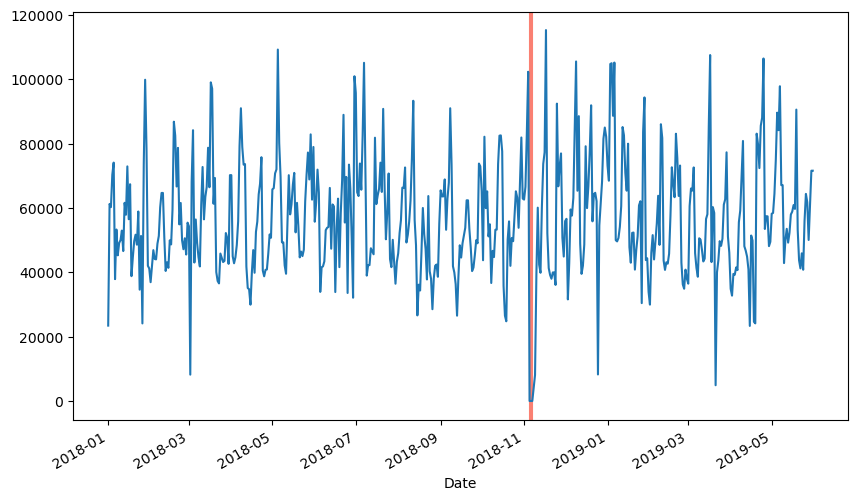

In [51]:
zeros = edadf[(edadf['Store_id']==39) & (edadf['#Order']==0)].index
for value in zeros:
    plt.axvline(x=value, color='#FA8072')
edadf[edadf['Store_id']==39].Sales.plot()
plt.show()

In [52]:
zeros

DatetimeIndex(['2018-11-05', '2018-11-06', '2018-11-07'], dtype='datetime64[ns]', name='Date', freq=None)

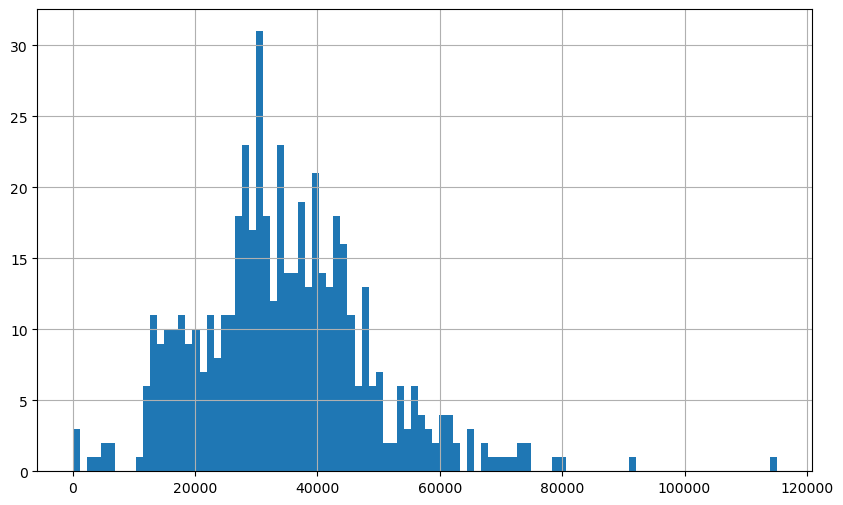

In [53]:
edadf[edadf['Store_id']==12].Sales.hist(bins=100).plot()
plt.show()

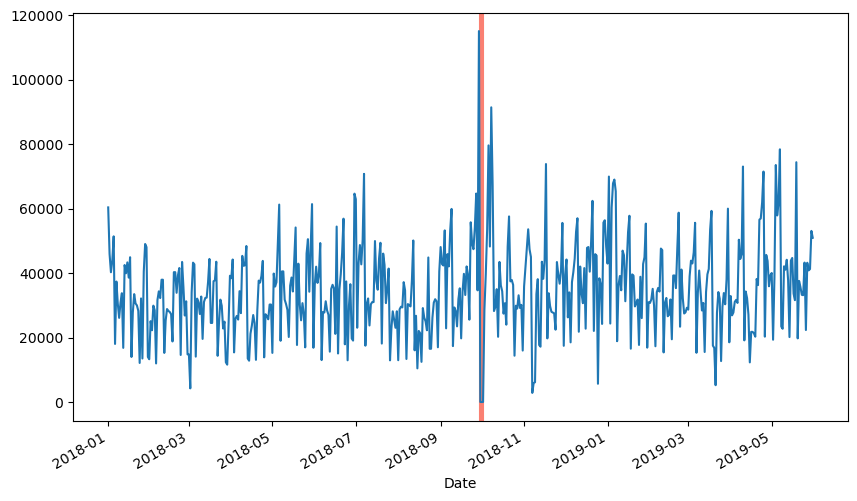

In [49]:
zeros = edadf[(edadf['Store_id']==12) & (edadf['#Order']==0)].index
for value in zeros:
    plt.axvline(x=value, color='#FA8072')
edadf[edadf['Store_id']==12].Sales.plot()
plt.show()


In [50]:
zeros

DatetimeIndex(['2018-09-30', '2018-10-01', '2018-10-02'], dtype='datetime64[ns]', name='Date', freq=None)

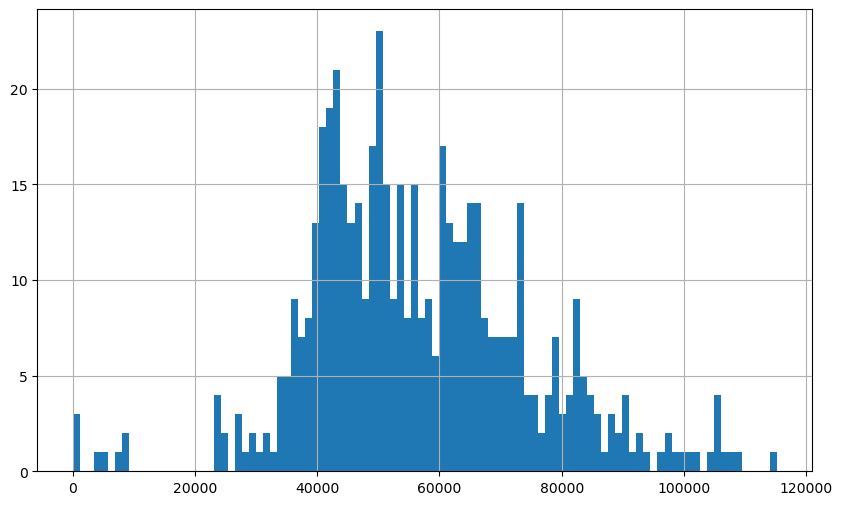

In [38]:
edadf[edadf['Store_id']==39].Sales.hist(bins=100).plot()
plt.show()

#### Observation: For Value 0

* Total 19 records are identified to have 0 logged for: #Order and Sales.

* Store Ids: 311, 222, 233, 271, 12, 39, 298, 276, 317, 204, 315

* Both #Order and Sales are zero in tandem.

     * Year: 2018: 13 Records and  2019: 6 Records
     * Months: Feb(2), Mar(1), Apr(4), Sept(4), Oct(2), and  Nov(5)
       * This indicates no particular pattern or reason to the holidays as it doesn't map to 


* The zeros could represent two possibilities:

     * Actual Zero Sales: One of the reason could be that it could be the period with no sales (e.g., closed store or zero footfall).

     *  Missing Data: Zeros could mean missing data due to reporting errors, this can be handled by imputing the data or dropping them based on further analysis

#### Conclusion: For Value 0
* The anamoly recorded can't be dropped as it's a time series so we will have to opt for alternative measure.
    * Imputation won't make sense as there are 0 #Order.
    * We can consider the store was closed and retain the Sale as 0 and opt to clip the data based on Quantiles.

In [54]:
traindf['Date'].nunique()

516

In [55]:
traindf.Date.duplicated().sum()

187824

#### Observation: Records Spread
* The dataset has records from 1st Jan 2018 to 31st May 2019, which makes unique 516 dates
    * The above findings of 516 unique dates suggests the dates are continous and no data is missing in the series.
* This also suggests that since we have in all (188340, 15) records in the datasets and 516 unique dates, there are 187824 duplicates which indicated it's multiple records for the day based on Region, Location, and Store Type combination.

In [56]:
traindf = traindf.sort_values('Date')

#### Handling Sales= 0 Values

In [59]:
#traindf.loc[(traindf['#Order'] == 0) & (traindf['Sales'] == 0), ['#Order', 'Sales']] = np.nan
#nulldf=traindf[traindf["Sales"].isna()==True]

In [60]:
#nullStoreIds=traindf[traindf["Sales"].isna()==True]["Store_id"].unique().tolist()

In [61]:
#for storeid in nullStoreIds:
#    print("Store Id:",storeid)
#    traindf[traindf['Store_id']==storeid].Sales.interpolate(method='linear').plot(label='imputed')
#    traindf[traindf['Store_id']==storeid].Sales.plot(label='original')
#    plt.legend()
#    traindf.loc[traindf['Store_id']==storeid,'Sales'] = traindf.loc[traindf['Store_id']==storeid].Sales.interpolate(method='linear')
#    plt.show()

#### Observations:

Store Ids: 311, 222, 233, 271, 12, 39, 298, 276, 317, 204, 315
* The #Order and Sales were 0 which now set to NaN had a extreme spike before the anomaly occured.
* Imputing Linear interpolation for the null values

#### Handled Null Sales values.

In [62]:
#traindf.Sales.isna().sum()

#traindf[(traindf['Sales']<1) & (traindf['#Order']<1) ].shape

#traindf[(traindf['#Order']<1) ].shape

#### Univariate Analysis


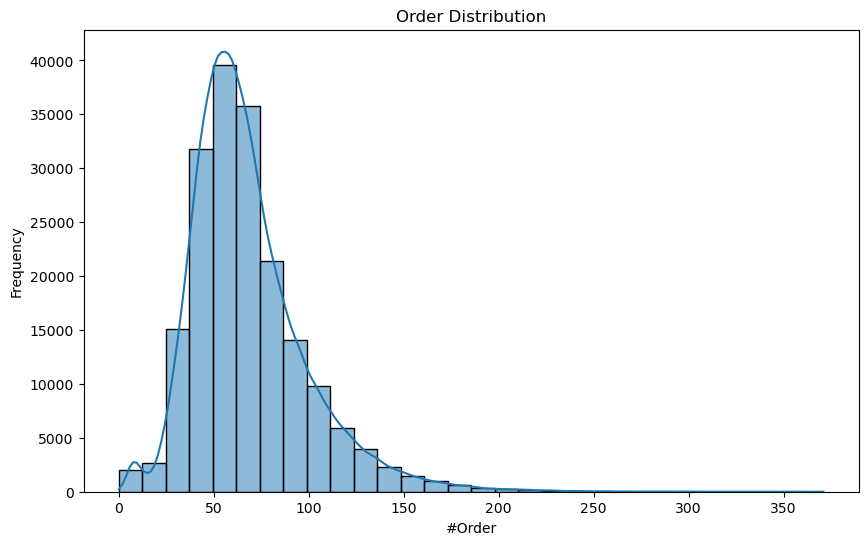

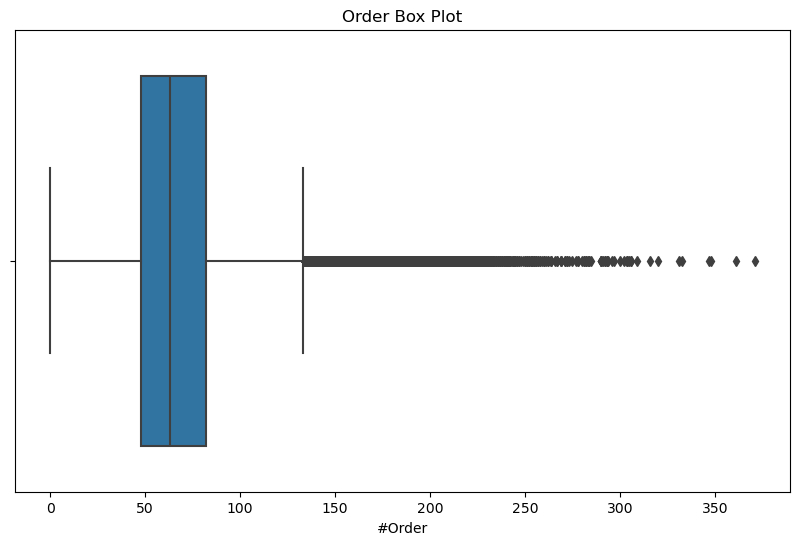

In [67]:
sns.histplot(traindf['#Order'], bins=30, kde=True)
plt.title('Order Distribution')
plt.xlabel('#Order')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=traindf['#Order'])
plt.title('Order Box Plot')
plt.xlabel('#Order')
plt.show()

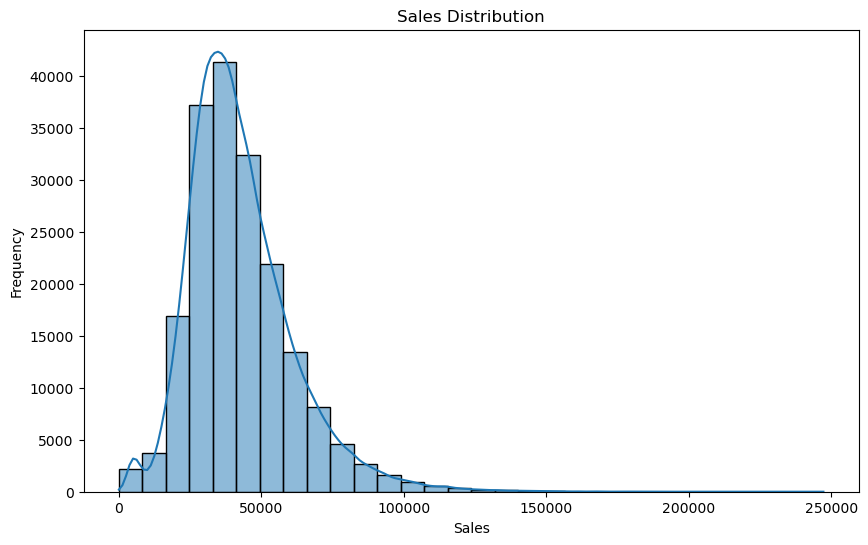

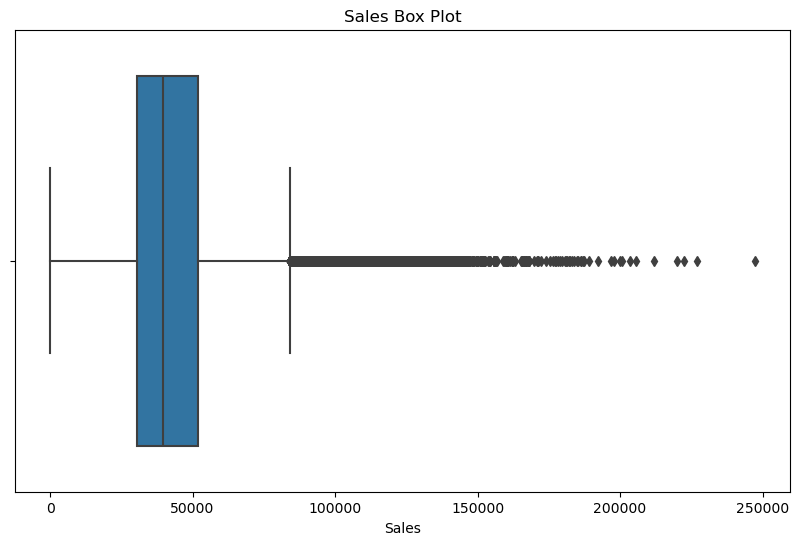

In [58]:
sns.histplot(traindf['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=traindf['Sales'])
plt.title('Sales Box Plot')
plt.xlabel('Sales')
plt.show()

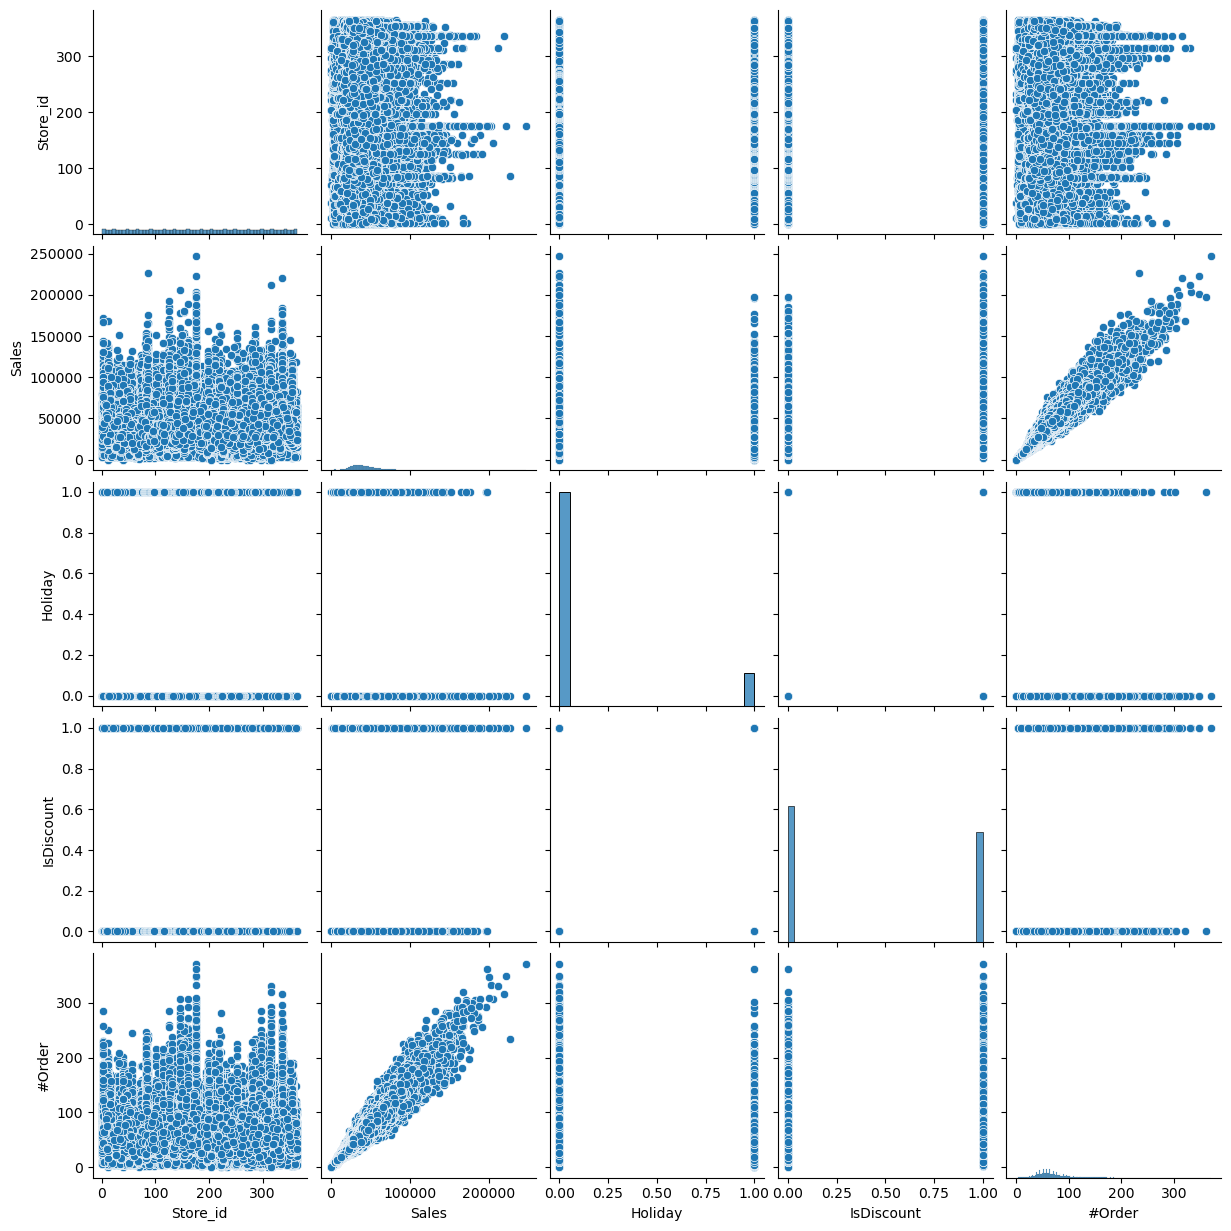

In [72]:
sns.pairplot(traindf[["Store_id", "Sales", "Holiday", "IsDiscount", "#Order"]])
plt.show()

#### Bivariate Analysis

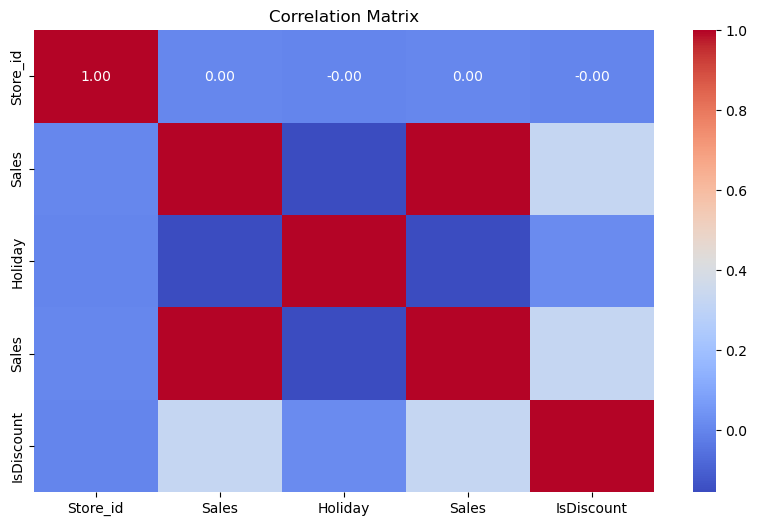

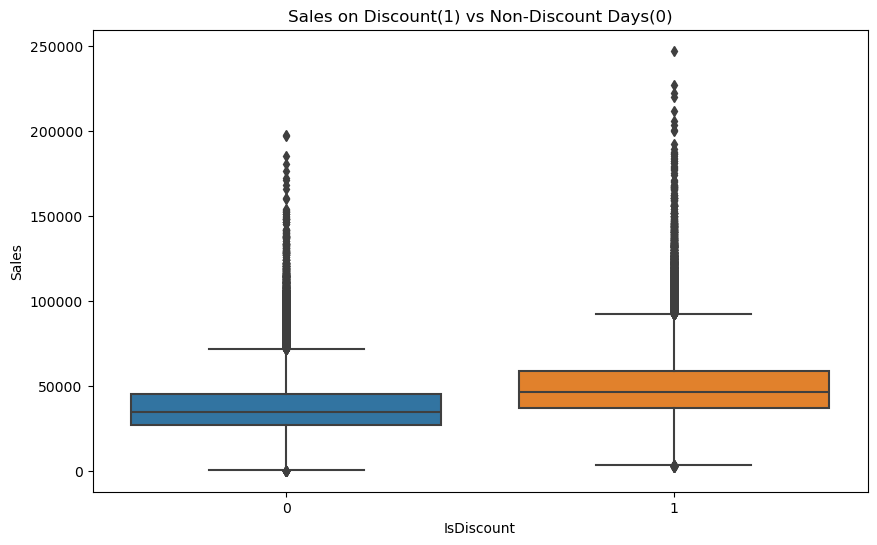

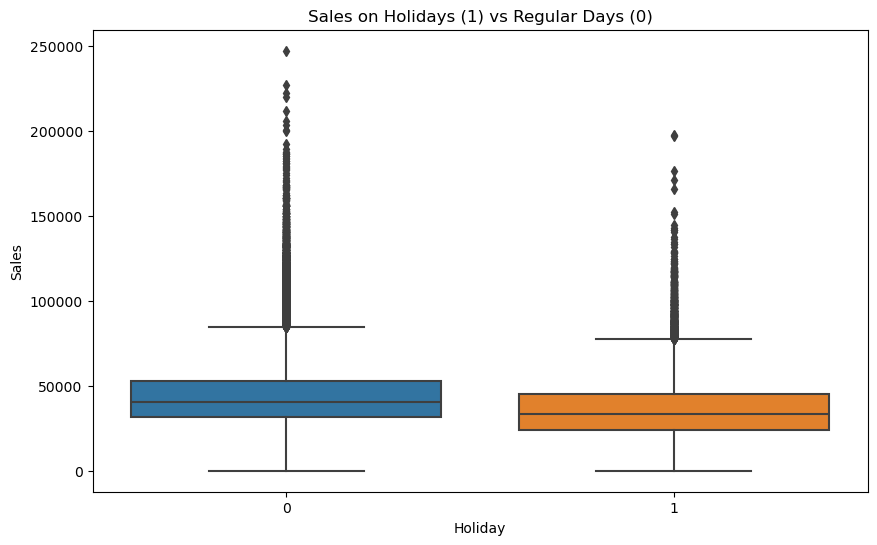

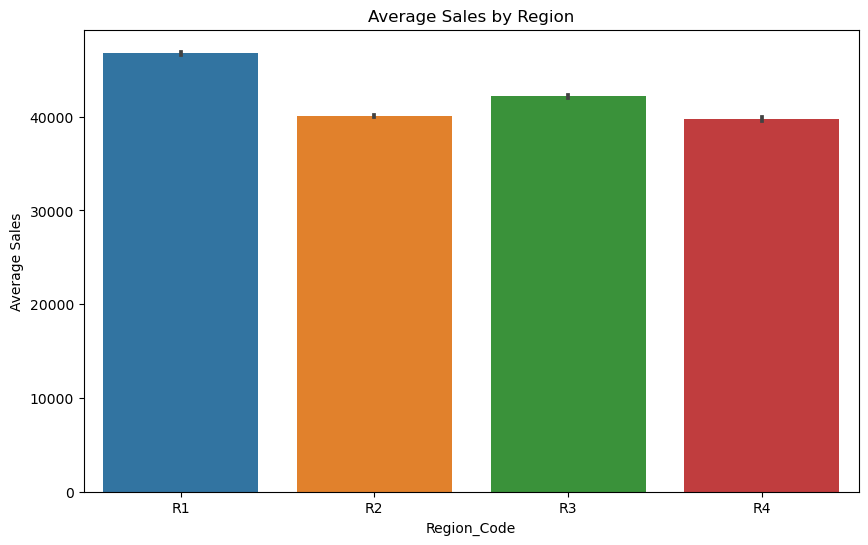

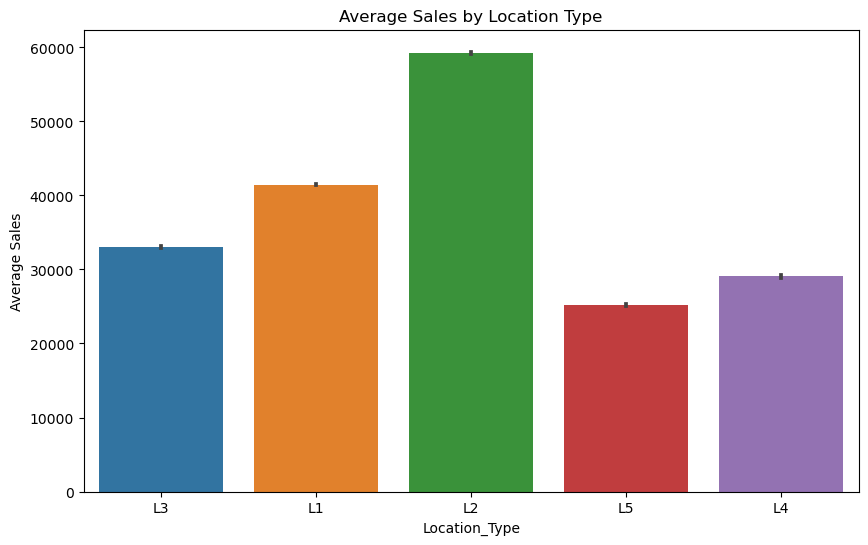

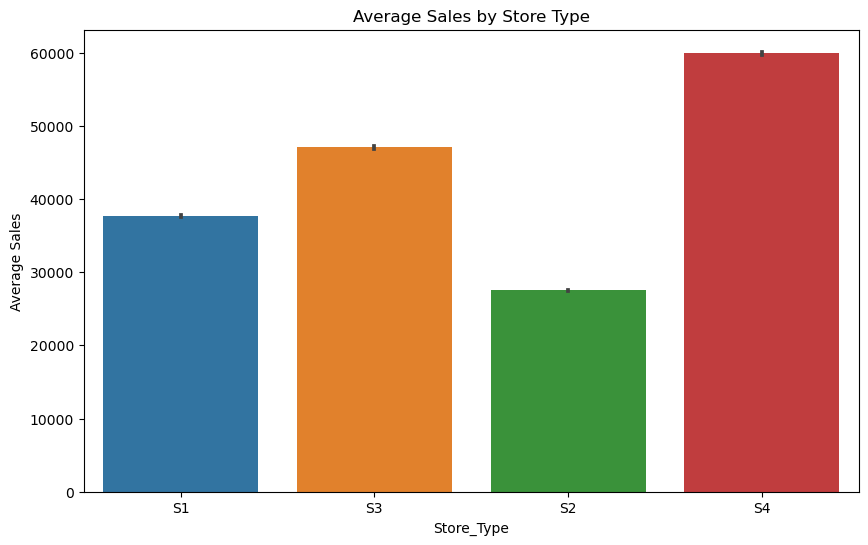

In [73]:
# Correlation Analysis
corr_cols=["Store_id","Sales","Holiday","Sales","IsDiscount"]
correlation_matrix = traindf[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Sales and Discounts
sns.boxplot(x='IsDiscount', y='Sales', data=traindf)
plt.title('Sales on Discount(1) vs Non-Discount Days(0)')
plt.show()

# Sales and Holidays
sns.boxplot(x='Holiday', y='Sales', data=traindf)
plt.title('Sales on Holidays (1) vs Regular Days (0)')
plt.show()

# Region and Sales Performance
sns.barplot(x='Region_Code', y='Sales', data=traindf, estimator=np.mean)
plt.title('Average Sales by Region')
plt.ylabel('Average Sales')
plt.show()

# Location and Sales Performance
sns.barplot(x='Location_Type', y='Sales', data=traindf, estimator=np.mean)
plt.title('Average Sales by Location Type')
plt.ylabel('Average Sales')
plt.show()

# Store and Sales Performance
sns.barplot(x='Store_Type', y='Sales', data=traindf, estimator=np.mean)
plt.title('Average Sales by Store Type')
plt.ylabel('Average Sales')
plt.show()


#### Univariate and Bivariate Observation:

* #Order distribution is observed to be Right skewed; suggesting some days were buzzing with high number of orders.
* Sales distribution is observed to be Right skewed; suggesting presence of orders with high tickets Sales
* Sales and #Order has a linear relationship
* Lower sales on Holiday vs. Regular days. Also observed as Lower amount of orders on Holidays vs. Regular day.
* Higher sales with Discount vs. No Discount; Higher orders with active discount vs. otherwise.
* Based on above findings Region (R1) ; Location (L2); and Store Type(S4) showcases high sales respectively.

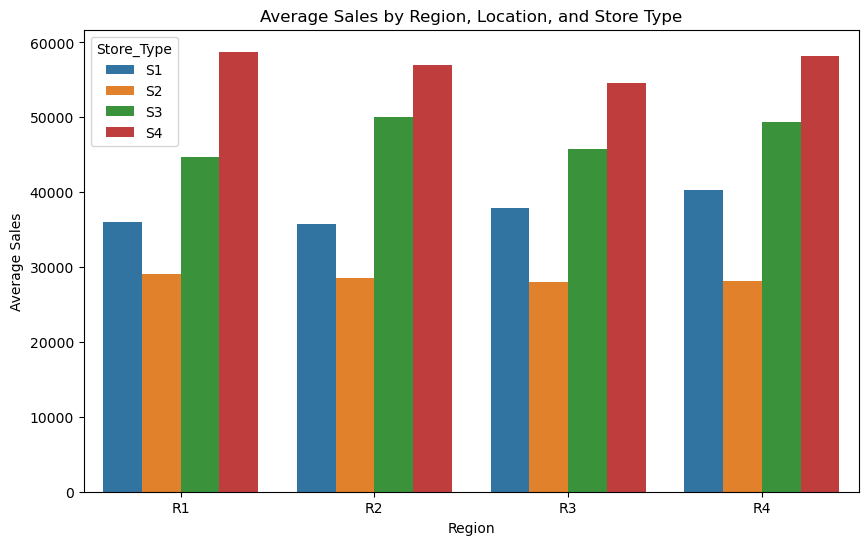

In [77]:
# Average sales by Region_Code, Location_Type, and Store_Type
avg_sales_df = traindf.groupby(['Region_Code', 'Location_Type', 'Store_Type']).Sales.mean().reset_index()
sns.barplot(x='Region_Code', y='Sales', hue='Store_Type', data=avg_sales_df, ci=None)
plt.title('Average Sales by Region, Location, and Store Type')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.show()

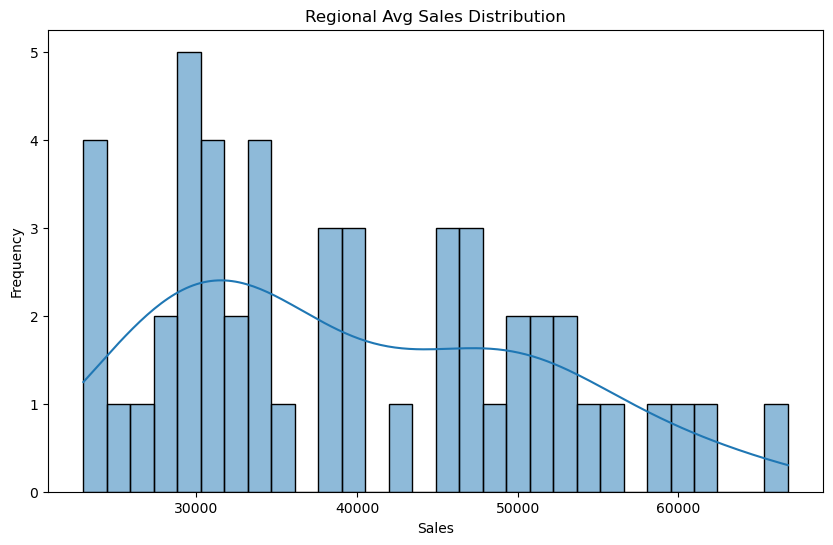

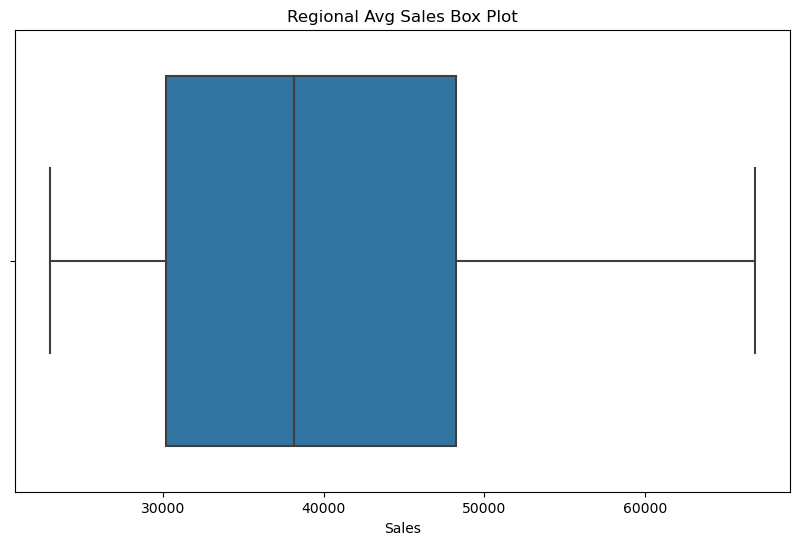

In [80]:
sns.histplot(avg_sales_df['Sales'], bins=30, kde=True)
plt.title('Regional Avg Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=avg_sales_df['Sales'])
plt.title('Regional Avg Sales Box Plot')
plt.xlabel('Sales')
plt.show()

* Regional Sales almost showcases Poisson districution

#### Month-over-Month and Year-over-Year Growth

In [81]:
traindf['MoM_Growth'] = traindf['Sales'].pct_change(periods=30)
traindf['YoY_Growth'] = traindf['Sales'].pct_change(periods=365)

In [82]:
traindf[['MoM_Growth','YoY_Growth']].describe()

MoM_Growth    YoY_Growth
count  1.883100e+05  1.879750e+05
mean            inf           inf
std             NaN           NaN
min   -1.000000e+00 -1.000000e+00
25%   -2.829591e-01 -2.981244e-01
50%    1.352361e-03  3.482267e-03
75%    3.955394e-01  4.264525e-01
max             inf           inf

(array([17532., 17591., 17652., 17713., 17775., 17836., 17897., 17956.,
        18017.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17591.0, 0, '2018-03'),
  Text(17652.0, 0, '2018-05'),
  Text(17713.0, 0, '2018-07'),
  Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05')])

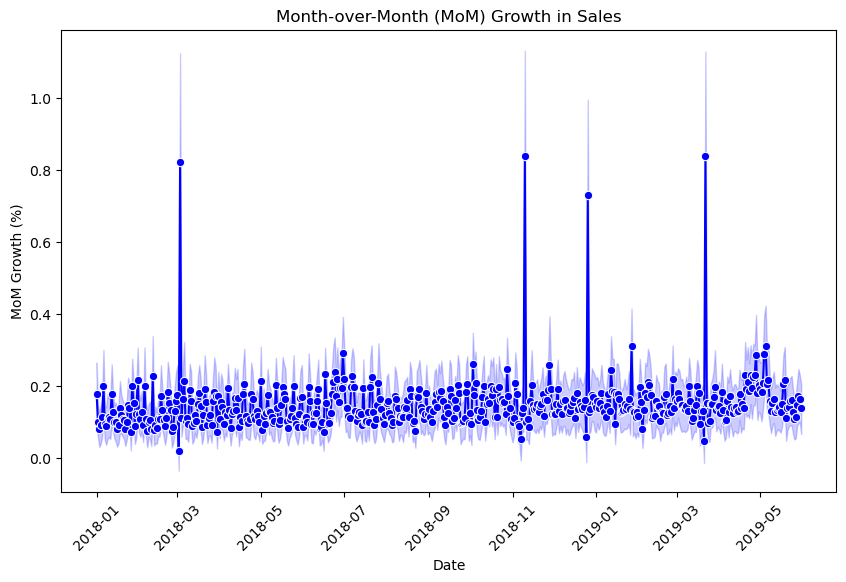

In [93]:
sns.lineplot(x='Date', y='MoM_Growth', data=traindf, marker="o", color="b")
plt.title('Month-over-Month (MoM) Growth in Sales')
plt.xlabel('Date')
plt.ylabel('MoM Growth (%)')
plt.xticks(rotation=45)

(array([17532., 17591., 17652., 17713., 17775., 17836., 17897., 17956.,
        18017.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17591.0, 0, '2018-03'),
  Text(17652.0, 0, '2018-05'),
  Text(17713.0, 0, '2018-07'),
  Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05')])

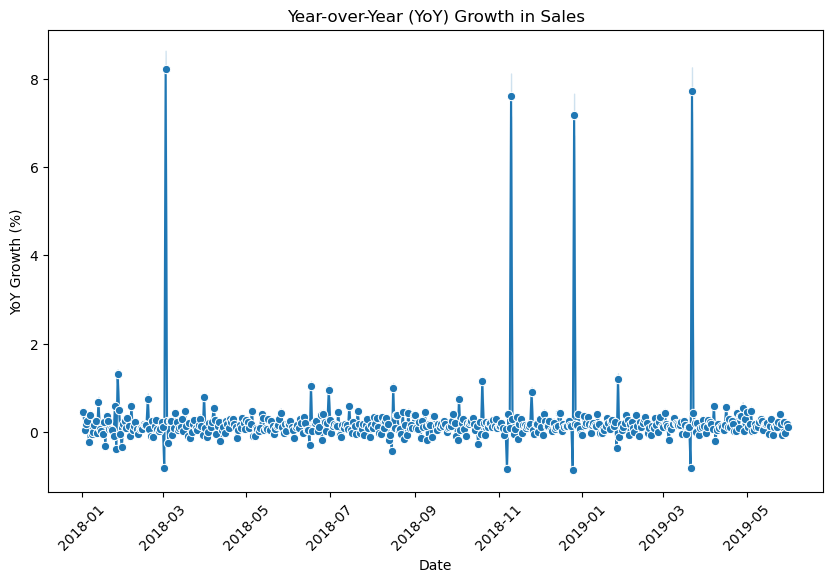

In [96]:
sns.lineplot(x='Date', y='YoY_Growth', data=traindf, marker="o")
plt.title('Year-over-Year (YoY) Growth in Sales')
plt.xlabel('Date')
plt.ylabel('YoY Growth (%)')
plt.xticks(rotation=45)

In [98]:
#traindf.reset_index(inplace=True)

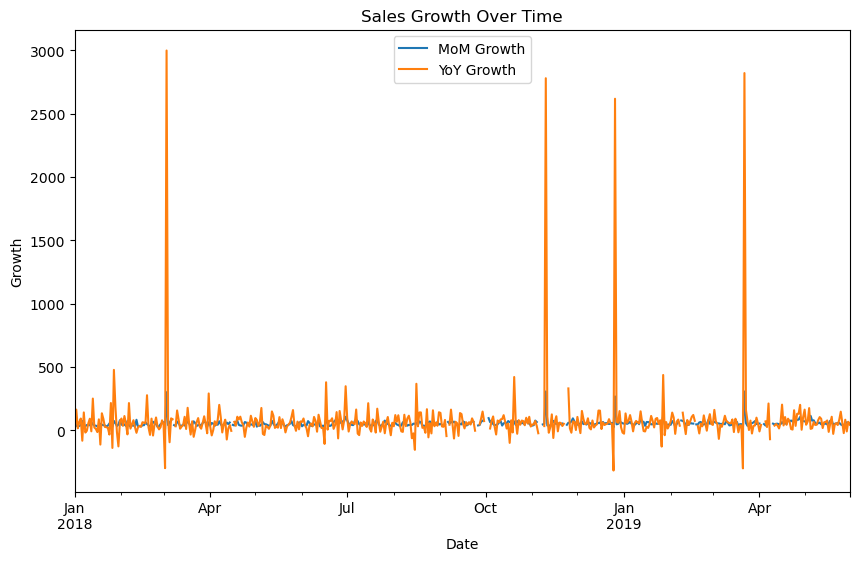

In [97]:
traindf.groupby('Date')['MoM_Growth'].sum().plot(label='MoM Growth')
traindf.groupby('Date')['YoY_Growth'].sum().plot(label='YoY Growth')
plt.title('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Growth')
plt.legend()
plt.show()

#### Hypothesis Testing

In [113]:
from scipy import stats

In [114]:
def hypothesisTestNormalityCheck(feature,label):
    
    # Split the sales data based on the selected feature
    feature_sales = traindf[traindf[feature] == 1]["Sales"].dropna()
    non_feature_sales = traindf[traindf[feature] == 0]["Sales"].dropna()
    
    # Shapiro-Wilk Test: To check Normality
    shapiro_feature = stats.shapiro(feature_sales)
    shapiro_non_feature = stats.shapiro(non_feature_sales)
    
    print(f"{label} Sales - Shapiro-Wilk: W-statistic = {shapiro_feature.statistic}, p-value = {shapiro_feature.pvalue}")
    print(f"No-{label} Sales - Shapiro-Wilk: W-statistic = {shapiro_non_feature.statistic}, p-value = {shapiro_non_feature.pvalue}")
    if (shapiro_feature.pvalue<0.05) & (shapiro_non_feature.pvalue<0.05):
        print(f"Shapiro-Wilk: W-statistic p-value < 0.05, which means does not follow a Normal Distribution and should opt for Non-Parametric Test")
   
    # Levene's Test: To check Variance
    levene_stat, levene_p = stats.levene(shapiro_feature, shapiro_non_feature)
    
    print(f"Levene's Test: Statistic = {levene_stat}, p-value = {levene_p}")
    if levene_p<0.05:
        print(f"Levene's Test: Statistic  p-value < 0.05, which means it rejects Null Hypothesis of equal variance and indicates for Non-Parametric Test")
    
    # T-test with appropriate equal_var parameter
    equal_var = levene_p > 0.05  # Use equal variances if Levene's p-value is greater than 0.05
    t_statistic, p_value = stats.ttest_ind(shapiro_feature, shapiro_non_feature, equal_var=equal_var, nan_policy='omit')
    
    
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")
    if p_value>0.05:
        print(f"T-statistic p-value > 0.05, which means we fail to reject Null Hypothesis")
    

#### 1. Impact of Discounts on Sales:

* Hypothesis: Stores offering discounts will have significantly higher sales than stores not offering discounts.
* Test: Perform a t-test for the mean sales on days with discounts versus days without.


In [115]:
hypothesisTestNormalityCheck("IsDiscount","Discount")

Discount Sales - Shapiro-Wilk: W-statistic = 0.9333337462593718, p-value = 6.383092535589024e-98
No-Discount Sales - Shapiro-Wilk: W-statistic = 0.9295012148085577, p-value = 9.721480082935218e-104
Shapiro-Wilk: W-statistic p-value < 0.05, which means does not follow a Normal Distribution and should opt for Non-Parametric Test
Levene's Test: Statistic = inf, p-value = 0.0
Levene's Test: Statistic  p-value < 0.05, which means it rejects Null Hypothesis of equal variance and indicates for Non-Parametric Test
T-statistic: 0.002909547328926771, P-value: 0.9979426476683505
T-statistic p-value > 0.05, which means we fail to reject Null Hypothesis


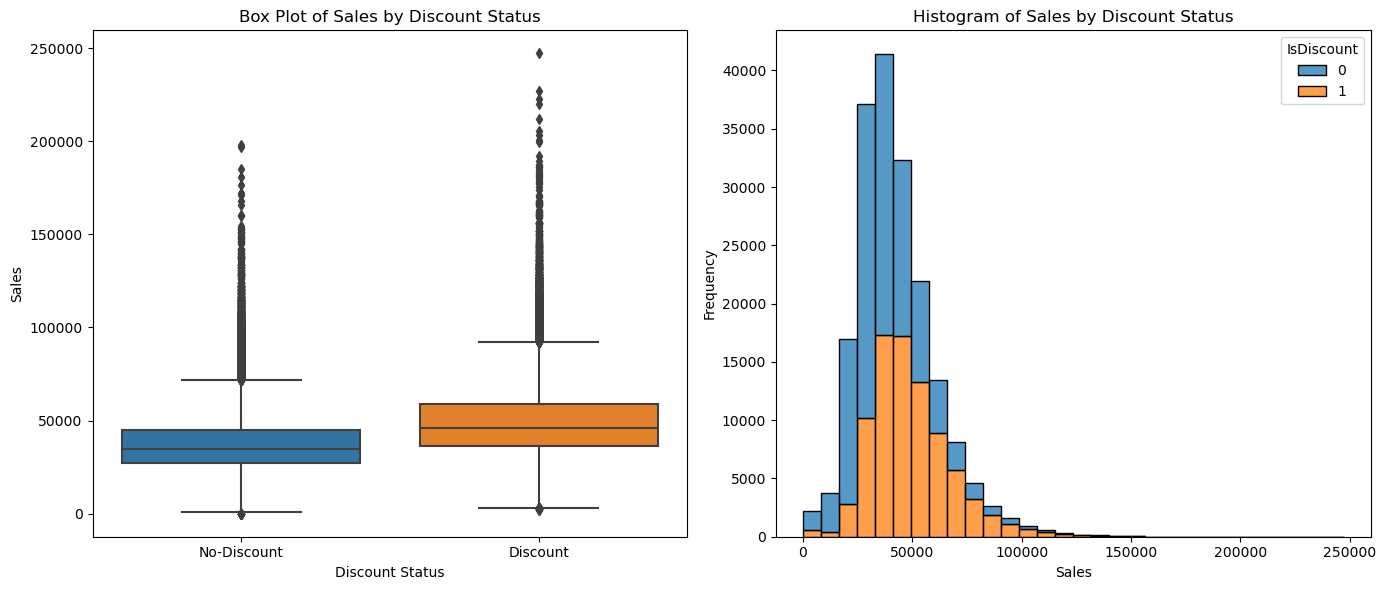

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='IsDiscount', y='Sales', data=traindf, ax=axes[0])
axes[0].set_title('Box Plot of Sales by Discount Status')
axes[0].set_xticklabels(['No-Discount', 'Discount'])
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('Discount Status')

sns.histplot(data=traindf, x='Sales', hue='IsDiscount', multiple="stack", bins=30, ax=axes[1])
axes[1].set_title('Histogram of Sales by Discount Status')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Impact of Discount Observations:

* Shapiro-Wilk Test for Normality: It doesn't follow normal distribution but it is right skewed Distribution: The Discount Sales and Non-Discount Sales data are not normally distributed.
    * Both the p-values are extremely small (close to 0) seconds that as p-value is below the typical significance level of 0.05
* Levene's Test for Equal Variances: As the p-value = 0.0 is below the significance value hence we reject the null hypothesis of equal variances as it indicates that the variances of the two groups (Discount and Non-Discount Sales) are not equal. It indicates a non-parametric test
* T-Test: The high p-value (0.9977) that is it is greater than the significance threshold 0.05 we fail to reject the null hypothesis.
    * T-Test it indicates that there is no significant difference in sales between the two groups, and we fail to reject the null hypothesis.
* Our findings based on Shapiro-Wilk Test and Levene's Test for Equal variance suggests that we will need non-parametric test for the data.
    * Let's look into the following non-parametric test:
        * Mann-Whitney U Test

In [106]:
from scipy.stats import mannwhitneyu

In [107]:
def nonParametricTestMWhitney(feature,label):
    # Split sales data based on selected feature
    feature_sales = traindf[traindf[feature] == 1]["Sales"]
    no_feature_sales = traindf[traindf[feature] == 0]["Sales"]

    # Non-Parametric Test: Mann-Whitney U Test
    u_statistic, p_value = mannwhitneyu(feature_sales, no_feature_sales, alternative='two-sided')

    print(f"Mann-Whitney U Test: U-statistic = {u_statistic}, p-value = {p_value}")

In [117]:
nonParametricTestMWhitney("IsDiscount","Discount")

Mann-Whitney U Test: U-statistic = 6190447035.5, p-value = 0.0


### Hypothesis Testing Summary: Impact of Discounts on Sales

**Hypothesis:**
- **Null Hypothesis (H0):** Stores offering discounts will have significantly higher sales than stores not offering discounts.
- **Alternative Hypothesis (H1):** Stores offering discounts do not have significantly higher sales compared to stores not offering discounts (i.e., sales on discount days are equal to or lower than sales on non-discount days).

**Test Conducted:** Mann-Whitney U Test

**Results:**
- **U-statistic:** 6190447035.5
- **P-value:** 0.0

**Interpretation:**
- The **p-value** obtained from the Mann-Whitney U Test is **0.0**, which is significantly lower than the significan threshold level of 0.05. This result provides strong evidence against the null hypothesis.
- Therefore, we **reject the null hypothesis** (H0) and accept the alternative hypothesis (H1), suggesting that stores offering discounts do **not have significantly higher sales** than stores not offering discounts.

### Conclusion:
The analysis indicates that there is a significant difference in sales between stores offering discounts and those not offering discounts. However, the results suggest that stores offering discounts does not support the idea that discounts always lead to higher sales. This means that even though the sales distributions differ, there is no clear evidence that discounts directly lead to higher sales, based on the statistical test.

#### 2. Effect of Holidays on Sales:
* Hypothesis: Sales on holidays are higher compared to non-holidays.
* Test: Use a t-test or ANOVA to compare sales on holidays vs. regular days.


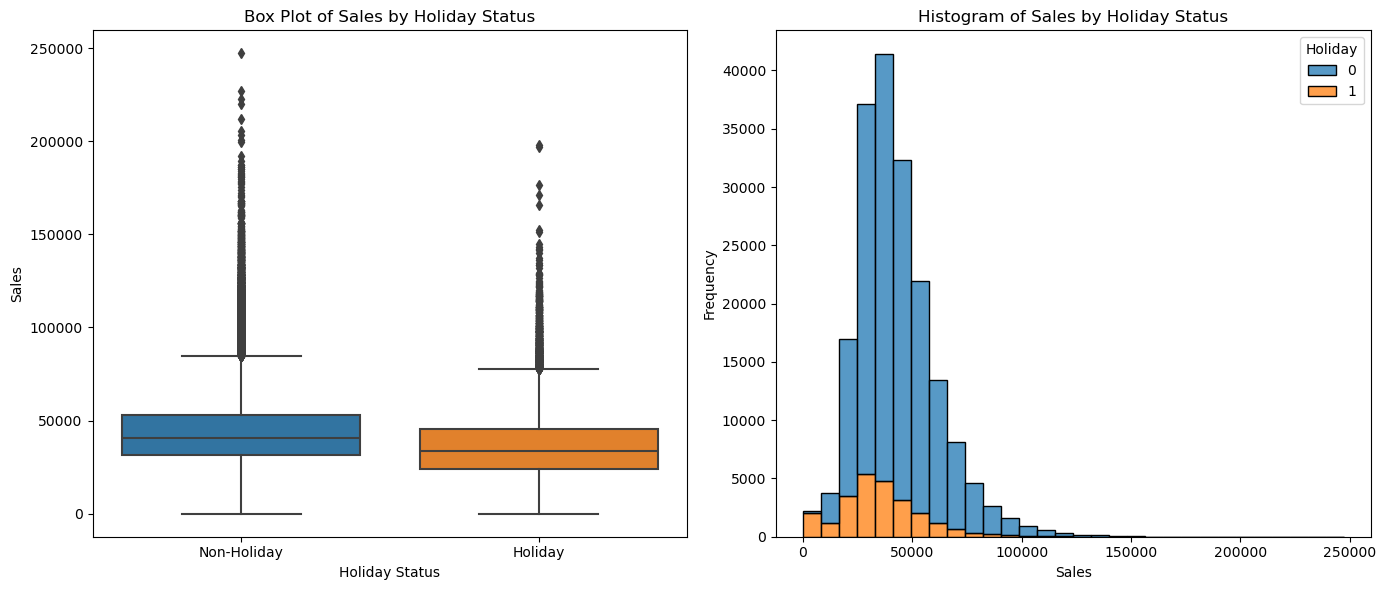

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Holiday', y='Sales', data=traindf, ax=axes[0])
axes[0].set_title('Box Plot of Sales by Holiday Status')
axes[0].set_xticklabels(['Non-Holiday', 'Holiday'])
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('Holiday Status')

sns.histplot(data=traindf, x='Sales', hue='Holiday', multiple="stack", bins=30, ax=axes[1])
axes[1].set_title('Histogram of Sales by Holiday Status')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [116]:
hypothesisTestNormalityCheck("Holiday","Holiday")

Holiday Sales - Shapiro-Wilk: W-statistic = 0.9530411861043699, p-value = 3.398701485384974e-65
No-Holiday Sales - Shapiro-Wilk: W-statistic = 0.9208554272097789, p-value = 3.788886552571573e-116
Shapiro-Wilk: W-statistic p-value < 0.05, which means does not follow a Normal Distribution and should opt for Non-Parametric Test
Levene's Test: Statistic = inf, p-value = 0.0
Levene's Test: Statistic  p-value < 0.05, which means it rejects Null Hypothesis of equal variance and indicates for Non-Parametric Test
T-statistic: 0.02428673164198118, P-value: 0.9828315224027484
T-statistic p-value > 0.05, which means we fail to reject Null Hypothesis


In [118]:
nonParametricTestMWhitney("Holiday","Discount")

Mann-Whitney U Test: U-statistic = 1478686923.5, p-value = 0.0


In [42]:
# Separate sales based on holiday and non-holiday
holiday_sales = traindf[traindf["Holiday"] == 1]["Sales"]
non_holiday_sales = traindf[traindf["Holiday"] == 0]["Sales"]

# Perform the Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(holiday_sales, non_holiday_sales, alternative='two-sided')

print(f"Mann-Whitney U Test: U-statistic = {u_statistic}, p-value = {p_value}")

Mann-Whitney U Test: U-statistic = 1478889402.5, p-value = 0.0


### Hypothesis Testing Summary: Effect of Holidays on Sales

**Hypothesis:**
- **Null Hypothesis (H0):** Sales on holidays are higher compared to non-holiday.
- **Alternative Hypothesis (H1):** Sales on holidays are not higher compared to non-holiday (i.e., sales on holidays are equal to or lower than sales on non-holidays).

**Test Conducted:** Mann-Whitney U Test

**Results:**
- **U-statistic:** 1478686923.5
- **P-value:** 0.0

**Interpretation:**
- The **p-value** obtained from the Mann-Whitney U Test is **0.0**, which is less than the significance threshold of 0.05. This provides strong evidence against the null hypothesis. The test indicates statistically significant difference between holiday and non-holiday sales.
- Therefore, we **reject the null hypothesis** (H0) and accept the alternative hypothesis (H1), suggesting that sales on holidays are **not consistently higher** compared to non-holiday.

### Conclusion:
Based on the Mann-Whitney U test, we reject the null hypothesis, indicating that holiday sales are not consistently higher than non-holiday sales. It aligns with the alternative hypothesis, suggesting that holiday sales are equal to or lower than non-holiday sales.

#### Categorical Tests: Chi2 Tests

In [139]:
categorical_vars = ['Region_Code','Store_Type', 'Location_Type', 'Discount']

# Store_Type and Location_Type
contingency_table = pd.crosstab(traindf['Store_Type'], traindf['Location_Type'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test between Store_Type and Location_Type: chi2_stat = {chi2_stat}, p-value = {p_val}")

# Store_Type and Discount
contingency_table_discount = pd.crosstab(traindf['Store_Type'], traindf['Discount'])

chi2_stat_discount, p_val_discount, dof_discount, expected_discount = stats.chi2_contingency(contingency_table_discount)
print(f"Chi-Square Test between Store_Type and Discount: chi2_stat = {chi2_stat_discount}, p-value = {p_val_discount}")

# Location_Type and Discount
contingency_table_location_discount = pd.crosstab(traindf['Location_Type'], traindf['Discount'])

chi2_stat_location_discount, p_val_location_discount, dof_location_discount, expected_location_discount = stats.chi2_contingency(contingency_table_location_discount)
print(f"Chi-Square Test between Location_Type and Discount: chi2_stat = {chi2_stat_location_discount}, p-value = {p_val_location_discount}")


Chi-Square Test between Store_Type and Location_Type: chi2_stat = 128118.41707564883, p-value = 0.0
Chi-Square Test between Store_Type and Discount: chi2_stat = 1.5849704434955905, p-value = 0.6628024520364906
Chi-Square Test between Location_Type and Discount: chi2_stat = 1.0251318940742769, p-value = 0.9059615295392269


In [140]:
# Region_Code and Store_Type
contingency_table_region_store = pd.crosstab(traindf['Region_Code'], traindf['Store_Type'])
chi2_stat_region_store, p_val_region_store, dof_region_store, expected_region_store = stats.chi2_contingency(contingency_table_region_store)
print(f"Chi-Square Test between Region_Code and Store_Type: chi2_stat = {chi2_stat_region_store}, p-value = {p_val_region_store}")

# Region_Code and Location_Type
contingency_table_region_location = pd.crosstab(traindf['Region_Code'], traindf['Location_Type'])
chi2_stat_region_location, p_val_region_location, dof_region_location, expected_region_location = stats.chi2_contingency(contingency_table_region_location)
print(f"Chi-Square Test between Region_Code and Location_Type: chi2_stat = {chi2_stat_region_location}, p-value = {p_val_region_location}")

# Region_Code and Discount
contingency_table_region_discount = pd.crosstab(traindf['Region_Code'], traindf['Discount'])
chi2_stat_region_discount, p_val_region_discount, dof_region_discount, expected_region_discount = stats.chi2_contingency(contingency_table_region_discount)
print(f"Chi-Square Test between Region_Code and Discount: chi2_stat = {chi2_stat_region_discount}, p-value = {p_val_region_discount}")


Chi-Square Test between Region_Code and Store_Type: chi2_stat = 24902.998454185315, p-value = 0.0
Chi-Square Test between Region_Code and Location_Type: chi2_stat = 5946.499215375973, p-value = 0.0
Chi-Square Test between Region_Code and Discount: chi2_stat = 1.325919741035845, p-value = 0.7229875725882295


In [275]:
# Holiday and Discount
contingency_table_holiday_discount = pd.crosstab(np.where(traindf['Holiday'] == 1, 'Yes', 'No'), traindf['Discount'])
chi2_stat_holiday_discount, p_val_holiday_discount, dof_holiday_discount, expected_holiday_discount = stats.chi2_contingency(contingency_table_holiday_discount)
print(f"Chi-Square Test between holiday and Discount: chi2_stat = {chi2_stat_holiday_discount}, p-value = {p_val_holiday_discount}")


Chi-Square Test between holiday and Discount: chi2_stat = 71.83301711773726, p-value = 2.342005358182592e-17


### Synopsis of Chi-Square Test Results

**Interpretation:** The Chi-Square test is used to determine if there is a significant association between two categorical features.

* The ( p-value < 0.05), it suggests that there is a statistically significant association between the two categorical feature and hence we reject the null hypothesis. And the features are not independent.
* When the ( p-value > 0.05), it suggests there is no statistically significant association between the two categorical features and hence we fail to reject the null hypothesis. And the are likely independent.

1. **Chi-Square Test between Store_Type and Location_Type**
   - **Chi-Square Statistic**: 128118.42
   - **p-value**: 0.0
   - **Interpretation**: There is a statistically significant association between `Store_Type` and `Location_Type`, indicating that the distribution of store types varies significantly across different location types.

2. **Chi-Square Test between Store_Type and Discount**
   - **Chi-Square Statistic**: 1.58
   - **p-value**: 0.66
   - **Interpretation**: No significant association is found between `Store_Type` and `Discount`, suggesting that discount practices are similar across different store types.

3. **Chi-Square Test between Location_Type and Discount**
   - **Chi-Square Statistic**: 1.03
   - **p-value**: 0.91
   - **Interpretation**: There is no significant association between `Location_Type` and `Discount`, indicating that discounting strategies do not differ significantly across location types.

4. **Chi-Square Test between Region_Code and Store_Type**
   - **Chi-Square Statistic**: 24903.00
   - **p-value**: 0.0
   - **Interpretation**: A statistically significant association exists between `Region_Code` and `Store_Type`, showing that certain store types are more prevalent in specific regions.

5. **Chi-Square Test between Region_Code and Location_Type**
   - **Chi-Square Statistic**: 5946.50
   - **p-value**: 0.0
   - **Interpretation**: There is a significant association between `Region_Code` and `Location_Type`, indicating that the type of location varies considerably across different regions.

6. **Chi-Square Test between Region_Code and Discount**
   - **Chi-Square Statistic**: 1.33
   - **p-value**: 0.72
   - **Interpretation**: No significant association is found between `Region_Code` and `Discount`, suggesting that discounting practices are similar across regions.

7. **Chi-Square Test between Holiday and Discount**
   - **Chi-Square Statistic**: 71.83301711773726
   - **p-value**: 2.34e-17
   - **Interpretation**: There is a significant association between `Holiday` and `Discount`. The result suggests that Holiday and Discount are not independent, meaning that whether a day is a holiday affects the likelihood of a discount being offered on that day. The strong association indicates that discounts tend to occur more or less frequently on holidays, depending on the pattern in your data.

#### Overall Categorical Test Conclusion:
- Significant associations were identified between `Store_Type` and `Location_Type`, as well as between `Region_Code` and both `Store_Type` and `Location_Type`. And another between `Holiday` and `Discount`.
- However, no significant associations were observed between the discount practices and the categorical variables of `Store_Type`, `Location_Type`, and `Region_Code`. 
- These findings can help in making strategic decisions regarding store placement and promotional strategies across different regions and store types.

In [143]:
def checkNormalityStatTest(feature,traindf):
    sales_data = []
    print("Category:",feature)
    
    for f in traindf[feature].unique():
        sales_data.append(traindf[traindf[feature] == f]['Sales'].dropna())
    
    # Shapiro-Wilk test: Normality Check 
    normality_results = {}
    for i, sales in enumerate(sales_data):
        stat, p_value = stats.shapiro(sales)
        normality_results[traindf[feature].unique()[i]] = (stat, p_value)
    
    print("Normality Test Results (Shapiro-Wilk):")
    for category, (stat, p_value) in normality_results.items():
        print(f"{category}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    
    # Levene's test for Equal Variances
    levene_stat, levene_p = stats.levene(*sales_data)
    print(f"\nLevene's Test: Statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")

    # Statistical Test Condition
    threshold = 0.05
    if all(p > threshold for _, p in normality_results.values()):
        if levene_p > threshold:
            # ANOVA Tests
            print("\nUse ANOVA: Data is normally distributed and equal variances.")
            f_stat, p_val = stats.f_oneway(*sales_data)
            print(f"ANOVA: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")
        else:
            print("\nUse Kruskal-Wallis Test: Data is normally distributed but not equal variances.")
            h_stat, p_val = stats.kruskal(*sales_data)
            print(f"Kruskal-Wallis: H-statistic = {h_stat:.4f}, p-value = {p_val:.4f}")
    else:
        print("\nUse Kruskal-Wallis Test: Data is not normally distributed.")
        h_stat, p_val = stats.kruskal(*sales_data)
        print(f"Kruskal-Wallis: H-statistic = {h_stat:.4f}, p-value = {p_val:.4f}")
    
    # Visualize the sales data distribution for the feature
    sns.boxplot(x=feature, y='Sales', data=traindf)
    plt.title(f'Sales Distribution by {feature}')
    plt.xticks(rotation=45)
    plt.show()


#### 3. Sales Differences Across Store Types:
* Hypothesis: Different store types experience different sales volumes.
* Test: Conduct ANOVA to compare the mean sales across different store types.


Category: Store_Type
Normality Test Results (Shapiro-Wilk):
S1: W-statistic = 0.9708, p-value = 0.0000
S3: W-statistic = 0.9685, p-value = 0.0000
S2: W-statistic = 0.9802, p-value = 0.0000
S4: W-statistic = 0.9494, p-value = 0.0000

Levene's Test: Statistic = 5206.2196, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 73677.0570, p-value = 0.0000


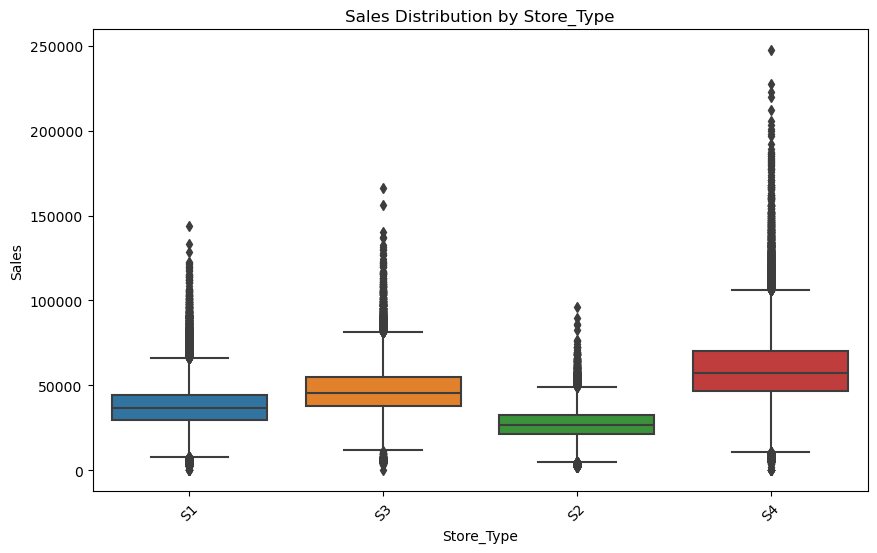

In [144]:
checkNormalityStatTest('Store_Type',traindf)

#### Synopsis for Kruskal-Wallis on Store Types

**Hypothesis Test:**
**Null Hypothesis (H0):** At least one store type has a significantly different mean sales volume compared to others.

**Alternative Hypothesis (H1):** There are no significant differences in mean sales volumes across the different store types.

**Findings:**
**Normality Test (Shapiro-Wilk):**
    * For each store type (S1, S2, S3, S4), the Shapiro-Wilk test returned p-values of 0.0000: This indicates that sales data for each store type does not follow a normal distribution (p-value < 0.05).
    * Since normality is not met, using a non-parametric test.

**Levene’s Test (Variance Test):** Levene’s test resulted in a statistic of 5206.2196 with a p-value of 0.0000, suggesting that the variances in sales volumes across store types are not equal (p-value < 0.05).
This confirms that the assumption of equal variances is rejected, hence seconding the use of a non-parametric test.

**Kruskal-Wallis Test:** The Kruskal-Wallis test yielded an H-statistic of 73677.0570 with a p-value of 0.0000.
    * Since the p-value is less than 0.05, this result indicates a statistically significant difference in median sales volumes across the different store types.

**Conclusion:**
* The Kruskal-Wallis test result allows us to reject the null hypothesis, indicating that there is a statistically significant difference in median sales volumes across the different store types. This suggests that sales volumes do indeed vary by store type.

#### Hypothesis: Variability of Sales Across Location Types  

**Null Hypothesis (H0)**: There is no significant difference in sales volumes across different location types.  
**Test Conducted**: Kruskal-Wallis test (chosen due to non-normal distribution of data)


Category: Location_Type
Normality Test Results (Shapiro-Wilk):
L3: W-statistic = 0.9729, p-value = 0.0000
L1: W-statistic = 0.9657, p-value = 0.0000
L2: W-statistic = 0.9462, p-value = 0.0000
L5: W-statistic = 0.9852, p-value = 0.0000
L4: W-statistic = 0.9820, p-value = 0.0000

Levene's Test: Statistic = 3843.1136, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 72945.8424, p-value = 0.0000


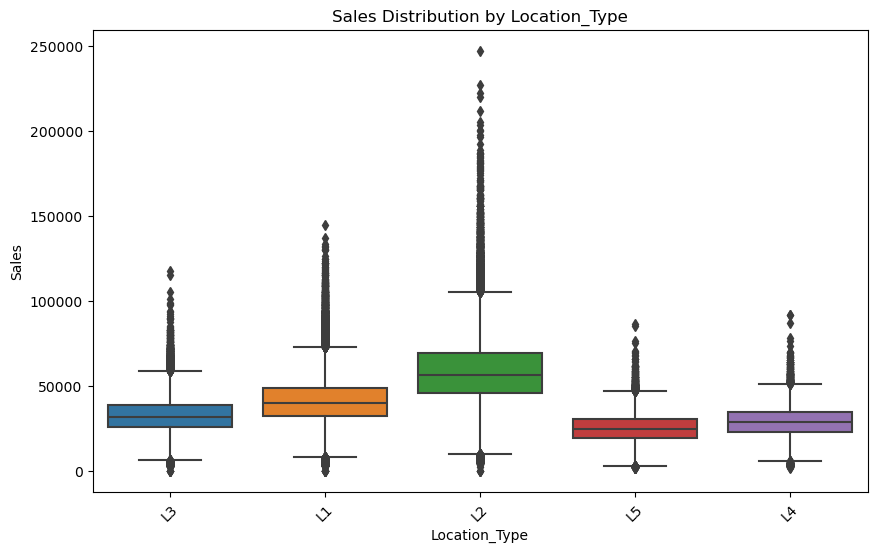

In [145]:
checkNormalityStatTest('Location_Type',traindf)

### Synopsis and Findings on Sales Volumes across Different Location Types:

**Hypothesis Summary**:
- **Null Hypothesis (H0)**: There is no significant difference in sales volumes across different location types.
- **Alternative Hypothesis (H1)**: There is a significant difference in sales volumes across different location types.

**Findings:**

**Normality Test (Shapiro-Wilk)**:
   - For each location type (L1, L2, L3, L4, L5), the Shapiro-Wilk test returned p-values of 0.0000.
   - This result indicates that the sales data for each location type does not follow a normal distribution (p-value < 0.05).
   - As the data is non-normally distributed, opt for non-parametric test.

**Variance Test (Levene’s Test)**:
   - Levene’s Test yielded a statistic of 3843.1136 with a p-value of 0.0000, indicating that variances are not equal across location types (p-value < 0.05).
   - This rejects the equal variance assumption supports the choice of a non-parametric test.

**Kruskal-Wallis Test**:
   - The Kruskal-Wallis test returned an H-statistic of 72945.8424 with a p-value of 0.0000.
   - Since the p-value is less than 0.05, this result suggests a statistically significant difference in sales volumes across location types.

### Conclusion:
* The Kruskal-Wallis test’s p-value of 0.0000, we **reject the null hypothesis**. This indicates that there is sufficient evidence to conclude that **sales volumes vary significantly across different location types**. Therefore, location type appears to be a significant factor affecting sales volumes.

#### 4. Regional Sales Variability:
* Hypothesis: There is significant variability in sales across different regions.
* Test: Kruskal-Wallis test if the data is not normally distributed or ANOVA if it is, to compare sales across regions.


Category: Region_Code
Normality Test Results (Shapiro-Wilk):
R1: W-statistic = 0.9390, p-value = 0.0000
R2: W-statistic = 0.9431, p-value = 0.0000
R3: W-statistic = 0.9483, p-value = 0.0000
R4: W-statistic = 0.9473, p-value = 0.0000

Levene's Test: Statistic = 1235.2684, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 3968.0636, p-value = 0.0000


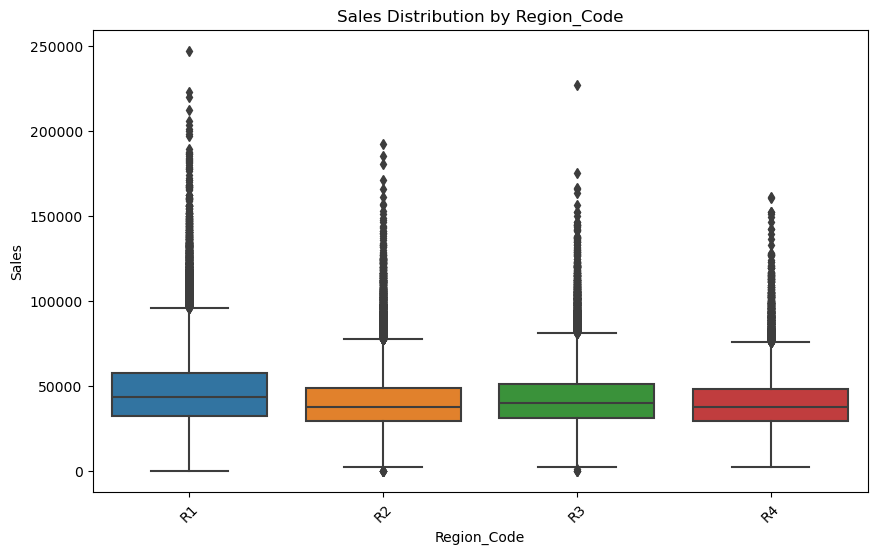

In [146]:
checkNormalityStatTest('Region_Code',traindf)

### Synopsis and Findings on Sales Variability across Different Regions

**Hypothesis Summary**:
- **Null Hypothesis (H0)**: There is no significant variability in sales across different regions.
- **Alternative Hypothesis (H1)**: There is significant variability in sales across different regions.

**Findings:**

**Normality Test (Shapiro-Wilk)**:
   - Each region (R1, R2, R3, R4) yielded a Shapiro-Wilk p-value of 0.0000, indicating non-normal distributions of sales data across regions (p-value < 0.05).
   - The lack of normality across the regions suggests using a non-parametric test.

**Variance Test (Levene’s Test)**:
   - Levene’s test produced a statistic of 1235.2684 with a p-value of 0.0000, which shows significant differences in variances across regions (p-value < 0.05).
   - This result supports the decision to use a non-parametric test, as it rejects the assumption of equal variances.

**Kruskal-Wallis Test**:
   - The Kruskal-Wallis test returned an H-statistic of 3968.0636 with a p-value of 0.0000.
   - Since the p-value is less than 0.05, this result suggests that there is a statistically significant difference in sales across regions.

### Conclusion:
* The Kruskal-Wallis test’s p-value of 0.0000, we **reject the null hypothesis**. This indicates that there is sufficient evidence to conclude that **sales volumes vary significantly across different regions**. Thus, region is a significant factor influencing sales variability.

#### Seasonal Sales Patterns:

**Hypothesis Statement:**
* Null Hypothesis (H0): There are no significant differences in monthly sales volumes across different months.
* Alternative Hypothesis (H1): There are significant differences in monthly sales volumes across different months.

Category: month
Normality Test Results (Shapiro-Wilk):
1: W-statistic = 0.9340, p-value = 0.0000
2: W-statistic = 0.9321, p-value = 0.0000
3: W-statistic = 0.9584, p-value = 0.0000
4: W-statistic = 0.9037, p-value = 0.0000
5: W-statistic = 0.9075, p-value = 0.0000
6: W-statistic = 0.9210, p-value = 0.0000
7: W-statistic = 0.9127, p-value = 0.0000
8: W-statistic = 0.9472, p-value = 0.0000
9: W-statistic = 0.9327, p-value = 0.0000
10: W-statistic = 0.9453, p-value = 0.0000
11: W-statistic = 0.9608, p-value = 0.0000
12: W-statistic = 0.9527, p-value = 0.0000

Levene's Test: Statistic = 123.5661, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 5509.7653, p-value = 0.0000


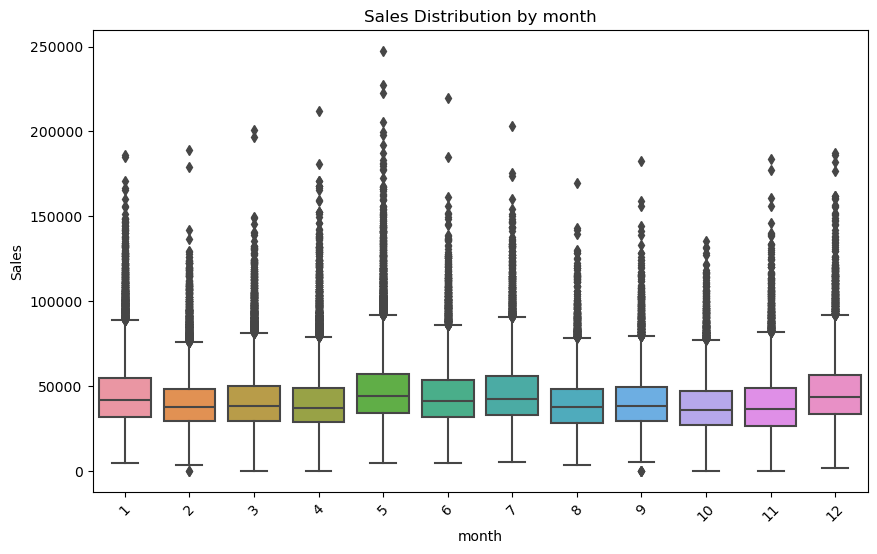

In [147]:
checkNormalityStatTest('month',traindf)

### Synopsis and Findings on Monthly Sales Volumes

**Hypothesis Summary**:
- **Null Hypothesis (H0)**: There are no significant differences in monthly sales volumes across different months.
- **Alternative Hypothesis (H1)**: There are significant differences in monthly sales volumes across different months.

**Findings:**

**Normality Test (Shapiro-Wilk)**:
   - For each month (1 to 12), the Shapiro-Wilk test yielded p-values of 0.0000, indicating that sales data for each month does not follow a normal distribution (p-value < 0.05).
   - This non-normality supports the use of a non-parametric test.

**Variance Test (Levene’s Test)**:
   - Levene’s test resulted in a statistic of 123.5661 with a p-value of 0.0000, showing significant differences in variances across months (p-value < 0.05).
   - This variance inequality reinforces the choice of a non-parametric test to analyze monthly sales differences.

**Kruskal-Wallis Test**:
   - The Kruskal-Wallis test yielded an H-statistic of 5509.7653 with a p-value of 0.0000.
   - Since the p-value is less than 0.05, this result suggests a statistically significant difference in sales volumes across different months.

**Conclusion:**
* The Kruskal-Wallis test’s p-value of 0.0000, we **reject the null hypothesis**. This result indicates that **monthly sales volumes vary significantly across different months**, implying that month is a significant factor affecting sales variability.

Category: Discount
Normality Test Results (Shapiro-Wilk):
Yes: W-statistic = 0.9333, p-value = 0.0000
No: W-statistic = 0.9295, p-value = 0.0000

Levene's Test: Statistic = 1809.0551, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 23675.7304, p-value = 0.0000


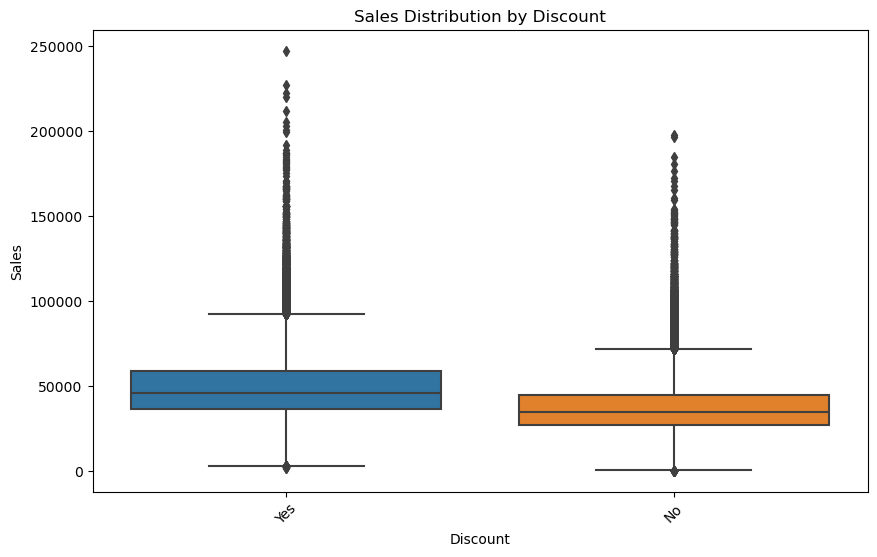

In [148]:
checkNormalityStatTest('Discount',traindf)

Category: Holiday
Normality Test Results (Shapiro-Wilk):
1: W-statistic = 0.9530, p-value = 0.0000
0: W-statistic = 0.9209, p-value = 0.0000

Levene's Test: Statistic = 58.3082, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 4759.1595, p-value = 0.0000


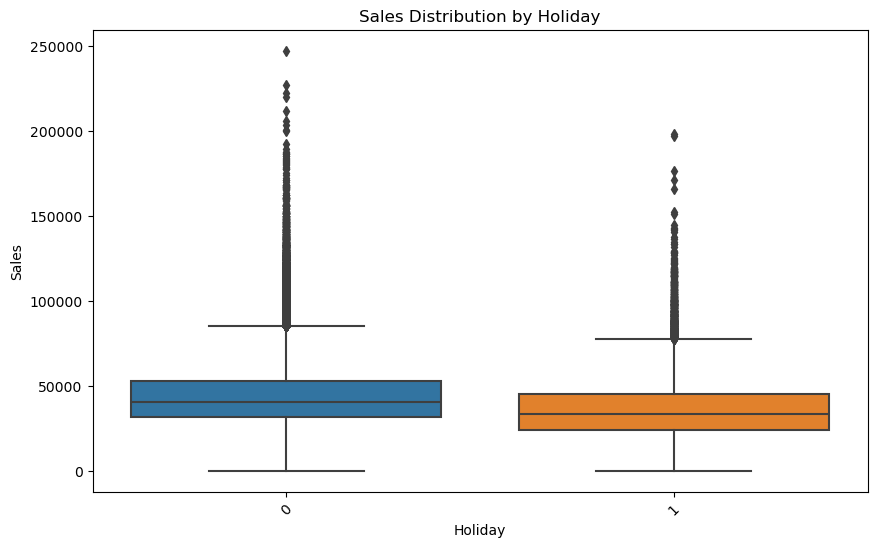

In [149]:
checkNormalityStatTest('Holiday',traindf)

Category: is_weekend
Normality Test Results (Shapiro-Wilk):
0: W-statistic = 0.9447, p-value = 0.0000
1: W-statistic = 0.9212, p-value = 0.0000

Levene's Test: Statistic = 1073.2313, p-value = 0.0000

Use Kruskal-Wallis Test: Data is not normally distributed.
Kruskal-Wallis: H-statistic = 5201.5546, p-value = 0.0000


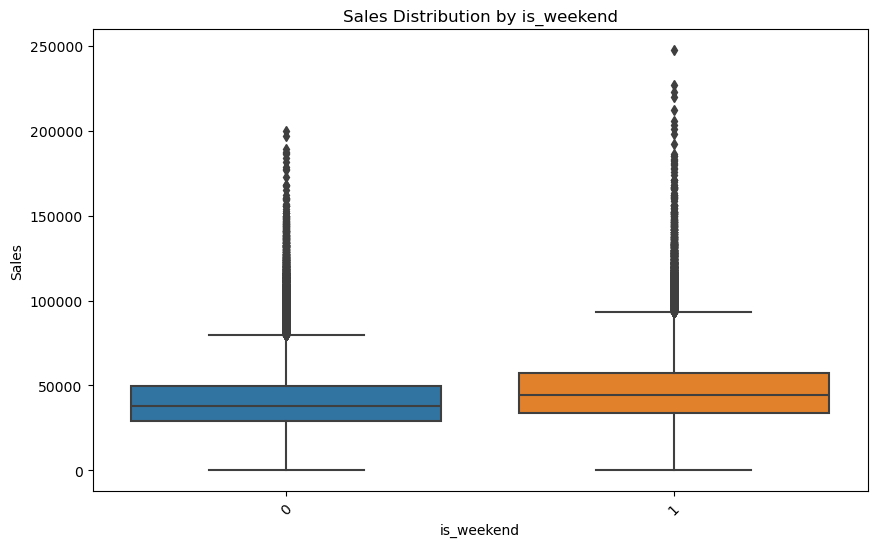

In [150]:
checkNormalityStatTest('is_weekend',traindf)

### Synopsis and Findings on Sales by Weekend and Weekday

**Hypothesis Summary**:
- **Null Hypothesis (H0)**: There is no significant difference in sales volumes between weekends and weekdays.
- **Alternative Hypothesis (H1)**: There is a significant difference in sales volumes between weekends and weekdays.

**Findings:**

**Normality Test (Shapiro-Wilk)**:
   - Both categories (`0` for weekdays and `1` for weekends) show non-normal distributions, with W-statistics of 0.9447 and 0.9212 and p-values of 0.0000 (p < 0.05).
   - This non-normality suggests the need for a non-parametric test to analyse differences in sales.

**Variance Test (Levene’s Test)**:
   - Levene’s test produced a statistic of 1073.2313 with a p-value of 0.0000, indicating significant variance differences between weekend and weekday sales (p < 0.05).
   - This variance difference further supports using a non-parametric test.

**Kruskal-Wallis Test**:
   - The Kruskal-Wallis test yielded an H-statistic of 5201.5546 with a p-value of 0.0000.
   - Since the p-value is less than 0.05, this result suggests a statistically significant difference in sales volumes between weekends and weekdays.

**Conclusion:**
* The Kruskal-Wallis test’s p-value of 0.0000, we **reject the null hypothesis**. This finding indicates that there is a significant difference in sales volumes between weekends and weekdays, implying that `is_weekend` (whether it’s a weekend or not) is a meaningful factor affecting sales variability.

### Time Series Analysis: Analyze sales trends over time to identify seasonality, trends, and cyclic behavior.


#### Investigating Daily Orders vs Everyday Sales

In [152]:
totalordersdf = traindf.groupby('Date').agg(Sales=('Sales', 'sum'),daily_orders=('#Order', 'sum')).reset_index().copy()
totalordersdf.head()

Date       Sales  daily_orders
0 2018-01-01  15345484.5         19666
1 2018-01-02  19592415.0         25326
2 2018-01-03  18652527.0         24047
3 2018-01-04  19956267.0         25584
4 2018-01-05  22902651.0         28436

In [170]:
totalordersdf.shape

(516, 3)

In [171]:
totalordersdf.describe()

Date         Sales  daily_orders
count                  516  5.160000e+02    516.000000
mean   2018-09-15 12:00:00  1.561628e+07  24895.077519
min    2018-01-01 00:00:00  1.762138e+06   2940.000000
25%    2018-05-09 18:00:00  1.365264e+07  22612.250000
50%    2018-09-15 12:00:00  1.533315e+07  24694.000000
75%    2019-01-22 06:00:00  1.757266e+07  27281.500000
max    2019-05-31 00:00:00  2.687082e+07  39266.000000
std                    NaN  3.270532e+06   4343.689107

In [159]:
totalordersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          516 non-null    datetime64[ns]
 1   Sales         516 non-null    float64       
 2   daily_orders  516 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 12.2 KB


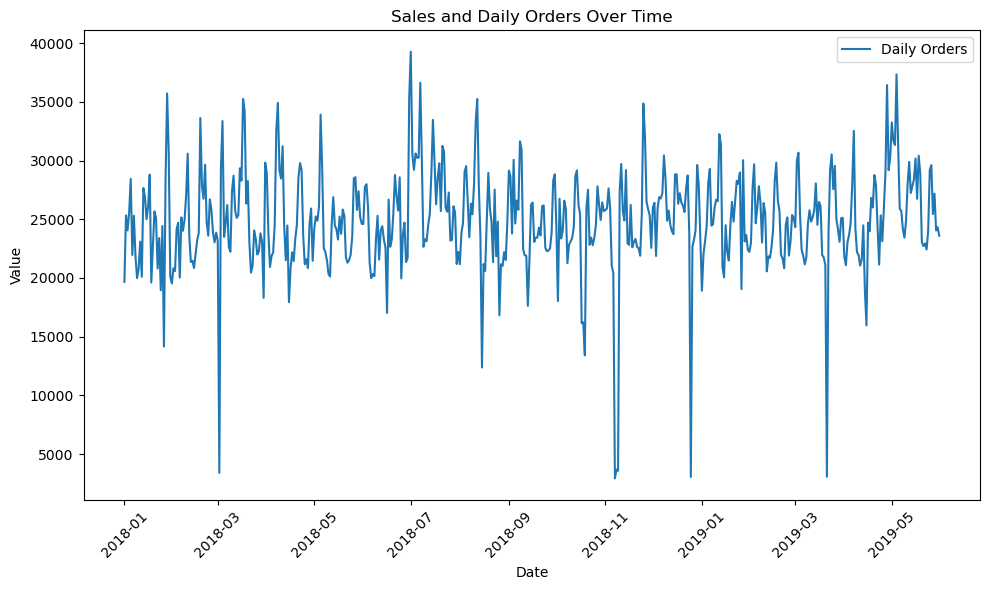

In [165]:
plt.plot(totalordersdf['Date'], totalordersdf['daily_orders'], label='Daily Orders')

plt.title('Sales and Daily Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

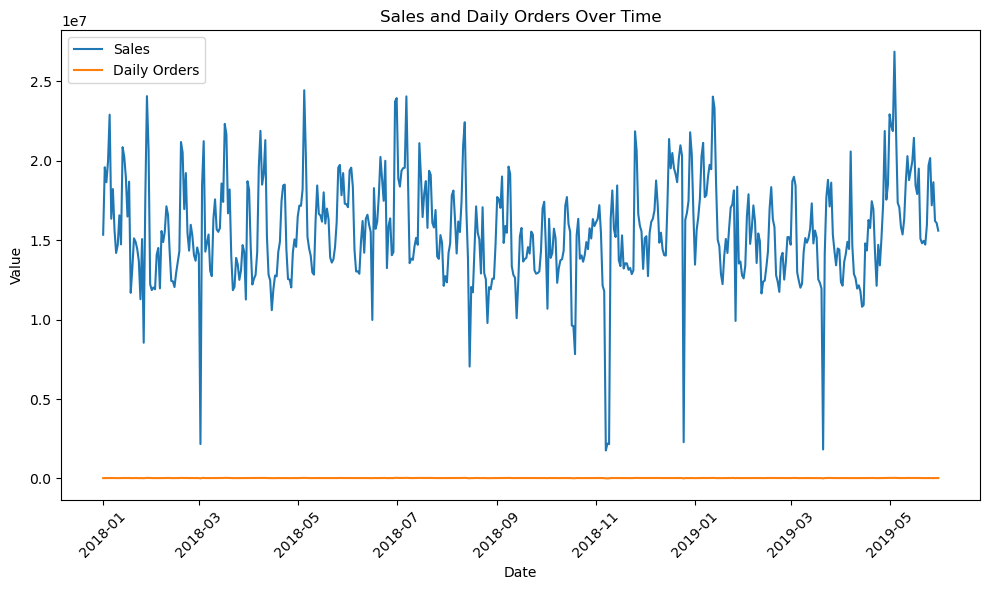

In [169]:
plt.plot(totalordersdf['Date'], totalordersdf['Sales'], label='Sales')
plt.plot(totalordersdf['Date'], totalordersdf['daily_orders'], label='Daily Orders')

plt.title('Sales and Daily Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Timeseries by ID

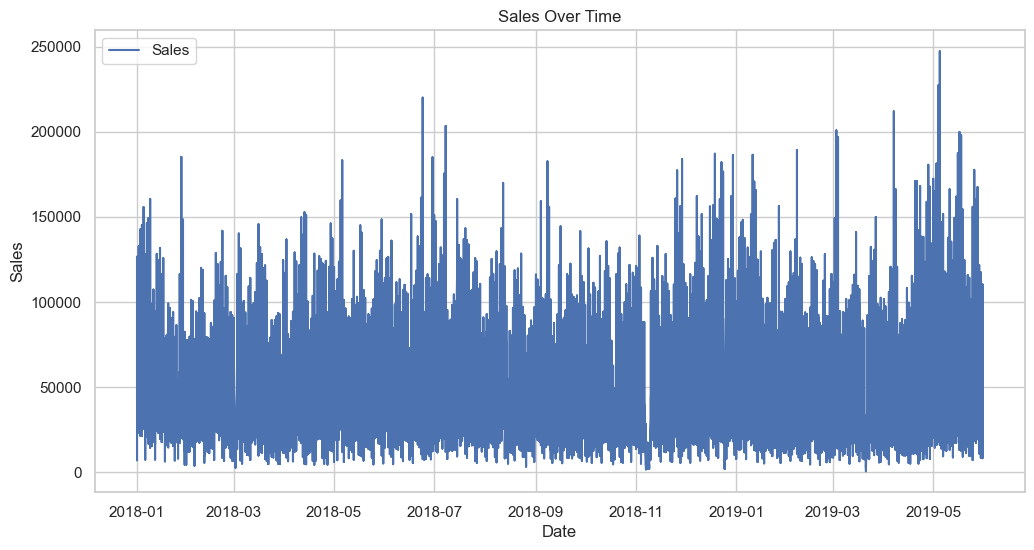

In [63]:
traindf['Date'] = pd.to_datetime(traindf['Date'])
traindf.set_index('Date', inplace=True)

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(traindf['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [254]:
#totalordersdf = traindf.groupby('Date').agg(Sales=('Sales', 'sum'),daily_orders=('#Order', 'sum')).reset_index().copy()
#salesdf = traindf.groupby('Date').agg({'Sales': 'sum','Holiday': 'sum','IsDiscount': 'sum' }).reset_index().copy()
salesdf = traindf.groupby('Date').agg(
    Sales =('Sales', 'sum'),
    #Holiday =('Holiday','sum'),
    #IsDiscount=('IsDiscount', 'sum'),
    Holiday =('Holiday','max'),
    IsDiscount=('IsDiscount', 'max'),
    Daily_Orders=('#Order','sum'),
    #Total_Orders=('#Order','sum'),
).reset_index().copy()

salesdf['Date'] = pd.to_datetime(salesdf['Date'])

# Extract Month, Year, DayOfWeek, and IsWeekend
salesdf['Day'] = salesdf['Date'].dt.day
salesdf['Month'] = salesdf['Date'].dt.month
salesdf['Year'] = salesdf['Date'].dt.year
salesdf['DayOfWeek'] = salesdf['Date'].dt.dayofweek  # Monday=0, Sunday=6
salesdf['IsWeekend'] = np.where(salesdf['DayOfWeek'] >= 5, 1, 0)  # 1 if Saturday/Sunday, else 0

#total_sales = traindf['Sales'].sum()
#total_orders = traindf['#Order'].sum()
#average_order_value=total_sales / total_orders
#print("Average Order Value:",average_order_value)
#salesdf['Number_of_Orders'] = (salesdf['Sales'] / average_order_value).round().astype(int)

total_sales = salesdf['Sales'].sum()
total_orders = salesdf['Daily_Orders'].sum()
average_order= round(total_sales / total_orders,2)
print("Total Sales:",total_sales)
print("Total Orders:",total_orders)
print("Average Order:",average_order)
# Estimated Order based on Average Order
salesdf['Estimated_Orders'] = (salesdf['Sales'] / average_order).round().astype(int)


Total Sales: 8058000332.04
Total Orders: 12845860
Average Order: 627.28


In [255]:
salesdf.head()

Date       Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
0 2018-01-01  15345484.5        1           1         19666    1      1  2018   
1 2018-01-02  19592415.0        0           1         25326    2      1  2018   
2 2018-01-03  18652527.0        0           1         24047    3      1  2018   
3 2018-01-04  19956267.0        0           1         25584    4      1  2018   
4 2018-01-05  22902651.0        0           1         28436    5      1  2018   

   DayOfWeek  IsWeekend  Estimated_Orders  
0          0          0             24464  
1          1          0             31234  
2          2          0             29736  
3          3          0             31814  
4          4          0             36511

In [256]:
totalordersdf.head()

Date       Sales  daily_orders
0 2018-01-01  15345484.5         19666
1 2018-01-02  19592415.0         25326
2 2018-01-03  18652527.0         24047
3 2018-01-04  19956267.0         25584
4 2018-01-05  22902651.0         28436

In [257]:
salesdf.duplicated().sum()

0

In [258]:
salesdf.set_index('Date', inplace=True)

In [259]:
salesdf.shape

(516, 10)

In [279]:
salesdf[(salesdf['Sales'] == 0)].count()

Sales               0
Holiday             0
IsDiscount          0
Daily_Orders        0
Day                 0
Month               0
Year                0
DayOfWeek           0
IsWeekend           0
Estimated_Orders    0
Sales_MA            0
dtype: int64

In [260]:
salesdf.describe()

Sales     Holiday  IsDiscount  Daily_Orders         Day  \
count  5.160000e+02  516.000000  516.000000    516.000000  516.000000   
mean   1.561628e+07    0.131783    0.970930  24895.077519   15.691860   
std    3.270532e+06    0.338583    0.168165   4343.689107    8.791656   
min    1.762138e+06    0.000000    0.000000   2940.000000    1.000000   
25%    1.365264e+07    0.000000    1.000000  22612.250000    8.000000   
50%    1.533315e+07    0.000000    1.000000  24694.000000   16.000000   
75%    1.757266e+07    0.000000    1.000000  27281.500000   23.000000   
max    2.687082e+07    1.000000    1.000000  39266.000000   31.000000   

            Month         Year   DayOfWeek   IsWeekend  Estimated_Orders  
count  516.000000   516.000000  516.000000  516.000000        516.000000  
mean     5.498062  2018.292636    2.990310    0.282946      24895.201550  
std      3.402740     0.455414    1.999491    0.450867       5213.823332  
min      1.000000  2018.000000    0.000000    0.000000       2809.000000  
25%      3.000000  2018.000000    1.000000    0.000000      21764.500000  
50%      5.000000  2018.000000    3.000000    0.000000      24444.000000  
75%      8.000000  2019.000000    5.000000    1.000000      28014.000000  
max     12.000000  2019.000000    6.000000    1.000000      42837.000000

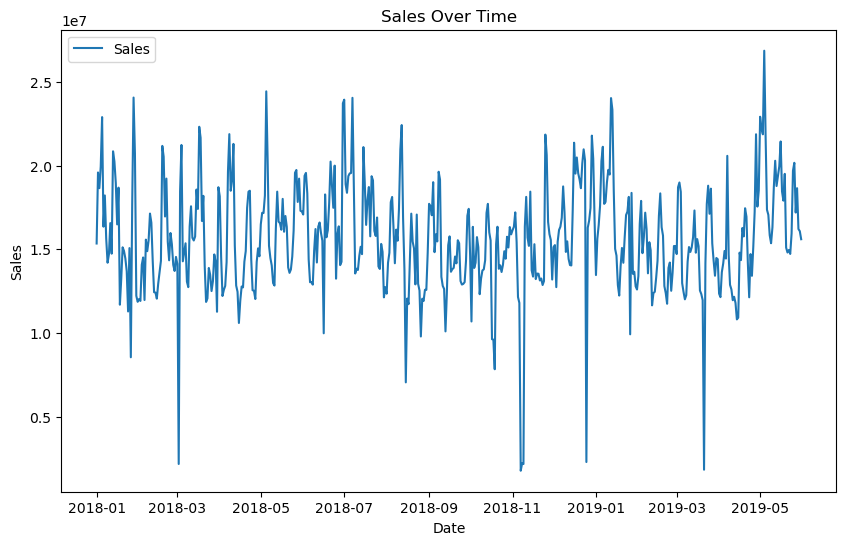

In [261]:
#holidays = salesdf.loc[salesdf.Holiday>1].index
#for hday in holidays:
#    plt.axvline(x=hday, color='#FA8072')

#discout = salesdf.loc[salesdf.IsDiscount>1].index
#for ds in discout:
#    plt.axvline(x=ds, color='#FA8072')


plt.plot(salesdf['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


#### Identify Trend

In [262]:
salesdf['Sales_MA'] = salesdf['Sales'].rolling(window=12).mean()

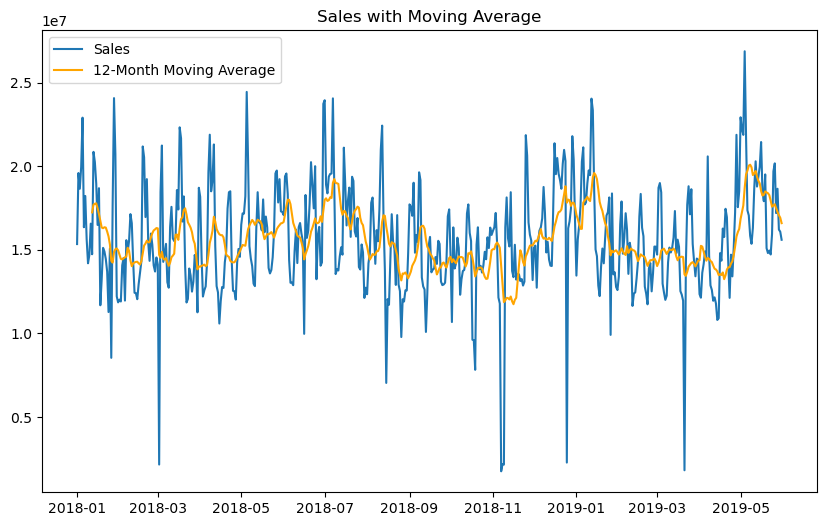

In [263]:
plt.plot(salesdf['Sales'], label='Sales')
plt.plot(salesdf['Sales_MA'], label='12-Month Moving Average', color='orange')
plt.legend()
plt.title('Sales with Moving Average')
plt.show()


#### Stationarity Check

In [264]:
from statsmodels.tsa.stattools import adfuller

In [265]:
result = adfuller(salesdf['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.5242079065633223
p-value: 0.007386718711362277


#### Hypothesis Testing:
* Null Hypothesis (H0): The time series is non-stationary.
* Alternative Hypothesis (H1): The time series is stationary.

#### Conclusion:
Since the p-value (0.0073) is less than 0.05, we reject the null hypothesis. This indicates that the time series is **stationary**.

#### We don't need to De-trending as the timeseries is stationary

#### De-seasonalising


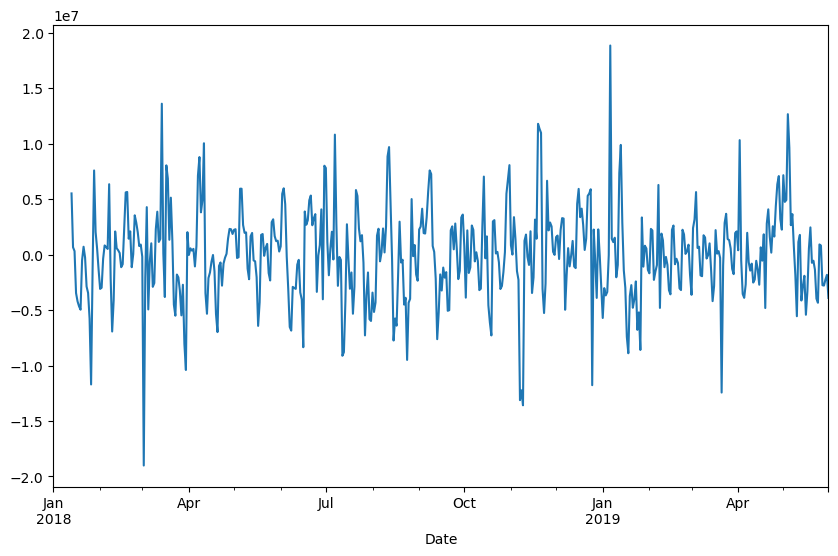

In [266]:
deseas = salesdf.Sales.diff(12)
deseas.plot()
plt.show()

In [267]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [268]:
salesdf.head()

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-01  15345484.5        1           1         19666    1      1  2018   
2018-01-02  19592415.0        0           1         25326    2      1  2018   
2018-01-03  18652527.0        0           1         24047    3      1  2018   
2018-01-04  19956267.0        0           1         25584    4      1  2018   
2018-01-05  22902651.0        0           1         28436    5      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders  Sales_MA  
Date                                                          
2018-01-01          0          0             24464       NaN  
2018-01-02          1          0             31234       NaN  
2018-01-03          2          0             29736       NaN  
2018-01-04          3          0             31814       NaN  
2018-01-05          4          0             36511       NaN

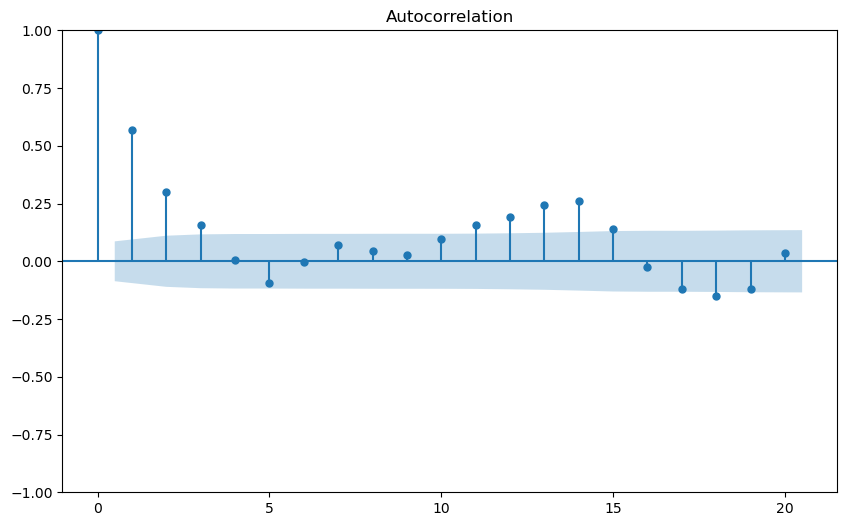

In [269]:
plot_acf(salesdf.Sales,lags=20);

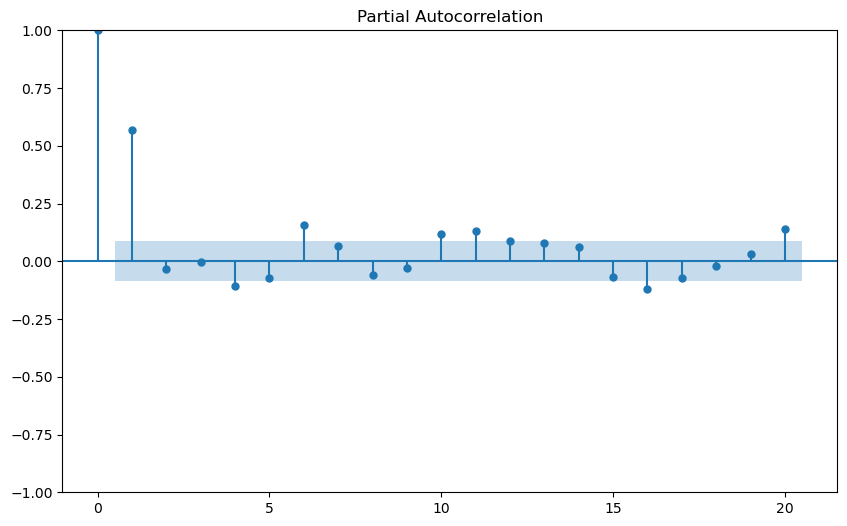

In [270]:
plot_pacf(salesdf.Sales,lags=20);

#### ACF and PACF plots, interpretation:

### ACF (Autocorrelation Function)
1. **Lag 1 and Lag 2**: The ACF shows strong positive spikes at lag 1 and lag 2. This suggests that the series is autocorrelated over short lags, meaning values at time \( t \) are correlated with values at \( t-1 \) and \( t-2 \).
2. **Seasonal Pattern**: There is a moderate pattern that suggests some level of seasonality or periodic behavior in the series (with lags around 12 being somewhat above the confidence interval). This could be monthly seasonality as the data is daily.
3. **Slow Decay**: The ACF decays gradually after a few lags, suggesting that it has some correlation over time, but not a pure seasonal effect.

### PACF (Partial Autocorrelation Function)
1. **Strong Spike at Lag 1**: The PACF has a strong spike at lag 1, then dies out quickly. This generally suggests an AR(1) process (where \( p=1 \) in an ARIMA model), as the partial autocorrelation is high only for the first lag.
2. **Less Seasonal Effect**: Compared to the ACF, the PACF shows less of a seasonal effect, though there are some minor spikes later on.

### Conclusion
- **Trend**: The plots don’t show a significant trend component, as the ACF doesn’t have a long gradual decay. So, the series appears to be stationary in terms of trend.
- **Seasonality**: There is a minor seasonality component (potentially around lag 12), which may indicate some repetitive pattern.
  
Since the ADF test has confirmed stationarity, we don't need further differencing. A potential ARIMA model configuration could involve a small AR order (e.g., \( p=1 \)) and perhaps a seasonal component around \( S=12 \) let's test the significance.

In [271]:
lag = 1
np.corrcoef(salesdf.Sales[lag:], salesdf.Sales.shift(lag)[lag:])[0][1]

0.5677840125470749

#### Correlation Observations:

A correlation of 0.5678 at lag 1 suggests a moderate positive correlation between the current sales and sales from the previous day. 

**Relationship Strength:** moderate, positive relationship

* This means that past sales data (lag 1) is a reliable indicator for predicting future sales, though there is still some variability that other factors may explain.
* lag 1 sales can be used as a feature in time series models such as ARIMA or SARIMA to improve predictions

#### Outlier Detection: 
* Detect and handle outliers in the dataset since they can significantly skew the results of the data analysis and model predictions.

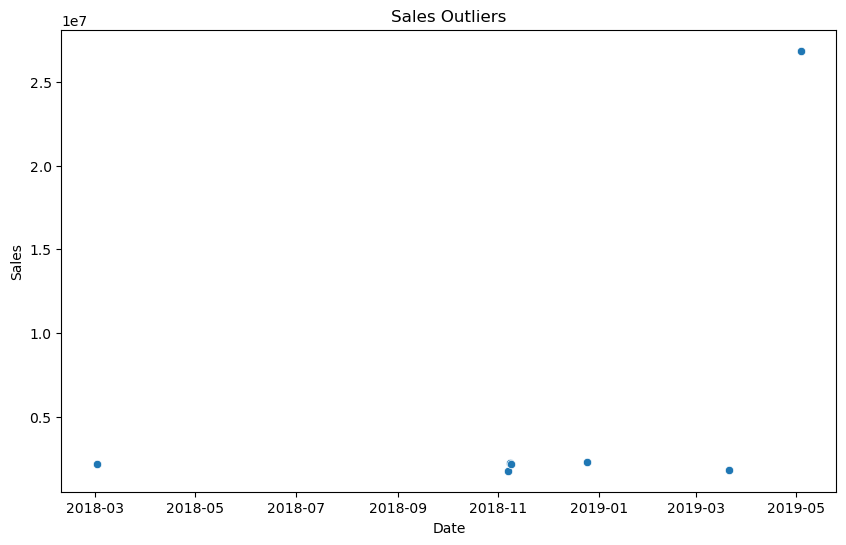

In [284]:
from scipy import stats

salesdf['z_score'] = stats.zscore(salesdf['Sales'])

outliers = salesdf[salesdf['z_score'].abs() > 3]
sns.scatterplot(data=outliers, x='Date', y='Sales')
plt.title('Sales Outliers')
plt.show()

In [286]:
salesdf[salesdf['z_score'].abs() > 3]

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                           
2018-03-02   2165458.29        1           1          3411    2      3  2018   
2018-11-07   1762137.57        1           1          2940    7     11  2018   
2018-11-08   2199778.29        1           1          3690    8     11  2018   
2018-11-09   2162866.47        1           1          3588    9     11  2018   
2018-12-25   2282733.00        1           1          3060   25     12  2018   
2019-03-21   1822462.17        1           1          3079   21      3  2019   
2019-05-04  26870817.00        0           1         37337    4      5  2019   

            DayOfWeek  IsWeekend  Estimated_Orders      Sales_MA   z_score  
Date                                                                        
2018-03-02          4          0              3452  1.469957e+07 -4.116722  
2018-11-07          2          0              2809  1.402836e+07 -4.240162  
2018-11-08          3          0              3507  1.300855e+07 -4.106219  
2018-11-09          4          0              3448  1.187635e+07 -4.117516  
2018-12-25          1          0              3639  1.781775e+07 -4.080830  
2019-03-21          3          0              2905  1.353107e+07 -4.221699  
2019-05-04          5          1             42837  1.870699e+07  3.444534

In [298]:
salesdf.reset_index(inplace= True)
outliers.reset_index(inplace= True)
outliers.head()

Date       Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
0 2018-03-02  2165458.29        1           1          3411    2      3  2018   
1 2018-11-07  1762137.57        1           1          2940    7     11  2018   
2 2018-11-08  2199778.29        1           1          3690    8     11  2018   
3 2018-11-09  2162866.47        1           1          3588    9     11  2018   
4 2018-12-25  2282733.00        1           1          3060   25     12  2018   

   DayOfWeek  IsWeekend  Estimated_Orders      Sales_MA   z_score  
0          4          0              3452  1.469957e+07 -4.116722  
1          2          0              2809  1.402836e+07 -4.240162  
2          3          0              3507  1.300855e+07 -4.106219  
3          4          0              3448  1.187635e+07 -4.117516  
4          1          0              3639  1.781775e+07 -4.080830

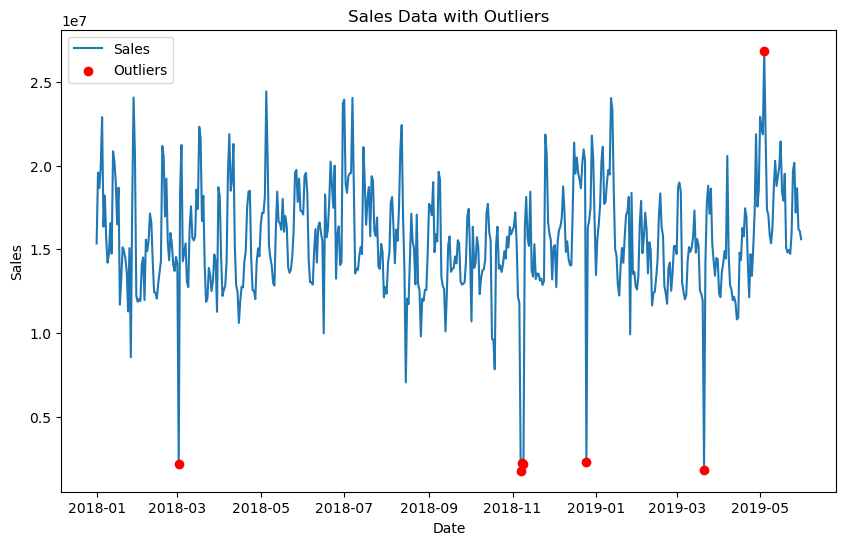

In [300]:
plt.plot(salesdf['Date'], salesdf['Sales'], label='Sales')
plt.scatter(outliers['Date'], outliers['Sales'], color='red', label='Outliers', zorder=5)
plt.title('Sales Data with Outliers')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

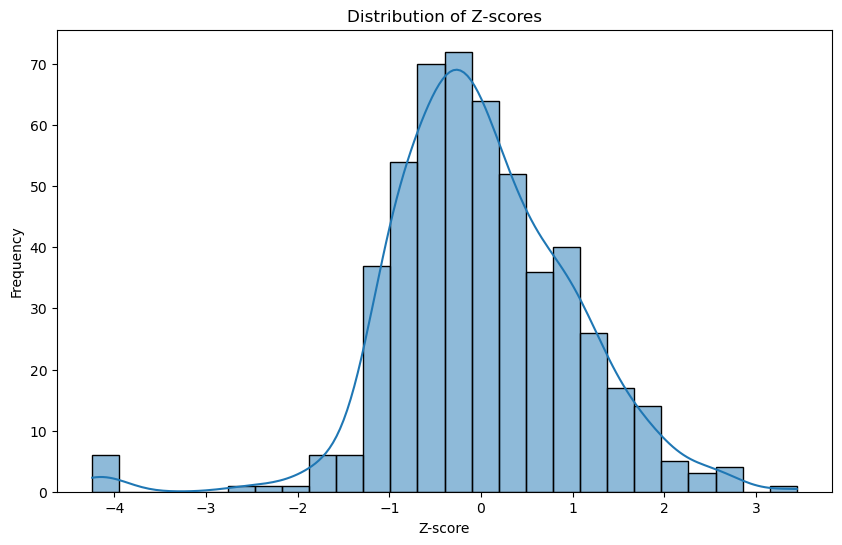

In [283]:
sns.histplot(salesdf['z_score'], kde=True)
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

#### Z-Score Analysis

**We can opt for Clipping vs. Imputation:**

* The outliers represent real events (e.g., holiday, Weekend, or discounts), clipping will be the best approach, as it retains the event context but prevents distortion from extreme values.

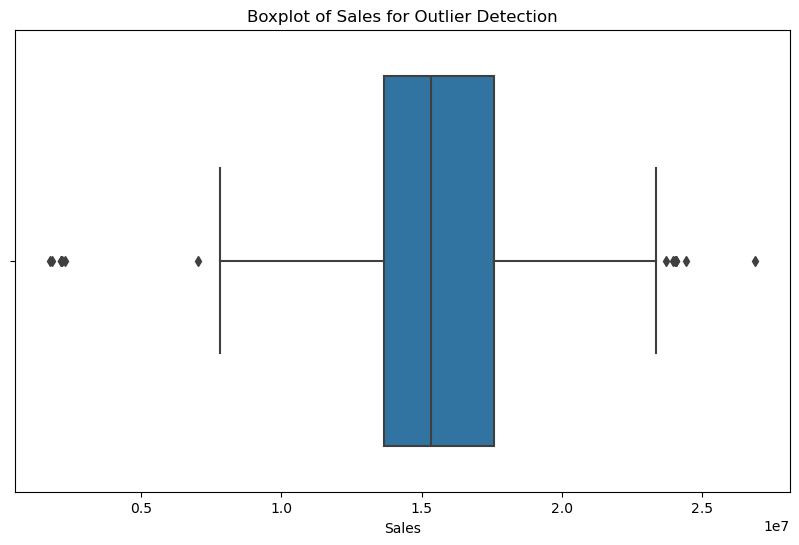

In [272]:
# Boxplot for detecting outliers
sns.boxplot(x=salesdf['Sales'])
plt.title("Boxplot of Sales for Outlier Detection")
plt.show()

In [273]:
# Calculate IQR
Q1 = salesdf['Sales'].quantile(0.25)
Q3 = salesdf['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = salesdf[(salesdf['Sales'] < lower_bound) | (salesdf['Sales'] > upper_bound)]
print("Outliers detected:", outliers)


Outliers detected:                   Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                           
2018-01-28  24070617.00        0           1         35710   28      1  2018   
2018-03-02   2165458.29        1           1          3411    2      3  2018   
2018-05-05  24441480.00        0           1         33909    5      5  2018   
2018-06-30  23728515.00        0           1         35352   30      6  2018   
2018-07-01  23945358.00        0           1         39266    1      7  2018   
2018-07-07  24055308.00        0           1         36620    7      7  2018   
2018-08-15   7044249.21        1           1         12381   15      8  2018   
2018-11-07   1762137.57        1           1          2940    7     11  2018   
2018-11-08   2199778.29        1           1          3690    8     11  2018   
2018-11-09   2162866.47        1           1          3588    9     11  2018   
2018-12-25   2282733.

### IQR Analysis: ###

* Total 14 records are flagged as an Outliers due to various reasons, some of the explained below:
  
    * 2018-01-28: Sales are very high at 24,070,617 with Daily_Orders at 35,710. These values are flagged as outliers, possibly because of a significant event or sale on that day.

    * 2018-03-02: Sales are much lower (2,165,458.29) with Daily_Orders at 3,411, a large drop compared to other dates. This could indicate a drop in sales or an unusual data recording issue. One observation is it has both Holiday and Discount present in the data.

    * 2018-07-01, 2018-07-07, 2019-01-12 and 2019-05-04: Both of these dates have high sales and orders. If these are outliers, they could represent seasonal spikes, such as around holidays, promotions, or events.
 
        * Normally observed many Retailers runs End of Season or Summer Sales and Is a weekend or long weekend. 

#### Decomposing Timeseries

**Before treating the outliers**

In [301]:
from statsmodels.tsa.seasonal import seasonal_decompose

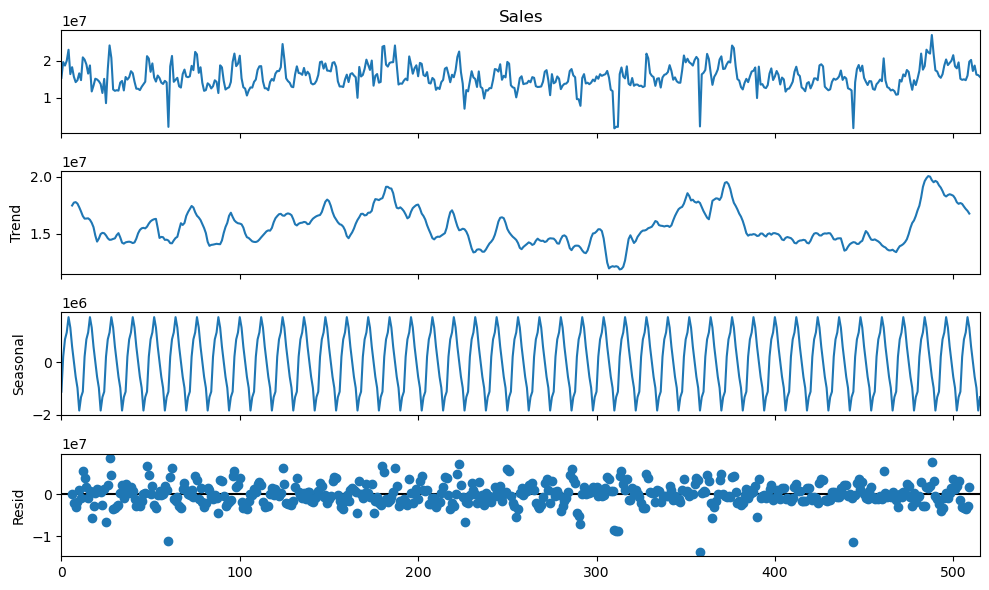

In [302]:
decomposition = seasonal_decompose(salesdf['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

#### Outliers Treatment: Clipping

In [303]:
original_salesdf=salesdf.copy()

In [391]:
#salesdf= original_salesdf.copy()

In [392]:
threshold_upper = salesdf['Sales'].quantile(0.99)
threshold_lower = salesdf['Sales'].quantile(0.01)

salesdf['Sales'] = salesdf['Sales'].clip(lower=threshold_lower, upper=threshold_upper)

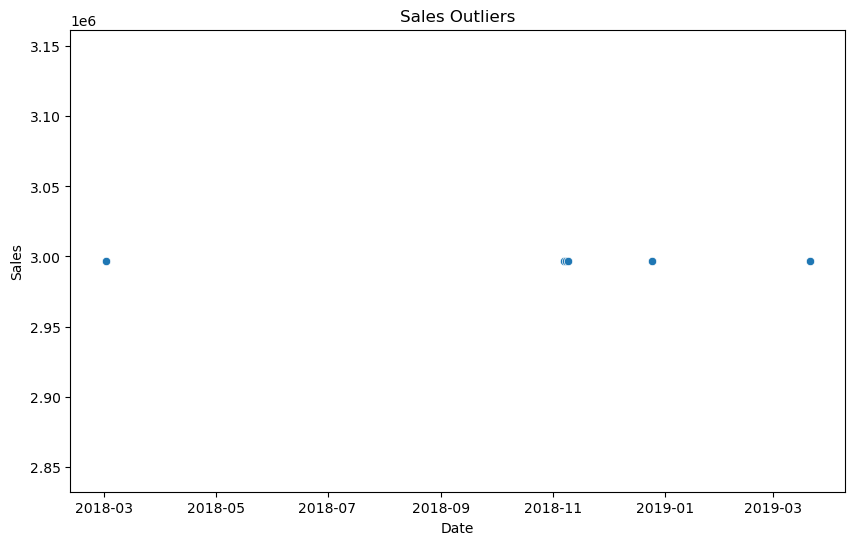

In [393]:
salesdf['z_score1'] = stats.zscore(salesdf['Sales'])

outliers1 = salesdf[salesdf['z_score1'].abs() > 3]
sns.scatterplot(data=outliers1, x='Date', y='Sales')
plt.title('Sales Outliers')
plt.show()

In [394]:
outliers1

Date         Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  \
60  2018-03-02  2.996960e+06        1           1          3411    2      3   
310 2018-11-07  2.996960e+06        1           1          2940    7     11   
311 2018-11-08  2.996960e+06        1           1          3690    8     11   
312 2018-11-09  2.996960e+06        1           1          3588    9     11   
358 2018-12-25  2.996960e+06        1           1          3060   25     12   
444 2019-03-21  2.996960e+06        1           1          3079   21      3   

     Year  DayOfWeek  IsWeekend  Estimated_Orders      Sales_MA   z_score  \
60   2018          4          0              3452  1.469957e+07 -4.116722   
310  2018          2          0              2809  1.402836e+07 -4.240162   
311  2018          3          0              3507  1.300855e+07 -4.106219   
312  2018          4          0              3448  1.187635e+07 -4.117516   
358  2018          1          0              3639  1.781775e+07 -4.080830   
444  2019          3          0              2905  1.353107e+07 -4.221699   

     z_score1  
60  -3.943116  
310 -3.943116  
311 -3.943116  
312 -3.943116  
358 -3.943116  
444 -3.943116

#### Impact Analysis: Before and After Treatment

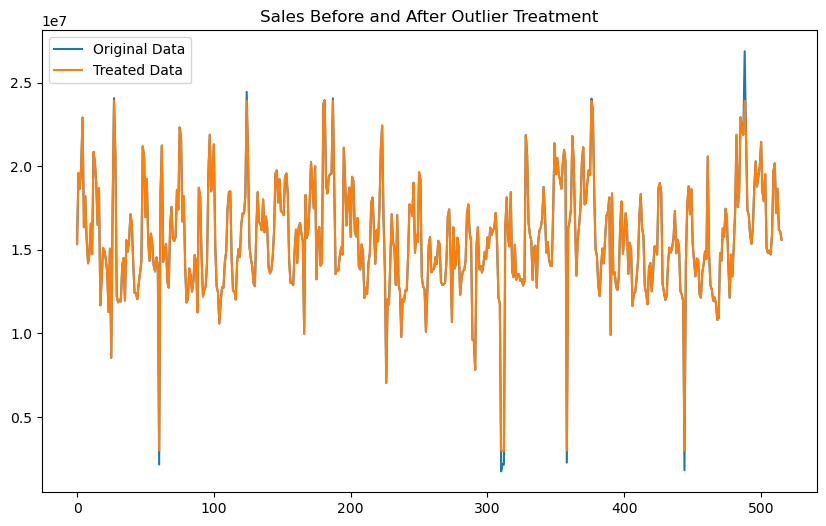

In [395]:
# Plotting original and treated data
original_salesdf['Sales'].plot(label='Original Data')
salesdf['Sales'].plot(label='Treated Data')
plt.legend()
plt.title('Sales Before and After Outlier Treatment')
plt.show()


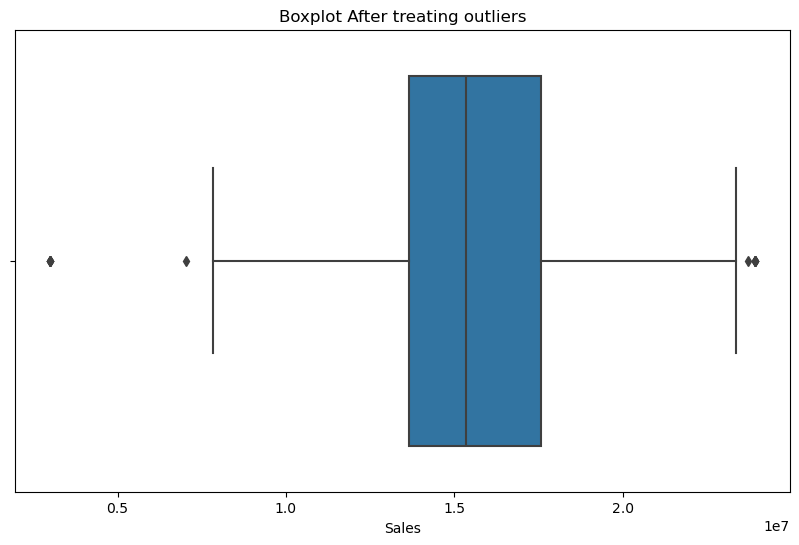

In [396]:
# Boxplot After treating outliers
sns.boxplot(x=salesdf['Sales'])
plt.title("Boxplot After treating outliers")
plt.show()

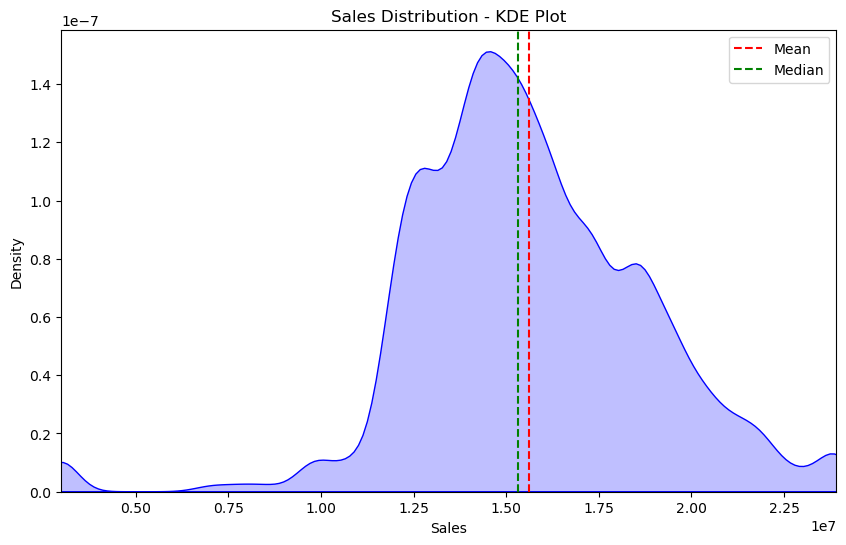

In [397]:
sns.kdeplot(salesdf['Sales'], fill=True, color='blue', bw_adjust=0.5)
plt.title('Sales Distribution - KDE Plot')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.xlim(salesdf['Sales'].min(), salesdf['Sales'].max())
plt.axvline(salesdf['Sales'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(salesdf['Sales'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()


#### Decomposition Timeseries post treating outliers

In [398]:
salesdf.set_index("Date",inplace=True)

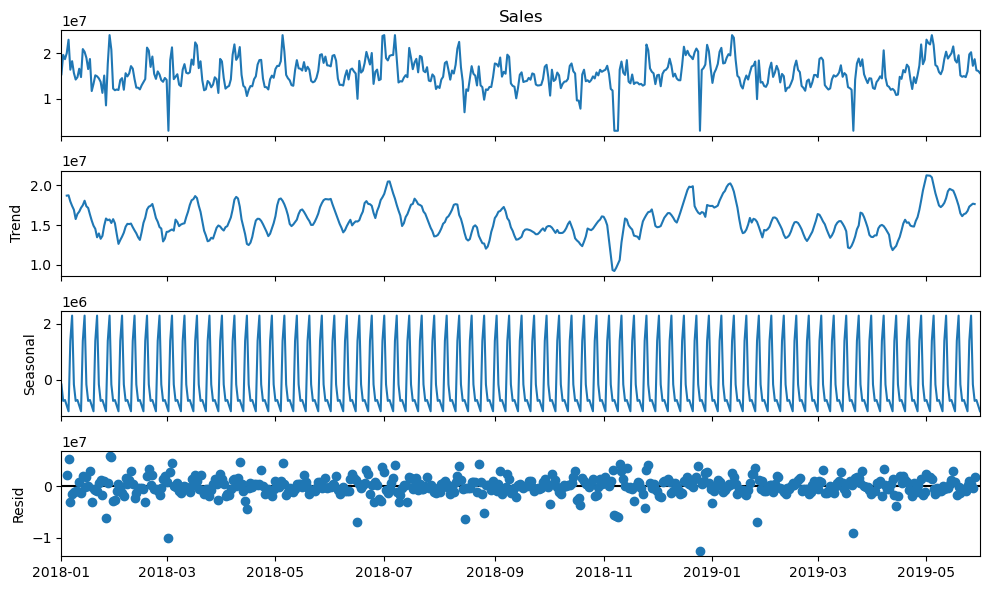

In [399]:
decomposition = seasonal_decompose(salesdf['Sales'], model='additive')
decomposition.plot()
plt.show()

## ML Modeling in Product Sales Forcasting

### Baseline Linear Regression Model

In [547]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

In [401]:
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [402]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2018-01-01 to 2019-05-31
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             516 non-null    float64
 1   Holiday           516 non-null    int64  
 2   IsDiscount        516 non-null    int64  
 3   Daily_Orders      516 non-null    int64  
 4   Day               516 non-null    int32  
 5   Month             516 non-null    int32  
 6   Year              516 non-null    int32  
 7   DayOfWeek         516 non-null    int32  
 8   IsWeekend         516 non-null    int64  
 9   Estimated_Orders  516 non-null    int64  
 10  Sales_MA          505 non-null    float64
 11  z_score           516 non-null    float64
 12  z_score1          516 non-null    float64
dtypes: float64(4), int32(4), int64(5)
memory usage: 48.4 KB


In [403]:
salesdf.head()

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-01  15345484.5        1           1         19666    1      1  2018   
2018-01-02  19592415.0        0           1         25326    2      1  2018   
2018-01-03  18652527.0        0           1         24047    3      1  2018   
2018-01-04  19956267.0        0           1         25584    4      1  2018   
2018-01-05  22902651.0        0           1         28436    5      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders  Sales_MA   z_score  \
Date                                                                     
2018-01-01          0          0             24464       NaN -0.082879   
2018-01-02          1          0             31234       NaN  1.216925   
2018-01-03          2          0             29736       NaN  0.929266   
2018-01-04          3          0             31814       NaN  1.328285   
2018-01-05          4          0             36511       NaN  2.230047   

            z_score1  
Date                  
2018-01-01 -0.085586  
2018-01-02  1.241104  
2018-01-03  0.947494  
2018-01-04  1.354767  
2018-01-05  2.275182

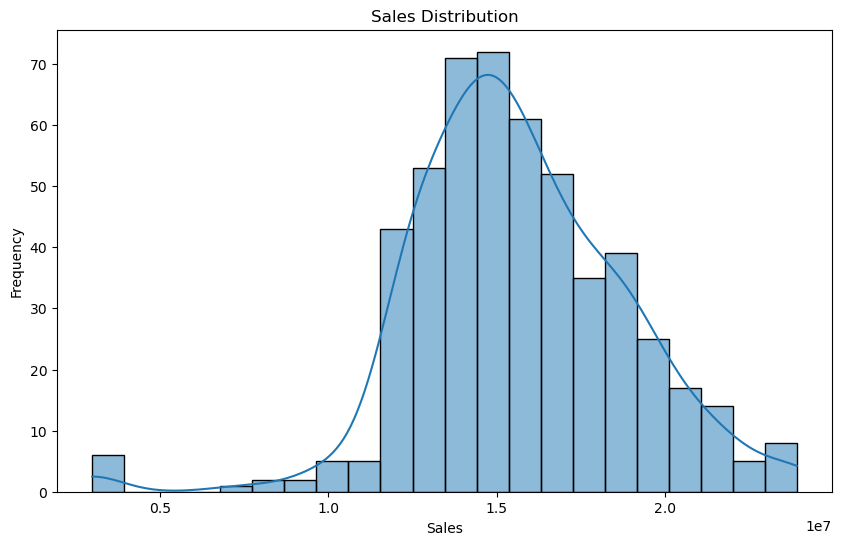

In [404]:
sns.histplot(salesdf['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [405]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


def baseLinearModel(data):
    data = data.drop(columns=['Date','Sales_MA','z_score'])
    X = data.drop(columns=['Sales'])
    y = data['Sales']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    y_pred = lr_model.predict(X_test)
    
    performance(y_test, y_pred)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Sales', color='blue', alpha=0.7)
    plt.plot(y_pred, label='Predicted Sales', color='red', alpha=0.7)
    plt.xlabel('Samples')
    plt.ylabel('Sales')
    plt.title('Actual vs Predicted Sales')
    plt.legend()
    plt.show()

#### Base LRModel: 1

In [406]:
mlmodeldf=salesdf.copy()

MAE : 74015.701
RMSE : 288198.265
MAPE: 0.004


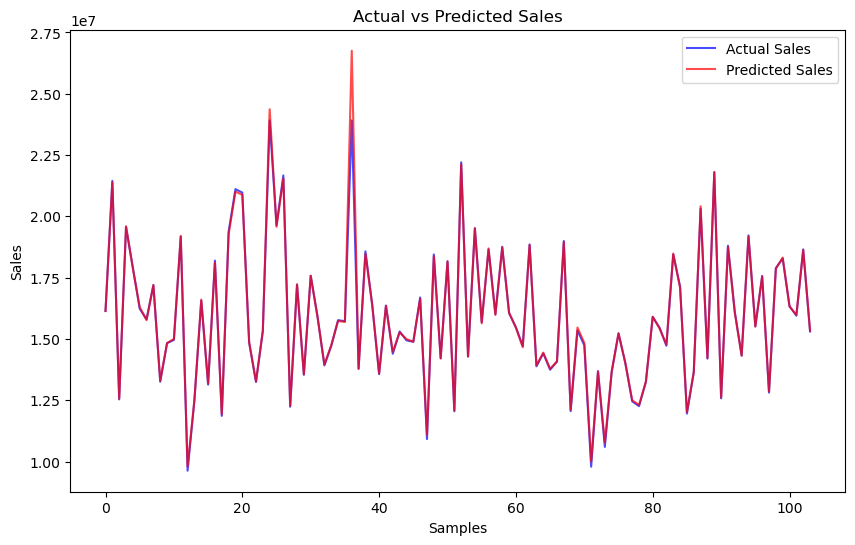

In [407]:
data=salesdf.reset_index()
data = data.drop(columns=['z_score1'])
baseLinearModel(data)

**The baseline linear regression model synopsis and performance metrics:**
* The sales values above or below a certain threshold, using the upper and lower bounds defined by a quantile (e.g., 99th percentile for the upper bound and 1st percentile for the lower bound):
  
1. **Mean Absolute Error (MAE) = 74,015.701**:
   - On average, the model’s predictions are off by around 74,015 units from the actual sales values.
   - Lower MAE indicates that predictions are close to actual values. However, MAE does not penalize larger errors as much as other metrics do.

2. **Root Mean Squared Error (RMSE) = 288,198.265**:
   - RMSE of 288,198 indicates that some predictions have significant errors, and this metric is sensitive to those outliers.
   - RMSE being much larger than MAE suggests that while most predictions are reasonable, some are significantly inaccurate.

3. **Mean Absolute Percentage Error (MAPE) = 0.004 (or 0.4%)**:
   - A MAPE of 0.4% means that the model’s predictions are, on average, off by 0.4% from the actual values, indicating high accuracy.

**Summary Conclusion:**
* The model performs quite well, especially when considering the MAPE of 0.4%, which shows that the model's predictions are close to actual sales in relative terms. But, the high RMSE compared to MAE suggests that there are a few larger errors or outliers in the dataset. 
* Improve this, by further investigate these outliers, potentially using clipping or imputing techniques, to see if reducing their impact can improve RMSE.

In [408]:
salesdf985=original_salesdf.copy()

In [409]:
salesdf985.head()

Date       Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
0 2018-01-01  15345484.5        1           1         19666    1      1  2018   
1 2018-01-02  19592415.0        0           1         25326    2      1  2018   
2 2018-01-03  18652527.0        0           1         24047    3      1  2018   
3 2018-01-04  19956267.0        0           1         25584    4      1  2018   
4 2018-01-05  22902651.0        0           1         28436    5      1  2018   

   DayOfWeek  IsWeekend  Estimated_Orders  Sales_MA   z_score  
0          0          0             24464       NaN -0.082879  
1          1          0             31234       NaN  1.216925  
2          2          0             29736       NaN  0.929266  
3          3          0             31814       NaN  1.328285  
4          4          0             36511       NaN  2.230047

In [410]:
#threshold_upper985 = salesdf985['Sales'].quantile(0.985)
threshold_lower015 = salesdf985['Sales'].quantile(0.015)

salesdf985['Sales'] = salesdf985['Sales'].clip(lower=threshold_lower015)

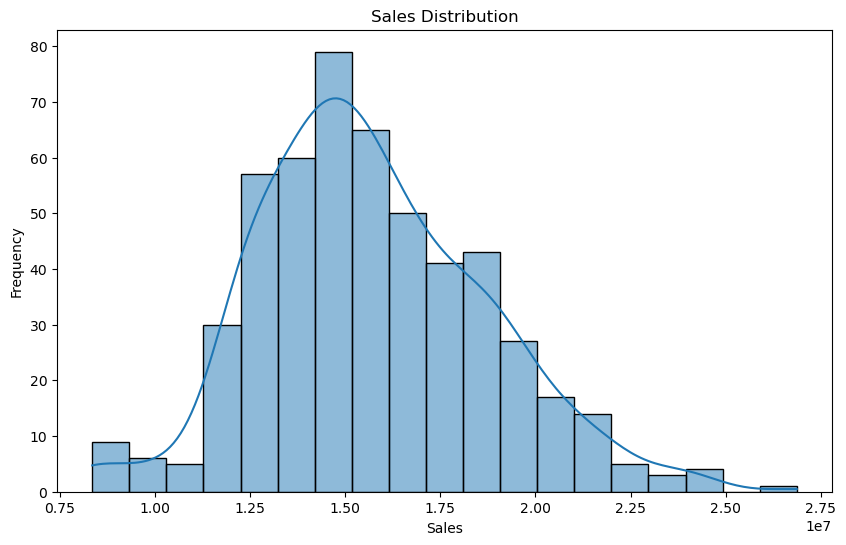

In [411]:
sns.histplot(salesdf985['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

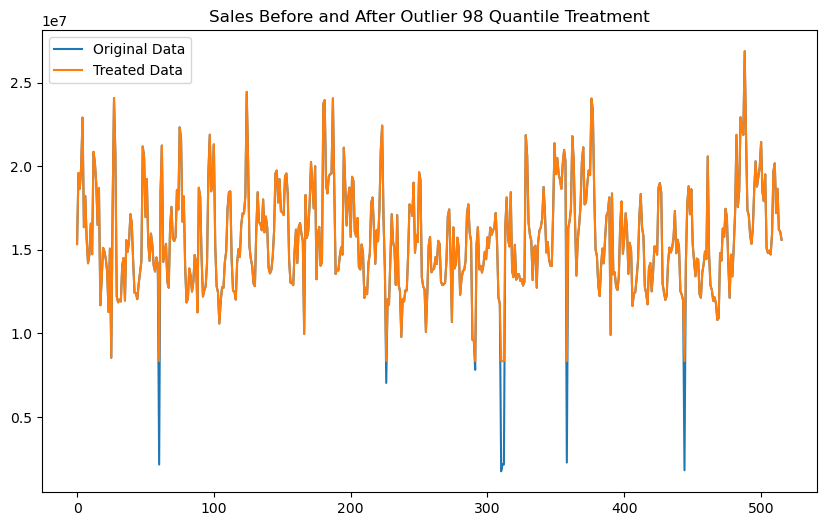

In [412]:
# Plotting original and treated data
original_salesdf['Sales'].plot(label='Original Data')
salesdf985['Sales'].plot(label='Treated Data')
plt.legend()
plt.title('Sales Before and After Outlier 98 Quantile Treatment')
plt.show()


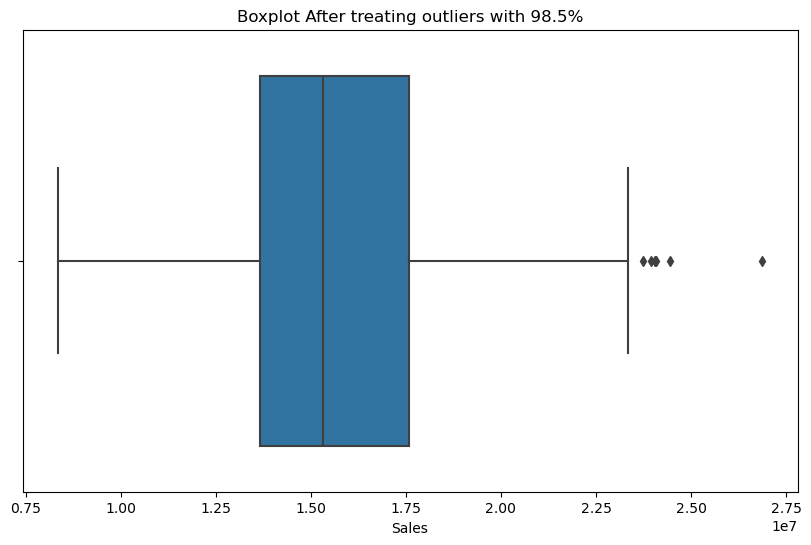

In [413]:
# Boxplot After treating outliers
sns.boxplot(x=salesdf985['Sales'])
plt.title("Boxplot After treating outliers with 98.5%")
plt.show()

#### Base LRModel: 2

MAE : 296383.551
RMSE : 401737.038
MAPE: 0.02


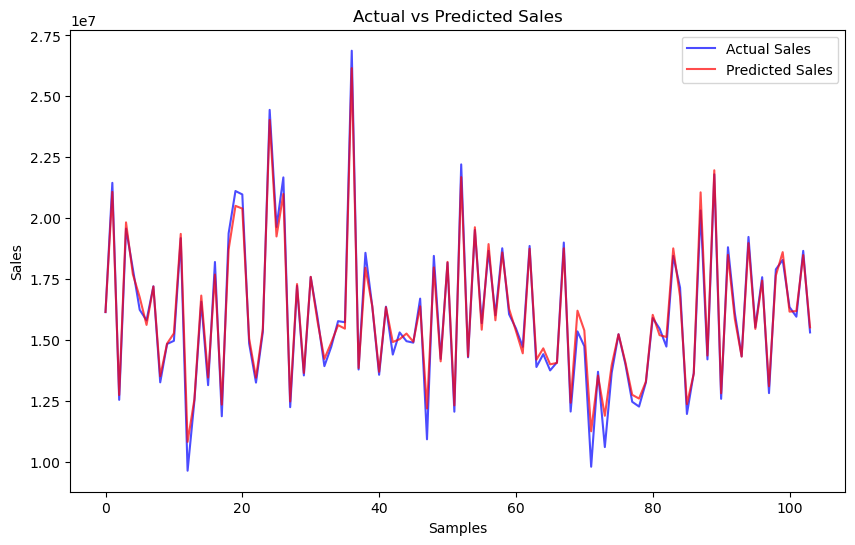

In [414]:
data=salesdf985.reset_index()
baseLinearModel(data)

#### Conclusion: Baseline Linear Regression Model:

**Business Context:**

* Assumung nature of the business tolerates some variability in high sales values (e.g., due to promotions or holidays), the 99th percentile could be suitable, preserving more high-value data.
* Comparing Various Percentiles: 99%-1%, 98%-2%, lower 2%, 98.5%-1.5%, 99%-1% stands out:
    * The 99%-1% clipping provides significantly better performance across all metrics (MAE, RMSE, and MAPE).

#### Time Series Data Split: Date based train and test sets

#### Integrating Correlation Findings of Lag 1

In [415]:
nolagsalesdf=salesdf.copy()

In [416]:
salesdf['Sales_Lag1'] = salesdf['Sales'].shift(1)
salesdf.head()

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-01  15345484.5        1           1         19666    1      1  2018   
2018-01-02  19592415.0        0           1         25326    2      1  2018   
2018-01-03  18652527.0        0           1         24047    3      1  2018   
2018-01-04  19956267.0        0           1         25584    4      1  2018   
2018-01-05  22902651.0        0           1         28436    5      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders  Sales_MA   z_score  \
Date                                                                     
2018-01-01          0          0             24464       NaN -0.082879   
2018-01-02          1          0             31234       NaN  1.216925   
2018-01-03          2          0             29736       NaN  0.929266   
2018-01-04          3          0             31814       NaN  1.328285   
2018-01-05          4          0             36511       NaN  2.230047   

            z_score1  Sales_Lag1  
Date                              
2018-01-01 -0.085586         NaN  
2018-01-02  1.241104  15345484.5  
2018-01-03  0.947494  19592415.0  
2018-01-04  1.354767  18652527.0  
2018-01-05  2.275182  19956267.0

In [417]:
salesdf = salesdf.dropna()

In [464]:
train_size = int(len(salesdf) * 0.8)
train, test = salesdf.iloc[:train_size], salesdf.iloc[train_size:]

salesdf = salesdf.asfreq('D')
train= train.asfreq('D')

#### Baseline Timeseries Model

#### Base Model: 1
**AR Model**

In [419]:
armodel = SARIMAX(train['Sales'],order=(1,0,0,))
arresults = armodel.fit(disp=False)

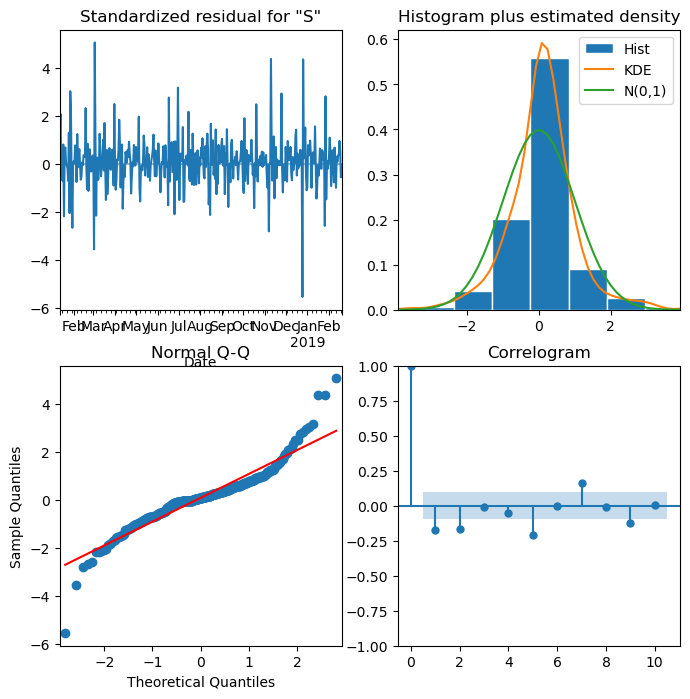

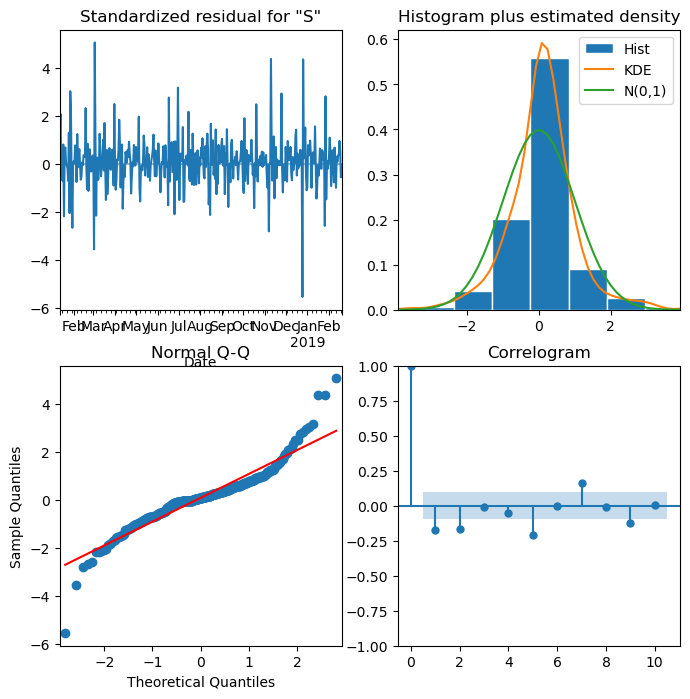

In [420]:
arresults.plot_diagnostics(figsize=(8,8))

In [421]:
steps=len(test)
test['arpred'] = arresults.forecast(steps=steps)
performance(test['Sales'], test['arpred'])

MAE : 9094830.516
RMSE : 10528045.872
MAPE: 0.561


#### Base Model: 2 — Without Lag

In [422]:
nolagsalesdf.head(2)

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-01  15345484.5        1           1         19666    1      1  2018   
2018-01-02  19592415.0        0           1         25326    2      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders  Sales_MA   z_score  \
Date                                                                     
2018-01-01          0          0             24464       NaN -0.082879   
2018-01-02          1          0             31234       NaN  1.216925   

            z_score1  
Date                  
2018-01-01 -0.085586  
2018-01-02  1.241104

In [432]:
train_size_nolag = int(len(nolagsalesdf) * 0.8)
train_nolag, test_nolag = nolagsalesdf.iloc[:train_size_nolag], nolagsalesdf.iloc[train_size_nolag:]

nolagsalesdf = nolagsalesdf.asfreq('D')
train_nolag= train_nolag.asfreq('D')

In [433]:
nolagModel = SARIMAX(train_nolag['Sales'],seasonal_order=(1,0,1,7))
nolagResults = nolagModel.fit(disp=False)

MAE : 2280308.768
RMSE : 3026617.206
MAPE: 0.174


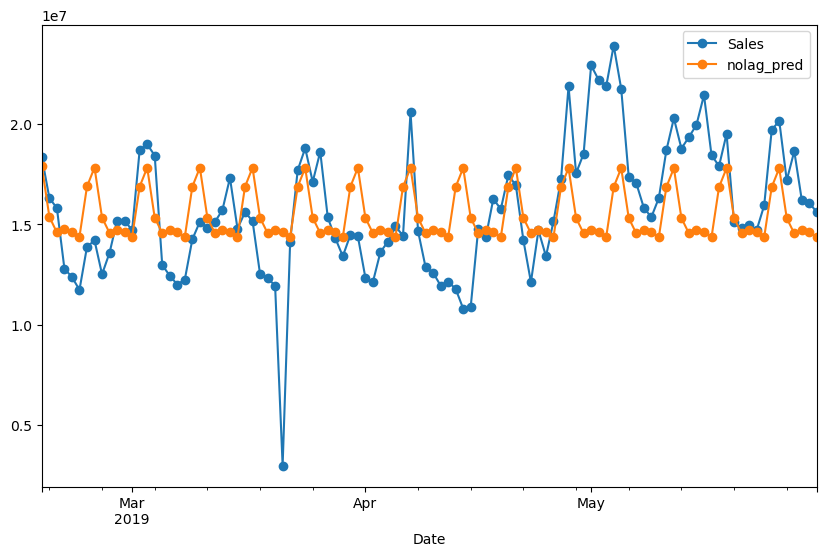

In [435]:
steps_nolag=len(test_nolag)
test_nolag['nolag_pred'] = nolagResults.forecast(steps=steps_nolag)
performance(test_nolag['Sales'], test_nolag['nolag_pred'])
test_nolag[['Sales','nolag_pred']].plot(style='-o')
plt.show()

#### Base Model : 3

In [436]:
bmodel = SARIMAX(train['Sales'],exog=train[['Sales_Lag1']],seasonal_order=(1,0,1,7))
bresults = bmodel.fit(disp=False)

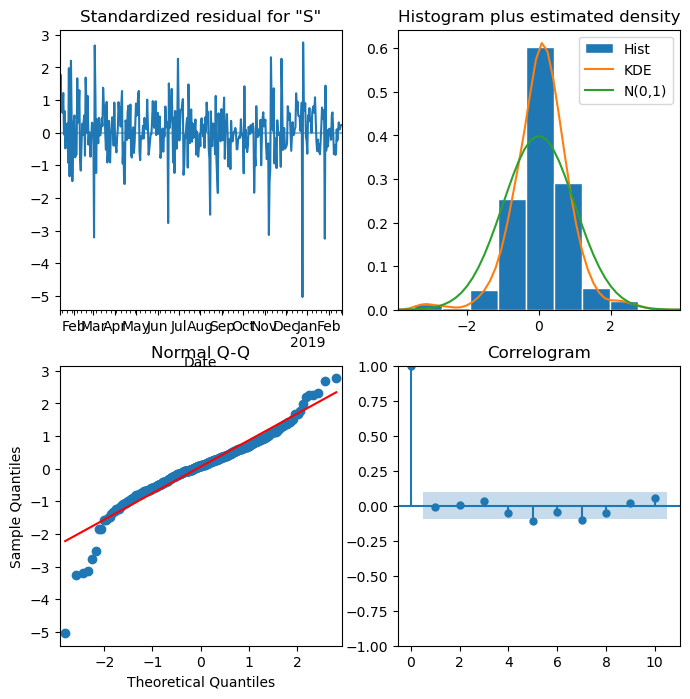

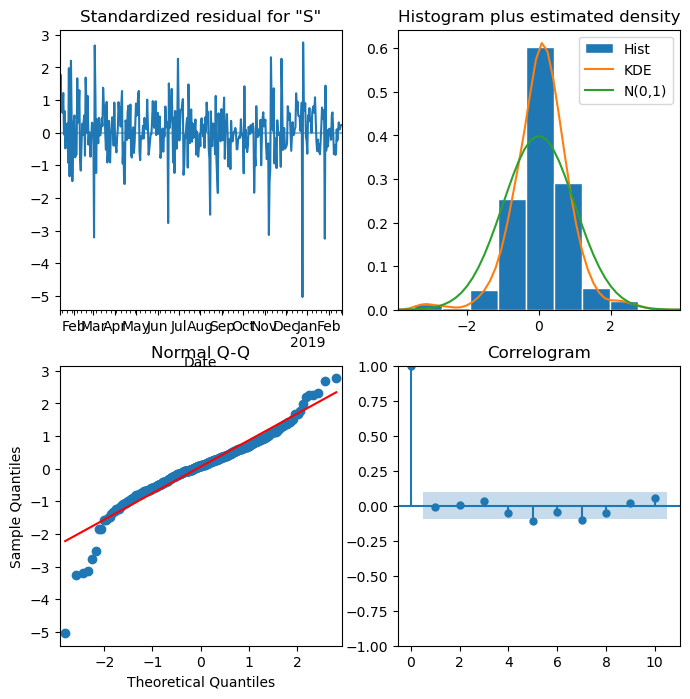

In [437]:
bresults.plot_diagnostics(figsize=(8,8))

- The residuals have **constant variance**.
- Majority of the dots lie on the red line in the Normal Q-Q plot
 - Hence, the residuals follow a **normal distribution.**
- The residuals are **not auto correlated** as there is no significant pattern.

In [438]:
len(test)

101

In [439]:
steps=len(test)
test['bpred'] = bresults.forecast(steps=steps, exog=test[['Sales_Lag1']])
performance(test['Sales'], test['bpred'])

#MAE : 2144406.676
#RMSE : 2729231.66
#MAPE: 0.137

MAE : 1490916.024
RMSE : 2093427.573
MAPE: 0.12


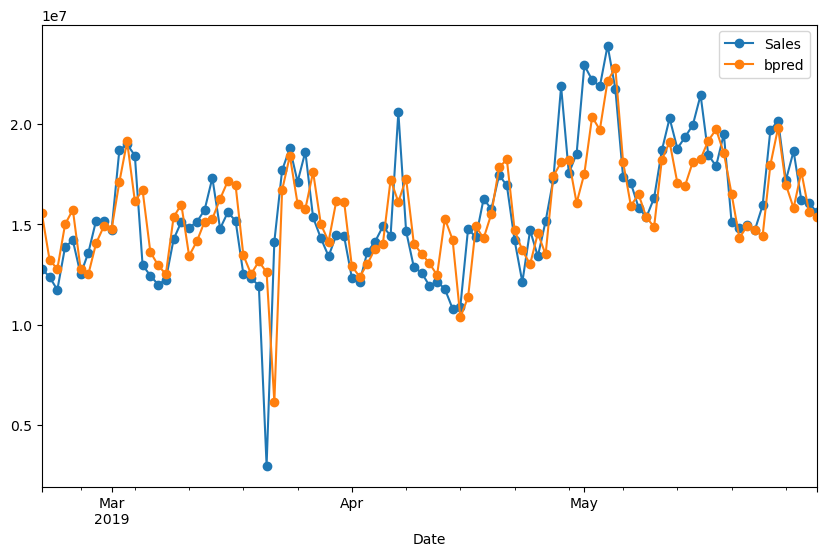

In [440]:
test[['Sales','bpred']].plot(style='-o')
plt.show()

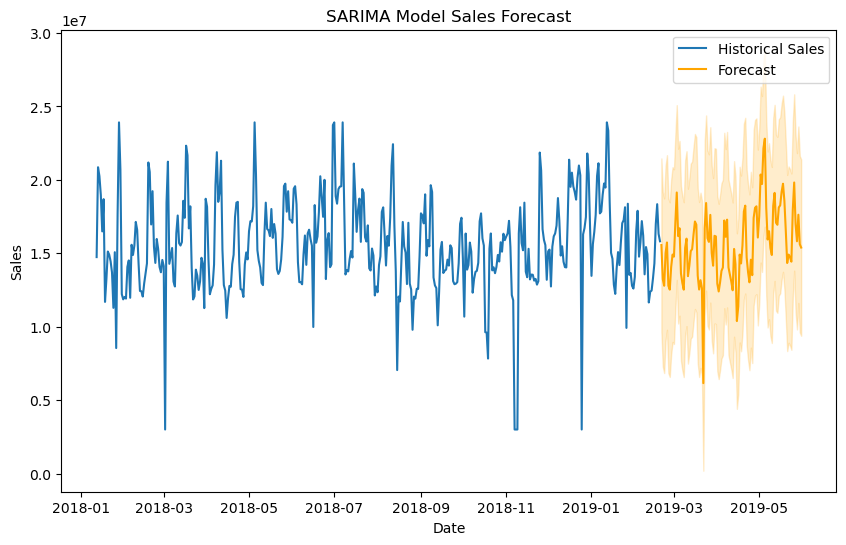

In [444]:
forecast = bresults.get_forecast(steps=steps, exog=test[['Sales_Lag1']])
forecast_ci = forecast.conf_int()

# Plot the original sales data
plt.plot(train['Sales'], label='Historical Sales')

# Plot the forecasted sales
plt.plot(forecast.predicted_mean, color='orange', label='Forecast')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='orange', alpha=0.2)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA Model Sales Forecast')
plt.legend()
plt.show()


#### 5. Correlation between #Orders (AGG — Daily_Orders) and Sales:
* Hypothesis: A higher number of orders correlates with higher sales.
* Test: Calculate Pearson or Spearman correlation coefficient, depending on the data distribution.


In [445]:
salesdf.head(2)

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-12  14737770.0        0           1         20097   12      1  2018   
2018-01-13  20857848.0        0           1         27656   13      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders      Sales_MA   z_score  \
Date                                                                         
2018-01-12          4          0             23495  1.723955e+07 -0.268874   
2018-01-13          5          1             33251  1.769891e+07  1.604220   

            z_score1  Sales_Lag1  
Date                              
2018-01-12 -0.275429  16565787.0  
2018-01-13  1.636410  14737770.0

In [447]:
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_pval = pearsonr(salesdf['Daily_Orders'], salesdf['Sales'])

spearman_corr, spearman_pval = spearmanr(salesdf['Daily_Orders'], salesdf['Sales'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson p-value:", pearson_pval)
print("\nSpearman Correlation Coefficient:", spearman_corr)
print("Spearman p-value:", spearman_pval)

Pearson Correlation Coefficient: 0.9188643995170742
Pearson p-value: 2.7532713954492293e-205

Spearman Correlation Coefficient: 0.8980446138436076
Spearman p-value: 1.6093801495471824e-181


#### Obaservations
* Pearson or Spearman correlation tests strongly support the hypothesis that higher numbers of orders correlate with higher sales.
* Number_of_Orders is a very reliable predictor of Sales, and it can be highly valuable for the forecasting models

**Pearson Correlation (0.92)**: Strong positive linear relationship. As one variable increases, the other does too.

**Spearman Correlation (0.90)**: Strong positive monotonic relationship. Both variables increase together, even if the relationship isn’t strictly linear.
- **p-values**: Both are extremely low (near 0), meaning the correlation is statistically significant and not by chance.
- **Conclusion**: There is a strong, reliable connection between the variables, making them useful for predictions or further analysis.

In [448]:
pearson_corr, pearson_pval = pearsonr(salesdf['Holiday'], salesdf['Sales'])

spearman_corr, spearman_pval = spearmanr(salesdf['Holiday'], salesdf['Sales'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson p-value:", pearson_pval)
print("\nSpearman Correlation Coefficient:", spearman_corr)
print("Spearman p-value:", spearman_pval)

Pearson Correlation Coefficient: -0.31654182481795984
Pearson p-value: 3.2431887039644473e-13

Spearman Correlation Coefficient: -0.24990821384984793
Spearman p-value: 1.2508657782535525e-08


#### Observations
- **Pearson Correlation (-0.32)**: Weak negative linear relationship. As one variable increases, the other tends to decrease, but the correlation is not very strong.
- **Spearman Correlation (-0.25)**: Weak negative monotonic relationship. Both variables move in opposite directions, but the trend is not very pronounced.
- **p-values**: Both are very low (near 0), indicating that the negative correlations are statistically significant.
- **Conclusion**: There’s a moderate negative relationship between the variables, but it's weak. The variables can be useful for analysis but may not strongly predict each other.

In [449]:
pearson_corr, pearson_pval = pearsonr(salesdf['IsDiscount'], salesdf['Sales'])

spearman_corr, spearman_pval = spearmanr(salesdf['IsDiscount'], salesdf['Sales'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson p-value:", pearson_pval)
print("\nSpearman Correlation Coefficient:", spearman_corr)
print("Spearman p-value:", spearman_pval)

Pearson Correlation Coefficient: 0.04787344274161409
Pearson p-value: 0.28292505821171354

Spearman Correlation Coefficient: 0.05645166671046956
Spearman p-value: 0.2053484926288291


#### Observations:
- **Pearson Correlation (0.05)**: Very weak positive linear relationship. The variables are almost uncorrelated in a linear sense.
- **Spearman Correlation (0.06)**: Very weak positive monotonic relationship. There's a slight tendency for both variables to increase together, but it's almost negligible.
- **p-values**: Both p-values (0.28 and 0.21) are much greater than 0.05, indicating that the correlations are statistically insignificant.
- **Conclusion**: The two variables do not show a meaningful correlation, and they are unlikely to have a predictive relationship.

In [450]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [557]:
def performanceMetrics(actual, predicted):
    mae_metric=round(mae(actual, predicted), 3)
    rmse_metric=round(mse(actual, predicted)**0.5, 3)
    mape_metric=round(mape(actual, predicted), 3)
    #print('MAE :', mae_metric)
    #print('RMSE :', rmse_metric )
    #print('MAPE:', mape_metric)
    return mae_metric,rmse_metric,mape_metric



In [456]:
def transform_data(data):
    # Log Transformation for Sales and Sales_Lag1
    data['Log_Sales'] = np.log1p(data['Sales'])
    data['Log_Sales_Lag1'] = np.log1p(data['Sales_Lag1'])

    # Standardization for Daily_Orders and Estimated_Orders
    scaler = StandardScaler()
    data[['Daily_Orders', 'Estimated_Orders']] = scaler.fit_transform(data[['Daily_Orders', 'Estimated_Orders']])

    # Cyclical Transformation for Day, Month, and DayOfWeek
    data['sin_Day'] = np.sin(2 * np.pi * data['Day'] / 31)  # Day (1 to 31)
    data['cos_Day'] = np.cos(2 * np.pi * data['Day'] / 31)

    data['sin_Month'] = np.sin(2 * np.pi * data['Month'] / 12)  # Month (1 to 12)
    data['cos_Month'] = np.cos(2 * np.pi * data['Month'] / 12)

    data['sin_DayOfWeek'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)  # DayOfWeek (0 to 6)
    data['cos_DayOfWeek'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)

    return data


In [558]:
def modelSARIMAX(order, sorder, train, test, forecast_steps, exogfeatures,showMetrics=True, disp=False):
    
    if exogfeatures is not None:
        logmodel = SARIMAX(train['Log_Sales'], order=order, seasonal_order=seasonal_order, exog=train[exogfeatures])
    else:
        logmodel = SARIMAX(train['Log_Sales'], order=order, seasonal_order=seasonal_order)
        
    logresults = logmodel.fit(disp=disp)
    print(f"AIC: {logresults.aic}, BIC: {logresults.bic}")
    #print(logresults.summary())
    logresults.plot_diagnostics(figsize=(10, 8))
    plt.show()

    # Forecast future values for a specified number of steps
    forecast=None
    if exogfeatures is not None:
        forecast = logresults.get_forecast(steps=forecast_steps, exog=test[exogfeatures])
    else:
        forecast = logresults.get_forecast(steps=forecast_steps)
    
    forecast_ci = forecast.conf_int()

    # Plot the forecasted log-transformed sales
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Log_Sales'], label='Observed (Log Sales)')
    plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.xlabel('Date')
    plt.ylabel('Log(Sales)')
    plt.title('Sales Forecast')
    plt.legend()
    plt.show()

    #test['Log_Sales_Pred'] = forecast.predicted_mean  
    test['Sales_Pred'] = np.expm1(forecast.predicted_mean)   
    mae_val= None
    rmse_val= None
    mape_val= None
    if(showMetrics):
        mae_val,rmse_val,mape_val=performanceMetrics(test['Sales'], test['Sales_Pred'])
        print('MAE :', mae_val)
        print('RMSE :', rmse_val )
        print('MAPE:', mape_val)

    return (test.copy(),logmodel,logresults)


* Define the SARIMA model order based on ACF and PACF analysis
* ARIMA order (p, d, q): we choose p=1 (AR(1)), d=0 (stationary), and q=0 (no MA)
* Seasonal order (P, D, Q, S): S=12 (monthly seasonality as data is daily)

In [490]:
dataTr=train.copy()
dataT=test.copy()
dataTr = transform_data(dataTr)
dataT = transform_data(dataT)  

### Model 1

order = (1, 0, 0)
seasonal_order = (0, 1, 0, 12)
forecast_steps=len(test)
exog=None
firstdf,firstmodel, firstresult=modelSARIMAX(order, seasonal_order,dataTr, dataT, forecast_steps,exog)
#MAE : 2274064.817
#RMSE : 2918157.721
#MAPE: 0.137

In [511]:
test[['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']].head(2)

Holiday  IsDiscount  IsWeekend  Daily_Orders
Date                                                    
2019-02-20        0           1          0         21944
2019-02-21        0           1          0         21671

In [486]:
dataTr[['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']].head(2)

Holiday  IsDiscount  IsWeekend  Daily_Orders
Date                                                    
2018-01-12        0           1          0     -1.075444
2018-01-13        0           1          1      0.645730

### Model 2: With Exog Variables: ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']

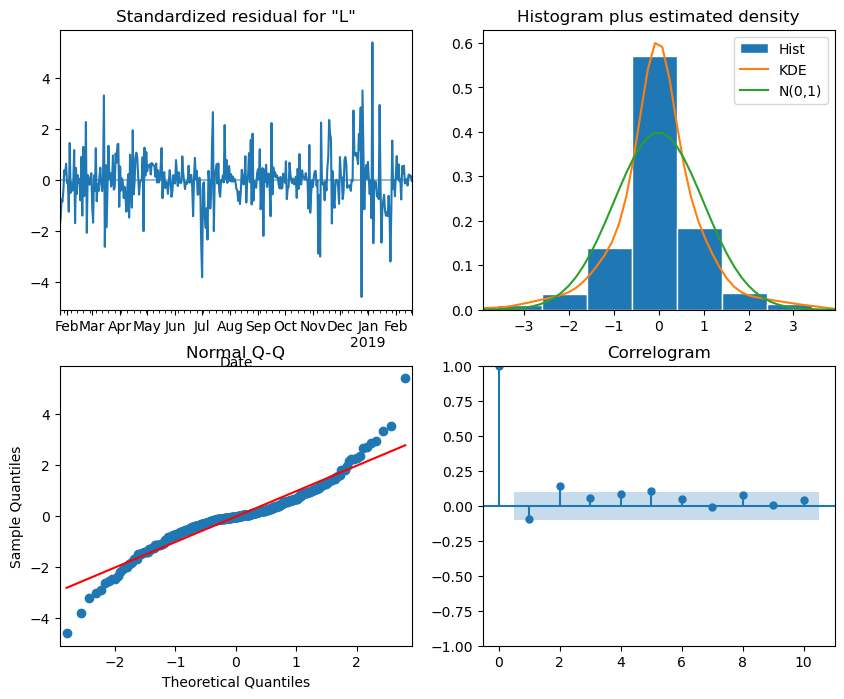

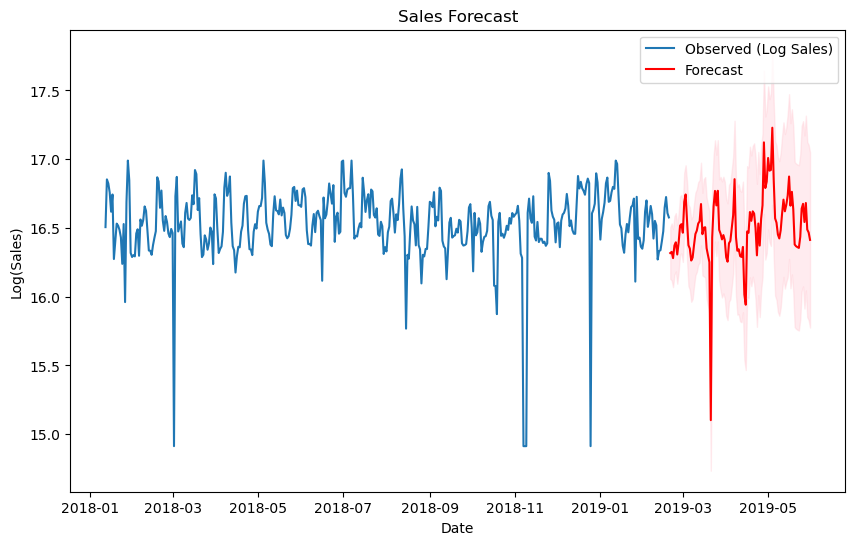

MAE : 1060773.586
RMSE : 1499325.262
MAPE: 0.066


In [513]:
order = (1, 0, 0)
seasonal_order = (0, 1, 0, 12)
forecast_steps=len(dataT)
exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']
model2df,model2, model2Results=modelSARIMAX(order, seasonal_order, dataTr, dataT, forecast_steps, exogfeature)

#MAE : 795216.784
#RMSE : 1174386.718
#MAPE: 0.05

### Model 3: With Exog ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders','sin_Month', 'cos_Month']

In [538]:
order = (1, 0, 0)
seasonal_order = (0, 1, 0, 12)
forecast_steps=len(dataT)
exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders','sin_Month', 'cos_Month']
model3df,model3, model3Results= modelSARIMAX(order, seasonal_order, dataTr, dataT, forecast_steps, exogfeature)

#MAE : 711475.831
#RMSE : 1101532.774
#MAPE: 0.046

AIC: -714.2189292173832, BIC: -682.4488344990596
MAE : 1002078.349
RMSE : 1480377.808
MAPE: 0.062


### Model 4: With Different Seasonal Order and Exog

In [567]:
# Grid Search Example (you can iterate over these ranges)
from itertools import product
def orderGridSearch( dataTr, dataT,exogfeature):
    p_values = [0, 1, 2, 3]
    d_values = [0, 1]
    q_values = [0, 1, 2, 3]
    
    P_values = [0, 1, 2]
    D_values = [0, 1]
    Q_values = [0, 1, 2]
    S_values = [12]  # For monthly data with yearly seasonality
    
    best_mae = float('inf')  # Initialize best MAE with a high value
    best_order = None
    best_seasonal_order = None
    
    #exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders','sin_Month', 'cos_Month']
    for p, d, q, P, D, Q, S in product(p_values, d_values, q_values, P_values, D_values, Q_values, S_values):
        order = (p, d, q)
        seasonal_order = (P, D, Q, S)
        
        mdf, model, mResults = modelSARIMAX(order, seasonal_order, dataTr, dataT, forecast_steps, exogfeature)
    
        # Calculate MAE, RMSE, MAPE, etc., for this combination of parameters
        mae_value=performanceMetrics(dataT['Sales'], mdf['Sales_Pred'])[0]  # Assuming performanceMetrics returns MAE as the first metric
        
        if mae_value < best_mae:
            best_mae = mae_value
            best_order = order
            best_seasonal_order = seasonal_order
    
    print(f"Best order: {best_order}")
    print(f"Best seasonal order: {best_seasonal_order}")


In [568]:
#exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders','sin_Month', 'cos_Month']
#orderGridSearch( dataTr, dataT,exogfeature)

/Users/nidhi/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC: -873.0338084557133, BIC: -837.2924518975991


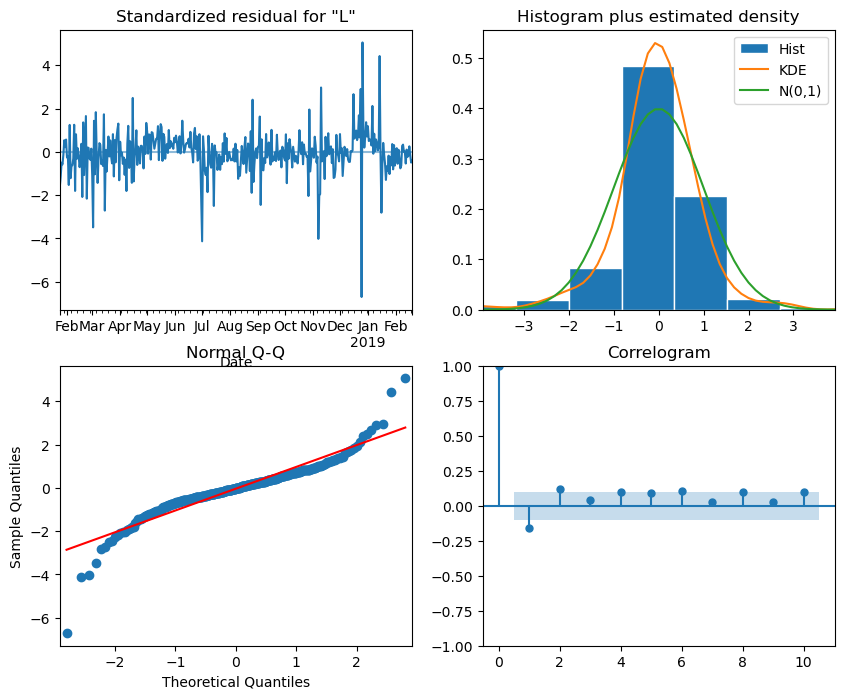

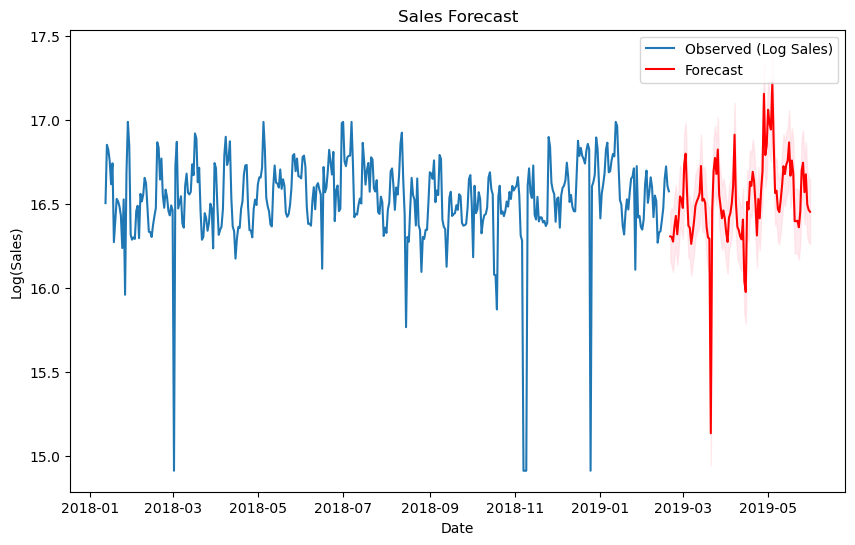

MAE : 932001.618
RMSE : 1408530.248
MAPE: 0.057


In [565]:
order = (1, 0, 0)
seasonal_order = (2, 1, 1, 12)
forecast_steps=len(dataT)
exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']
model4df,model4, model4Results=modelSARIMAX(order, seasonal_order, dataTr, dataT, forecast_steps, exogfeature)

* MAE : 932001.618
* RMSE : 1408530.248
* MAPE: 0.057

#### Conclusion:
- **Model 4** is the best overall, showing the lowest error metrics across the board with MAE of 932,001, RMSE of 1,408,530, and MAPE of 5.7%. It also has the lowest AIC and BIC scores, indicating good fit.
- **Model 3** performs well with a slightly higher MAE and RMSE compared to Model 4 but achieves a close MAPE of 6.2%.
- **Model 2** has moderate performance with a higher MAE and RMSE and a MAPE of 6.6%.
- **Model 1** shows the highest error metrics, making it the least favorable for forecasting.

In [561]:
import pickle

#pickle_out= open("forecast_sarimax_result.pkl", mode= "wb")
#pickle.dump(sarimax_result,pickle_out)
#pickle_out.close()
#pickle_out= open("forecast_model4Results.pkl", mode= "wb")
#pickle.dump(model4Results,pickle_out)
#pickle_out.close()

### Complex Model Selection:

#### Complex Models

* Explore more sophisticated models to improve accuracy. Potential models include:
* **Time Series Models:** ARIMA, SARIMA, or Prophet, which are specifically designed for forecasting based on time series data.


#!{sys.executable} -m pip install xgboost


In [569]:
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor

#### ARIMA Model

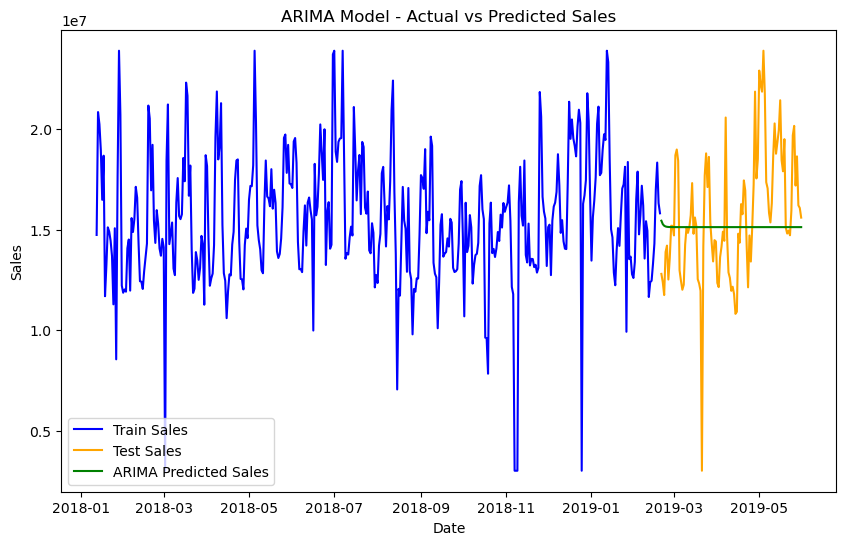

                               SARIMAX Results                                
Dep. Variable:              Log_Sales   No. Observations:                  404
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  22.974
Date:                Sun, 10 Nov 2024   AIC                            -39.948
Time:                        10:14:04   BIC                            -27.944
Sample:                    01-12-2018   HQIC                           -35.196
                         - 02-19-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5321      0.030    543.084      0.000      16.472      16.592
ar.L1          0.4681      0.019     24.580      0.000       0.431       0.505
sigma2         0.0522      0.001     35.571      0.0

In [571]:
p = 1  
d = 0 
q = 0
#dataTr, dataT
arima_model = ARIMA(dataTr['Log_Sales'], order=(p, d, q))
arima_fit = arima_model.fit()

forecast_steps = len(dataT)
arima_forecast = arima_fit.forecast(steps=forecast_steps)
dataT['Sales_Pred_ARIMA'] = np.expm1(arima_forecast)   
#dataT['Sales_Pred_ARIMA'] = arima_forecast


plt.plot(dataTr['Sales'], label='Train Sales', color='blue')
plt.plot(dataT['Sales'], label='Test Sales', color='orange')
plt.plot(dataT['Sales_Pred_ARIMA'], label='ARIMA Predicted Sales', color='green')
plt.title('ARIMA Model - Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

print(arima_fit.summary())

mae_val,rmse_val,mape_val =performanceMetrics(dataT['Sales'], dataT['Sales_Pred_ARIMA'])
print('MAE :', mae_val)
print('RMSE :', rmse_val )
print('MAPE:', mape_val)

import sys
print(sys.executable)
!{sys.executable} -m pip install prophet


* Tree-Based Models: Random forests and gradient boosting machines (e.g., XGBoost, LightGBM) that can handle nonlinear relationships and interactions between features.


#### RandomForestRegressor

In [575]:
salesdf.head(2)

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-12  14737770.0        0           1         20097   12      1  2018   
2018-01-13  20857848.0        0           1         27656   13      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders      Sales_MA   z_score  \
Date                                                                         
2018-01-12          4          0             23495  1.723955e+07 -0.268874   
2018-01-13          5          1             33251  1.769891e+07  1.604220   

            z_score1  Sales_Lag1  
Date                              
2018-01-12 -0.275429  16565787.0  
2018-01-13  1.636410  14737770.0

In [572]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [577]:
cmsalesdf=salesdf.copy()

In [1012]:
def transform_data1(dTr,dTest=None, standard=True):
    # Log Transformation for Sales: X
    #dTr['Log_Sales'] = np.log1p(dTr['Sales'])
    if 'Sales' in dTr.columns:
        dTr['Log_Sales'] = np.log1p(dTr['Sales'])
    else:
        print("'Sales' column does not exist in the dTr dataframe.")
    if dTest is not None:
        if 'Sales' in dTest.columns:
            dTest['Log_Sales'] = np.log1p(dTest['Sales'])
        else:
             print("'Sales' column does not exist in the dTest dataframe.")

    # Standardization for Daily_Orders
    if standard is True:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        if 'Daily_Orders' in dTr.columns:
            dTr[['Daily_Orders']] = scaler.fit_transform(dTr[['Daily_Orders']])
        else:
            print("'Daily_Orders' column does not exist in the dTr dataframe.")
        if dTest is not None:
            if 'Daily_Orders' in dTr.columns:
                dTest[['Daily_Orders']] = scaler.transform(dTest[['Daily_Orders']])
            else:
                print("'Daily_Orders' column does not exist in the dTest dataframe.")

    
    # Cyclical Transformation for Day, Month, and DayOfWeek
    # dTr
    dTr['sin_Day'] = np.sin(2 * np.pi * dTr['Day'] / 31)  # Day (1 to 31)
    dTr['cos_Day'] = np.cos(2 * np.pi * dTr['Day'] / 31)

    dTr['sin_Month'] = np.sin(2 * np.pi * dTr['Month'] / 12)  # Month (1 to 12)
    dTr['cos_Month'] = np.cos(2 * np.pi * dTr['Month'] / 12)

    dTr['sin_DayOfWeek'] = np.sin(2 * np.pi * dTr['DayOfWeek'] / 7)  # DayOfWeek (0 to 6)
    dTr['cos_DayOfWeek'] = np.cos(2 * np.pi * dTr['DayOfWeek'] / 7)

    #dTest
    if dTest is not None:
        dTest['sin_Day'] = np.sin(2 * np.pi * dTest['Day'] / 31)  # Day (1 to 31)
        dTest['cos_Day'] = np.cos(2 * np.pi * dTest['Day'] / 31)
        dTest['sin_Month'] = np.sin(2 * np.pi * dTest['Month'] / 12)  # Month (1 to 12)
        dTest['cos_Month'] = np.cos(2 * np.pi * dTest['Month'] / 12)
        dTest['sin_DayOfWeek'] = np.sin(2 * np.pi * dTest['DayOfWeek'] / 7)  # DayOfWeek (0 to 6)
        dTest['cos_DayOfWeek'] = np.cos(2 * np.pi * dTest['DayOfWeek'] / 7)

    if (dTest is not None) & (standard is True):
        return dTr, dTest, scaler
    elif (dTest is not None) & (standard is False):
        return dTr, dTest
    elif (dTest is None) & (standard is True):
        return dTr, scaler
    else:
        return dTr


In [592]:
cmsalesdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2018-01-12 to 2019-05-31
Freq: D
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             505 non-null    float64
 1   Holiday           505 non-null    int64  
 2   IsDiscount        505 non-null    int64  
 3   Daily_Orders      505 non-null    int64  
 4   Day               505 non-null    int32  
 5   Month             505 non-null    int32  
 6   Year              505 non-null    int32  
 7   DayOfWeek         505 non-null    int32  
 8   IsWeekend         505 non-null    int64  
 9   Estimated_Orders  505 non-null    int64  
 10  Sales_MA          505 non-null    float64
 11  z_score           505 non-null    float64
 12  z_score1          505 non-null    float64
 13  Sales_Lag1        505 non-null    float64
dtypes: float64(5), int32(4), int64(5)
memory usage: 51.3 KB



dataTr = transform_data(dataTr)
dataT = transform_data(dataT)  

In [668]:
#features = ['Holiday', 'IsDiscount', 'Total_Orders', 'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend', 'Number_of_Orders']
#features = ['Holiday', 'IsDiscount', 'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend', 'Number_of_Orders']
#features = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'Day', 'Month', 'Year', 'DayOfWeek']
features = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'Day', 'Month', 'Year', 'DayOfWeek']

target = 'Sales'

X = cmsalesdf[features].copy()
y = cmsalesdf[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#Rscaler = StandardScaler()
#X_train_scaled = Rscaler.fit_transform(X_train)
#X_test_scaled = Rscaler.transform(X_test)  # Use the same scaler for test data
X_train_scaled, X_test_scaled, Rscaler=transform_data1(X_train,X_test)

#print(f'Training set shape: {X_train.shape}, Target shape: {y_train.shape}')
#print(f'Test set shape: {X_test.shape}, Target shape: {y_test.shape}')

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f'Training set shape: {X_train_scaled.shape}, Target shape: {y_train.shape}')
print(f'Test set shape: {X_test_scaled.shape}, Target shape: {y_test.shape}')

Training set shape: (404, 15), Target shape: (404,)
Test set shape: (101, 15), Target shape: (101,)


In [654]:
X.head(2)

Holiday  IsDiscount  IsWeekend  Daily_Orders  Day  Month  Year  \
Date                                                                         
2018-01-12        0           1          0         20097   12      1  2018   
2018-01-13        0           1          1         27656   13      1  2018   

            DayOfWeek  
Date                   
2018-01-12          4  
2018-01-13          5

In [655]:
X_train_scaled.head(2)

Holiday  IsDiscount  IsWeekend  Daily_Orders  Day  Month  Year  \
Date                                                                         
2018-01-12        0           1          0     -1.075444   12      1  2018   
2018-01-13        0           1          1      0.645730   13      1  2018   

            DayOfWeek  Log_Sales   sin_Day   cos_Day  sin_Month  cos_Month  \
Date                                                                         
2018-01-12          4        NaN  0.651372 -0.758758        0.5   0.866025   
2018-01-13          5        NaN  0.485302 -0.874347        0.5   0.866025   

            sin_DayOfWeek  cos_DayOfWeek  
Date                                      
2018-01-12      -0.433884      -0.900969  
2018-01-13      -0.974928      -0.222521

In [656]:
X_test_scaled.head(2)

Holiday  IsDiscount  IsWeekend  Daily_Orders  Day  Month  Year  \
Date                                                                         
2019-02-20        0           1          0     -0.654885   20      2  2019   
2019-02-21        0           1          0     -0.717047   21      2  2019   

            DayOfWeek  Log_Sales   sin_Day   cos_Day  sin_Month  cos_Month  \
Date                                                                         
2019-02-20          2        NaN -0.790776 -0.612106   0.866025        0.5   
2019-02-21          3        NaN -0.897805 -0.440394   0.866025        0.5   

            sin_DayOfWeek  cos_DayOfWeek  
Date                                      
2019-02-20       0.974928      -0.222521  
2019-02-21       0.433884      -0.900969

In [657]:
y_train.head(2)

Date
2018-01-12    14737770.0
2018-01-13    20857848.0
Freq: D, Name: Sales, dtype: float64

In [659]:
y_test.head(2)

Date
2019-02-20    12800094.0
2019-02-21    12383694.0
Freq: D, Name: Sales, dtype: float64

In [661]:
#with open('Regressor1_scaler.pkl', 'wb') as scaler_file:
#   pickle.dump(Rscaler, scaler_file)

dataT['Sales_Pred_ARIMA'] = np.expm1(arima_forecast)   

In [662]:
from sklearn.ensemble import RandomForestRegressor

In [663]:
def modelRandomForest(Xtrain, ytrain, Xtest, ytest):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_model.fit(Xtrain, ytrain)
    
    y_pred_rf = rf_model.predict(Xtest)

    mae_val,rmse_val,mape_val=performanceMetrics(ytest, y_pred_rf)
    print('MAE :', mae_val)
    print('RMSE :', rmse_val )
    print('MAPE:', mape_val)
    
    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.plot(ytest.index, ytest, label='Actual Sales', color='blue', linewidth=2)
    plt.plot(ytest.index, y_pred_rf, label='Predicted Sales (RF)', color='orange', linestyle='--', linewidth=2)
    plt.title('Random Forest: Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return (y_pred_rf,rf_model)

In [675]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 404 entries, 2018-01-12 to 2019-02-19
Freq: D
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Holiday        404 non-null    int64  
 1   IsDiscount     404 non-null    int64  
 2   IsWeekend      404 non-null    int64  
 3   Daily_Orders   404 non-null    float64
 4   Day            404 non-null    int32  
 5   Month          404 non-null    int32  
 6   Year           404 non-null    int32  
 7   DayOfWeek      404 non-null    int32  
 8   Log_Sales      0 non-null      float64
 9   sin_Day        404 non-null    float64
 10  cos_Day        404 non-null    float64
 11  sin_Month      404 non-null    float64
 12  cos_Month      404 non-null    float64
 13  sin_DayOfWeek  404 non-null    float64
 14  cos_DayOfWeek  404 non-null    float64
dtypes: float64(8), int32(4), int64(3)
memory usage: 44.2 KB


#### RF Model: 1

MAE : 522450.952
RMSE : 729712.72
MAPE: 0.034


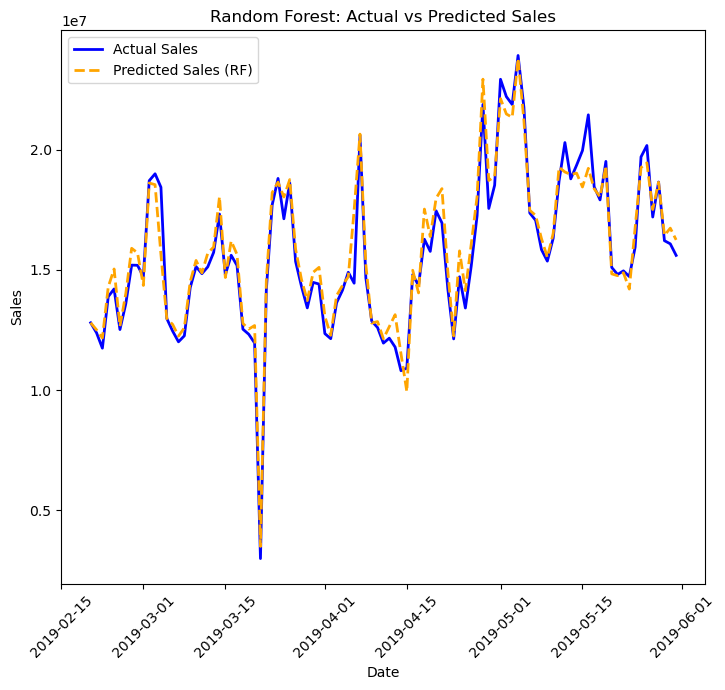

In [679]:
fset1 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day','sin_DayOfWeek','cos_DayOfWeek']
y_pred_rf1, rfmodel1 =modelRandomForest(X_train_scaled[fset1],y_train, X_test_scaled[fset1],y_test)

#MAE : 88497.553
#RMSE : 404353.632
#MAPE: 0.005
#MAE : 92986.359
#RMSE : 457231.255
#MAPE: 0.006
#MAE : 551685.509
#RMSE : 745985.887
#MAPE: 0.039

#### RM Model 2

MAE : 470790.501
RMSE : 658073.572
MAPE: 0.03


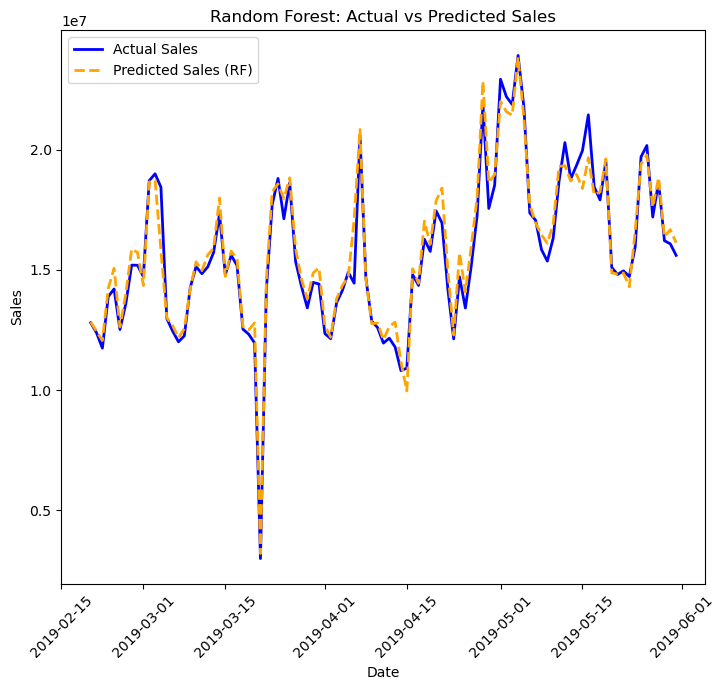

In [680]:
fset2 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek']
y_pred_rf2, rfmodel2 =modelRandomForest(X_train_scaled[fset2],y_train, X_test_scaled[fset2],y_test)


#### RF Model 3

MAE : 487970.706
RMSE : 748246.666
MAPE: 0.031


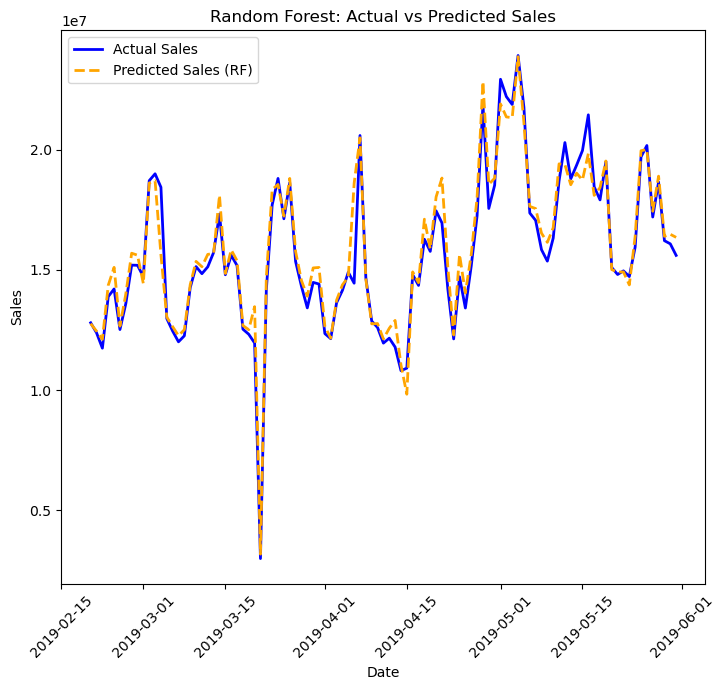

In [684]:
fset3 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month']
y_pred_rf3, rfmodel3 =modelRandomForest(X_train_scaled[fset3],y_train, X_test_scaled[fset3],y_test)


### Comparison of the three Random Forest models:

### Model Comparison

#### Model 1
- **Mean Absolute Error (MAE)**: 522,450.952
- **Root Mean Squared Error (RMSE)**: 729,712.720
- **Mean Absolute Percentage Error (MAPE)**: 0.034

#### Model 2
- **Mean Absolute Error (MAE)**: 470,790.501
- **Root Mean Squared Error (RMSE)**: 658,073.572
- **Mean Absolute Percentage Error (MAPE)**: 0.030

#### Model 3
- **Mean Absolute Error (MAE)**: 487,970.706
- **Root Mean Squared Error (RMSE)**: 748,246.666
- **Mean Absolute Percentage Error (MAPE)**: 0.031

### Conclusion
- **Model 2** is the best among the three, as it has the lowest MAE, RMSE, and MAPE, indicating better overall performance and more accurate predictions compared to the other two models.

In [700]:
#actualdf=X_test.copy()
#actualdf['Sales']= y_test
#actualdf.head()

In [701]:
#actualdf['Forecast_Sales']= y_pred_rf2
#actualdf.head()

In [703]:
# Save the DataFrame to a CSV file
#actualdf.reset_index().to_csv('forecast_rf2.csv', index=False)
#y_test.to_csv('actual_rf2.csv', index=False)

In [706]:
#pickle_out = open("Regressor_Model2.pkl", mode = "wb")
#pickle.dump(rfmodel2, pickle_out)
#pickle_out.close()

#### XGBoost

In [665]:
import xgboost as xgb

def modelXGBoost(Xtrain, ytrain, Xtest, ytest):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    
    xgb_model.fit(Xtrain, ytrain)
    
    y_pred_xgb = xgb_model.predict(Xtest)
    
    mae_val,rmse_val,mape_val=performanceMetrics(ytest, y_pred_xgb)
    print('MAE :', mae_val)
    print('RMSE :', rmse_val )
    print('MAPE:', mape_val)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 2)
    plt.plot(ytest.index, ytest, label='Actual Sales', color='blue', linewidth=2)
    plt.plot(ytest.index, y_pred_xgb, label='Predicted Sales (XGBoost)', color='green', linestyle='--', linewidth=2)
    plt.title('XGBoost: Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    return (y_pred_xgb,xgb_model)


In [637]:
#y_pred_xgb,xgb_model= modelXGBoost(X_train,y_train, X_test,y_test)
#MAE : 127287.742
#RMSE : 475606.455
#MAPE: 0.008

### XGBoost Model 1

MAE : 526301.102
RMSE : 682666.84
MAPE: 0.035


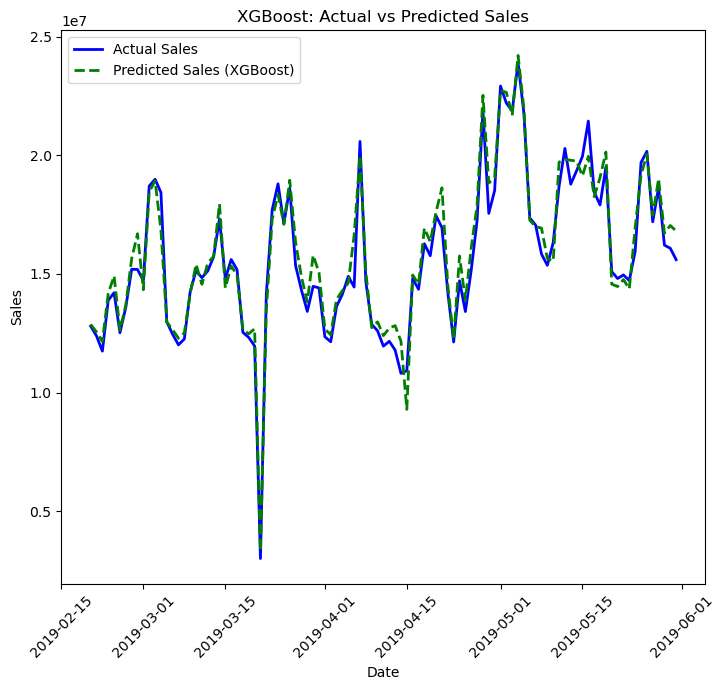

In [686]:
fset1 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day','sin_DayOfWeek','cos_DayOfWeek']

y_pred_xgb1, xgb_model1 = modelXGBoost(X_train_scaled[fset1],y_train, X_test_scaled[fset1],y_test)
#MAE : 477180.072
#RMSE : 667158.096
#MAPE: 0.031

#### XGBoost Model 2

MAE : 545669.302
RMSE : 750877.607
MAPE: 0.035


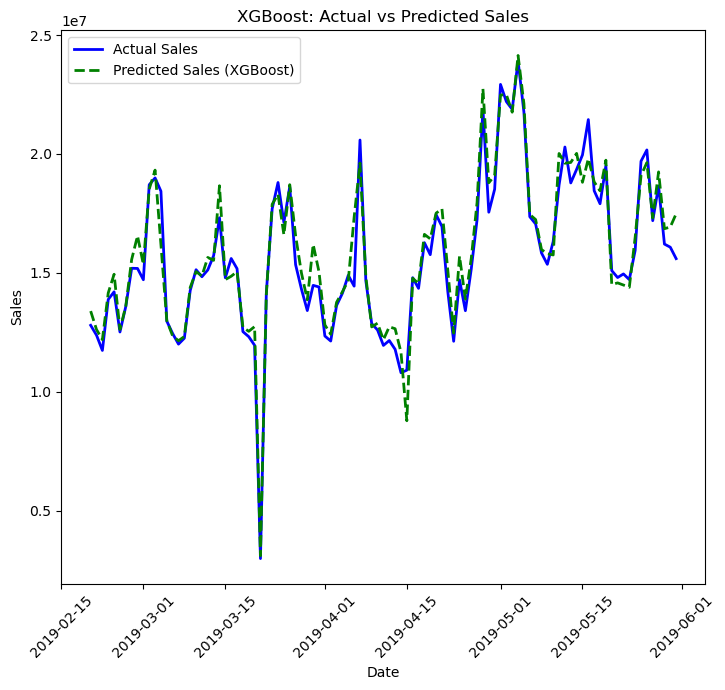

In [688]:
fset2 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day']

y_pred_xgb2, xgb_model2 = modelXGBoost(X_train_scaled[fset2],y_train, X_test_scaled[fset2],y_test)
#MAE : 477180.072
#RMSE : 667158.096
#MAPE: 0.031

#### XGBoost Model 3

MAE : 582677.546
RMSE : 857212.203
MAPE: 0.038


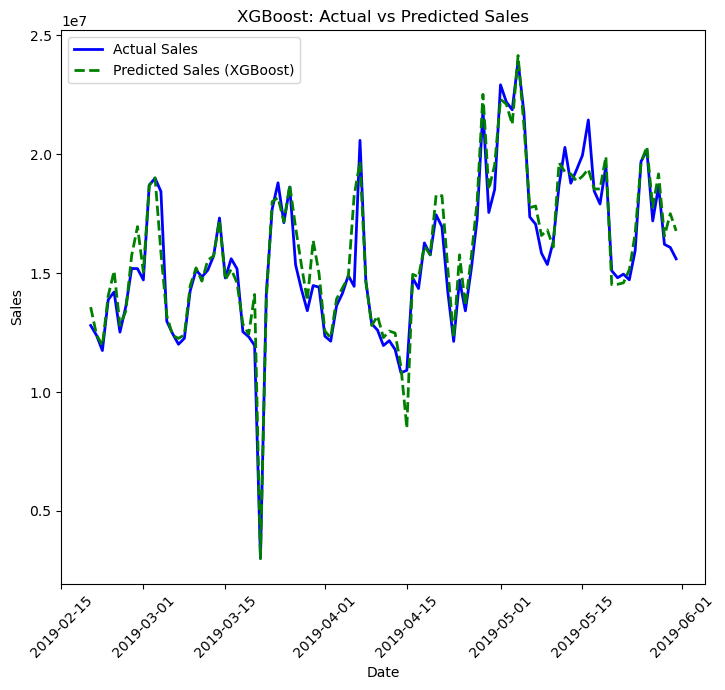

In [692]:
fset3 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month']
y_pred_xgb3, xgb_model3 = modelXGBoost(X_train_scaled[fset3],y_train, X_test_scaled[fset3],y_test)
MAE : 582677.546
RMSE : 857212.203
MAPE: 0.038

### XGBoost Model Performance Summary

Among the three XGBoost models, the first model is the best choice based on its lower error metrics:

### Model Comparison

#### Model 1
- **Mean Absolute Error (MAE)**: 526,301.102
- **Root Mean Squared Error (RMSE)**: 682,666.840
- **Mean Absolute Percentage Error (MAPE)**: 0.035

#### Model 2
- **Mean Absolute Error (MAE)**: 545,669.302
- **Root Mean Squared Error (RMSE)**: 750,877.607
- **Mean Absolute Percentage Error (MAPE)**: 0.035

#### Model 3
- **Mean Absolute Error (MAE)**: 582,677.546
- **Root Mean Squared Error (RMSE)**: 857,212.203
- **Mean Absolute Percentage Error (MAPE)**: 0.038

### Conclusion
**Model 1** outperforms the other two, with the lowest MAE and RMSE values, indicating more accurate predictions overall.

# Ensemble Method: Averaging Predictions
* Generate an ensemble prediction by averaging the predictions from the Random Forest and XGBoost models.

In [693]:
y_pred_ensemble = (y_pred_rf2 + y_pred_xgb1) / 2

MAE : 463117.813
RMSE : 631192.731
MAPE: 0.031


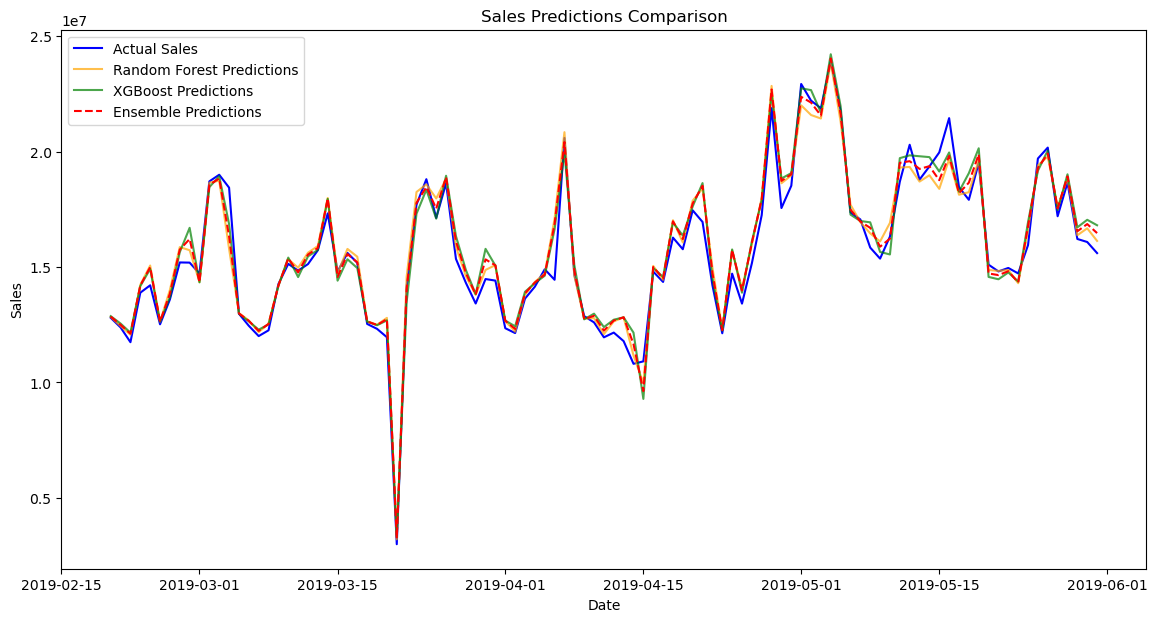

In [695]:
mae_val,rmse_val,mape_val=performanceMetrics(y_test, y_pred_ensemble)
print('MAE :', mae_val)
print('RMSE :', rmse_val )
print('MAPE:', mape_val)

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue')
plt.plot(y_test.index, y_pred_rf2, label='Random Forest Predictions', color='orange', alpha=0.7)
plt.plot(y_test.index, y_pred_xgb1, label='XGBoost Predictions', color='green', alpha=0.7)
plt.plot(y_test.index, y_pred_ensemble, label='Ensemble Predictions', color='red', linestyle='--')
plt.title('Sales Predictions Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Model Comparison: Random Forest (RF2), XGBoost (XGB1), and Ensemble Model

#### RF2 (Random Forest Model 2)
- **Mean Absolute Error (MAE)**: 470,790.501
- **Root Mean Squared Error (RMSE)**: 658,073.572
- **Mean Absolute Percentage Error (MAPE)**: 0.030

#### XGB1 (XGBoost Model 1)
- **Mean Absolute Error (MAE)**: 526,301.102
- **Root Mean Squared Error (RMSE)**: 682,666.840
- **Mean Absolute Percentage Error (MAPE)**: 0.035

#### Ensemble Model (RF2 + XGB1)
- **Mean Absolute Error (MAE)**: 463,117.813
- **Root Mean Squared Error (RMSE)**: 631,192.731
- **Mean Absolute Percentage Error (MAPE)**: 0.031

### Conclusion

- **Ensemble Model** performs better than XGBoost (XGB1) in terms of MAE and RMSE, but **RF2** still slightly outperforms the ensemble in all three metrics (MAE, RMSE, and MAPE).
- The **RF2** model appears to be the most consistent and accurate overall, with lower errors compared to both XGB1 and the ensemble model.

#### Random Forest and XGBoost Feature Importance

In [714]:
 X_train[fset2].columns

Index(['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month',
       'cos_Month', 'sin_DayOfWeek', 'cos_DayOfWeek'],
      dtype='object')

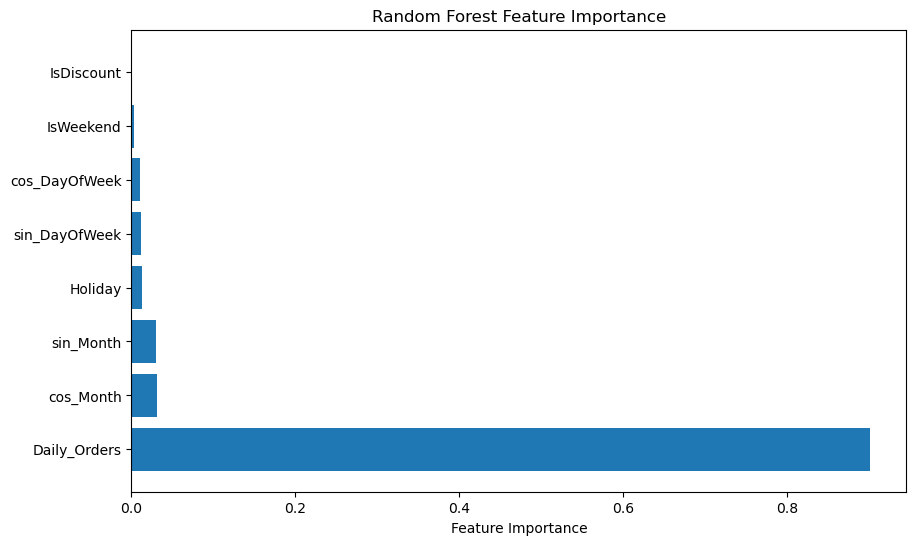

In [711]:
fset2 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek']
importances_rf = rfmodel2.feature_importances_
feature_names = X_train[fset2].columns

feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

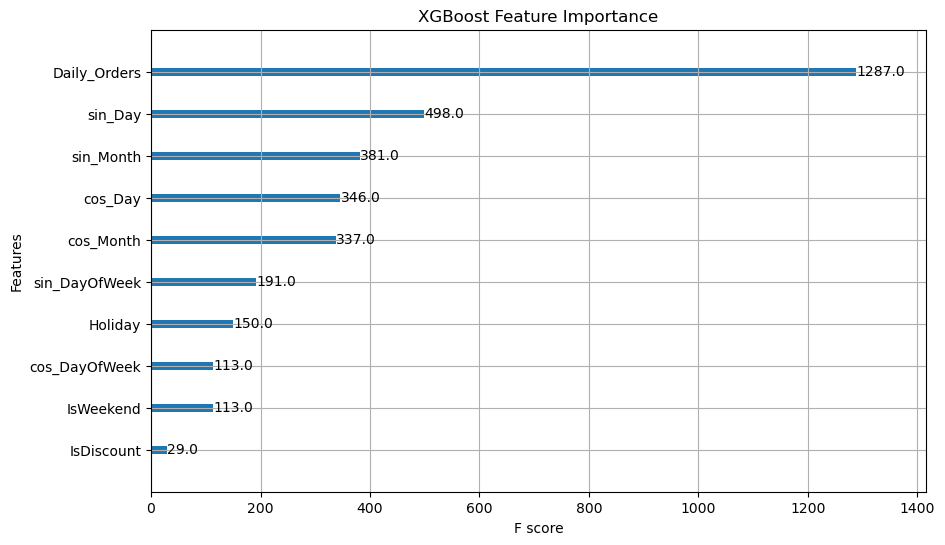

In [712]:
#fset1 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day','sin_DayOfWeek','cos_DayOfWeek']

xgb.plot_importance(xgb_model1, importance_type='weight')
plt.title('XGBoost Feature Importance')
plt.show()

#### XGBoost Feature Engineering Implementation

In [720]:
X1_train_scaled.head()

IsDiscount  Day  IsWeekend  Daily_Orders  Month  Year  DayOfWeek  \
Date                                                                           
2018-01-12           1   12          0     -1.075444      1  2018          4   
2018-01-13           1   13          1      0.645730      1  2018          5   
2018-01-14           1   14          1      0.471540      1  2018          6   
2018-01-15           1   15          0      0.041190      1  2018          0   
2018-01-16           1   16          0      0.289609      1  2018          1   

            Log_Sales   sin_Day   cos_Day  sin_Month  cos_Month  \
Date                                                              
2018-01-12        NaN  0.651372 -0.758758        0.5   0.866025   
2018-01-13        NaN  0.485302 -0.874347        0.5   0.866025   
2018-01-14        NaN  0.299363 -0.954139        0.5   0.866025   
2018-01-15        NaN  0.101168 -0.994869        0.5   0.866025   
2018-01-16        NaN -0.101168 -0.994869        0.5   0.866025   

            sin_DayOfWeek  cos_DayOfWeek  
Date                                      
2018-01-12      -0.433884      -0.900969  
2018-01-13      -0.974928      -0.222521  
2018-01-14      -0.781831       0.623490  
2018-01-15       0.000000       1.000000  
2018-01-16       0.781831       0.623490

In [722]:
features = ['Holiday','IsDiscount', 'Day', 'IsWeekend', 'Daily_Orders','Month','Year','DayOfWeek']
target = 'Sales'

X1 = salesdf[features]
y1 = salesdf[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=False)

X1_train_scaled, X1_test_scaled, R1scaler=transform_data1(X1_train,X1_test)

X1_train_scaled = pd.DataFrame(X1_train_scaled, columns=X1_train.columns, index=X1_train.index)
X1_test_scaled = pd.DataFrame(X1_test_scaled, columns=X1_test.columns, index=X1_test.index)

print(f'Training set shape: {X1_train.shape}, Target shape: {y1_train.shape}')
print(f'Test set shape: {X1_test.shape}, Target shape: {y1_test.shape}')


Training set shape: (404, 15), Target shape: (404,)
Test set shape: (101, 15), Target shape: (101,)


MAE : 1050778.99
RMSE : 1394415.639
MAPE: 0.068


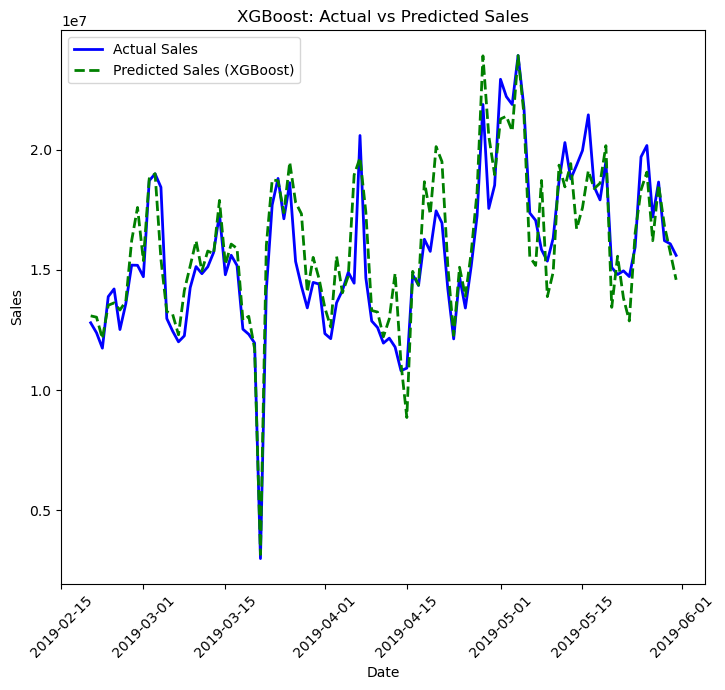

In [723]:
fxgbset4 = ['IsDiscount', 'sin_Day','cos_Day', 'IsWeekend', 'Daily_Orders']
y_pred_xgb4,xgb_model4=modelXGBoost(X1_train_scaled[fxgbset4],y1_train, X1_test_scaled[fxgbset4],y1_test)

#MAE : 127287.742
#RMSE : 475606.455
#MAPE: 0.008
#MAE : 80665.716
#RMSE : 335091.748
#MAPE: 0.005

MAE : 1002684.667
RMSE : 1292501.564
MAPE: 0.065


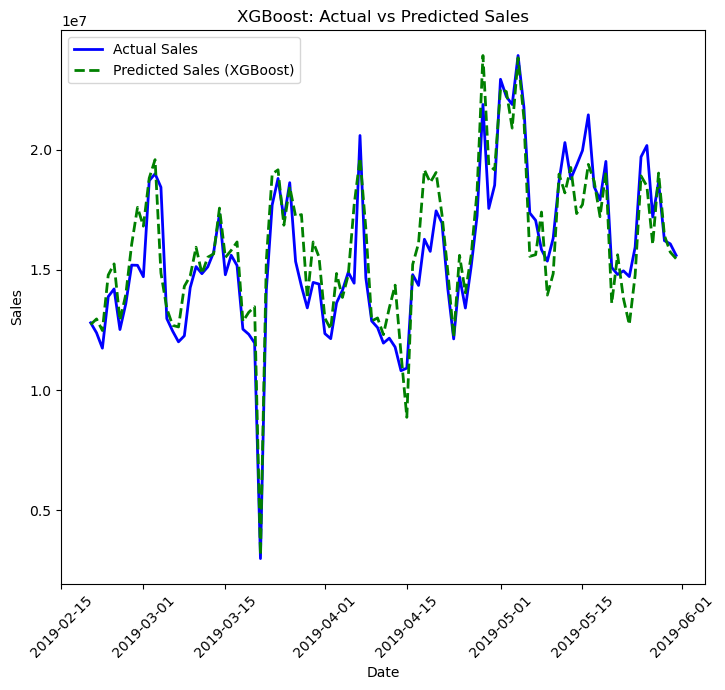

In [725]:
fxgbset5 = ['Holiday', 'sin_Day','cos_Day', 'IsWeekend', 'Daily_Orders']
y_pred_xgb5,xgb_model5=modelXGBoost(X1_train_scaled[fxgbset5],y1_train, X1_test_scaled[fxgbset5],y1_test)

#MAE : 127287.742
#RMSE : 475606.455
#MAPE: 0.008
#MAE : 80665.716
#RMSE : 335091.748
#MAPE: 0.005

In [726]:
X1_train_scaled.columns

Index(['Holiday', 'IsDiscount', 'Day', 'IsWeekend', 'Daily_Orders', 'Month',
       'Year', 'DayOfWeek', 'Log_Sales', 'sin_Day', 'cos_Day', 'sin_Month',
       'cos_Month', 'sin_DayOfWeek', 'cos_DayOfWeek'],
      dtype='object')

MAE : 491428.653
RMSE : 661158.588
MAPE: 0.032


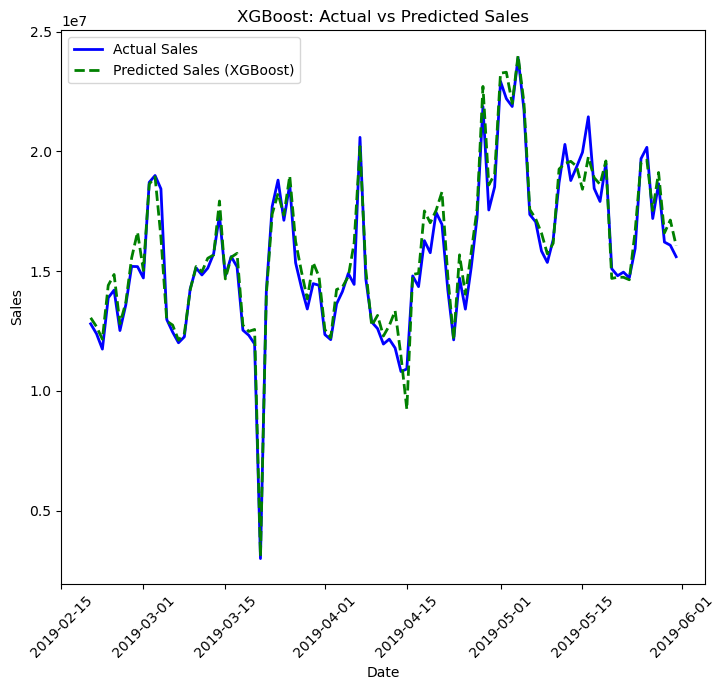

In [731]:
fxgbset6 = ['Holiday', 'sin_Day','cos_Day', 'IsWeekend', 'Daily_Orders','sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek']
y_pred_xgb6,xgb_model6=modelXGBoost(X1_train_scaled[fxgbset6],y1_train, X1_test_scaled[fxgbset6],y1_test)


#### Random Forest Feature Engineering Implementation

features = ['Total_Orders', 'Month', 'Number_of_Orders']

target = 'Sales'

X2 = salesdf[features]
y2 = salesdf[target]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, shuffle=False)

print(f'Training set shape: {X2_train.shape}, Target shape: {y2_train.shape}')
print(f'Test set shape: {X2_test.shape}, Target shape: {y2_test.shape}')


y2_pred_rf, rf2model =modelRandomForest(X2_train,y2_train, X2_test,y2_test)

#MAE : 88497.553
#RMSE : 404353.632
#MAPE: 0.005

MAE : 525950.825
RMSE : 798282.139
MAPE: 0.035


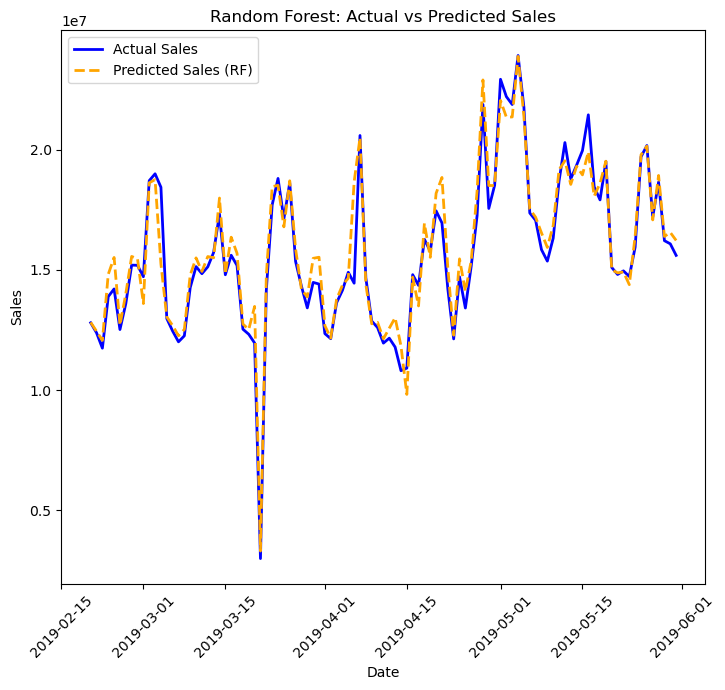

In [732]:
#fset1 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day','sin_DayOfWeek','cos_DayOfWeek']
frfset4 = ['Holiday', 'Daily_Orders', 'sin_Month','cos_Month']
y_pred_rf4, rfmodel4 =modelRandomForest(X1_train_scaled[frfset4],y1_train, X1_test_scaled[frfset4],y1_test)

MAE : 472531.052
RMSE : 664777.272
MAPE: 0.03


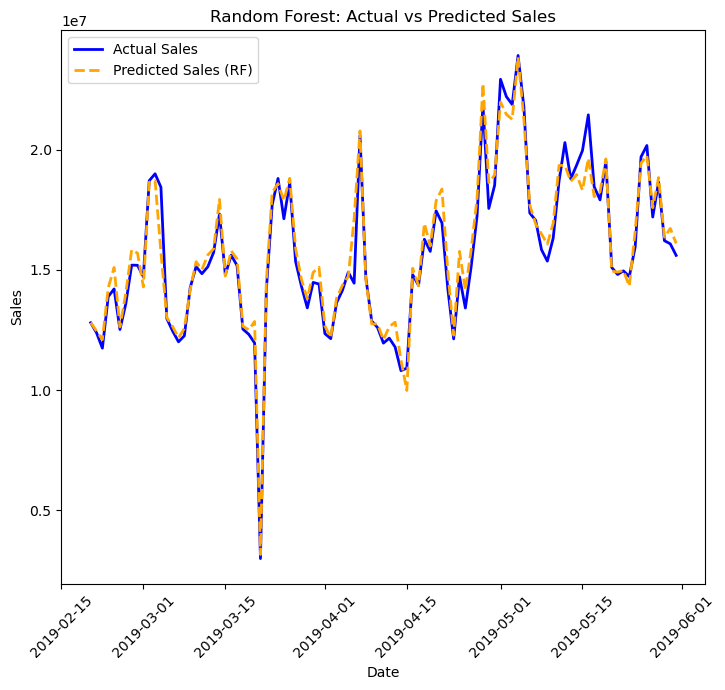

In [733]:
#fset1 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day','sin_DayOfWeek','cos_DayOfWeek']
frfset5 = ['Holiday', 'Daily_Orders', 'sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek']
y_pred_rf5, rfmodel5 =modelRandomForest(X1_train_scaled[frfset5],y1_train, X1_test_scaled[frfset5],y1_test)

MAE : 476351.921
RMSE : 662866.603
MAPE: 0.031


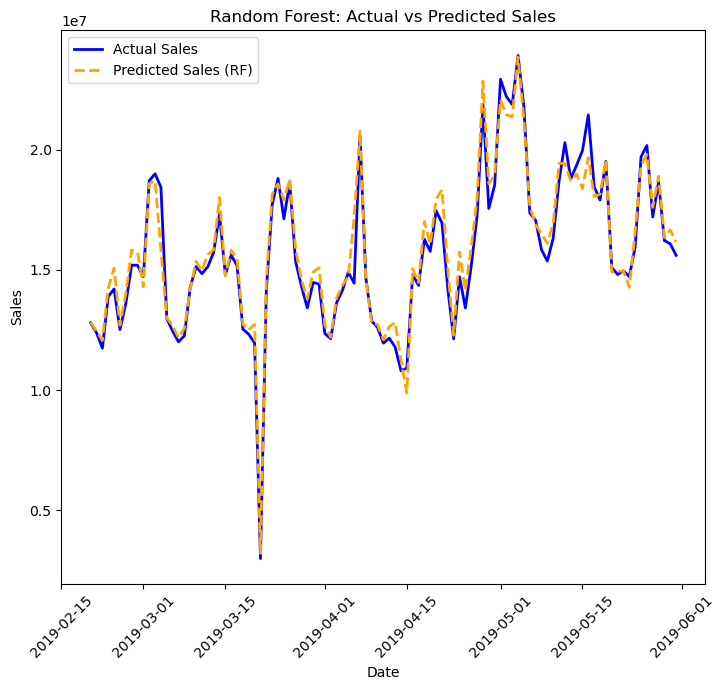

In [734]:
#fset1 = ['Holiday', 'IsDiscount', 'IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month', 'sin_Day','cos_Day','sin_DayOfWeek','cos_DayOfWeek']
frfset6 = ['Holiday','IsWeekend', 'Daily_Orders', 'sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek']
y_pred_rf6, rfmodel6 =modelRandomForest(X1_train_scaled[frfset6],y1_train, X1_test_scaled[frfset6],y1_test)

In [735]:
def dataProcessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['IsWeekend'] = df['Date'].dt.weekday >= 5  # True if Saturday or Sunday
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df["IsDiscount"] = np.where(df["Discount"] == "Yes", 1, 0)
    # Considering the data defination as #Order: The number of orders received by the store on the specified day.
    #df['#Order'] = df.groupby(['Store_id', 'Date'])['Store_id'].transform('count')

    return df



In [952]:
testdf= pd.read_csv("TEST_FINAL.csv")
testdf.head(2)

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No

In [953]:
testdf.reset_index(inplace = True)
valdf=dataProcessing(testdf.copy())
valdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          22265 non-null  int64         
 1   ID             22265 non-null  object        
 2   Store_id       22265 non-null  int64         
 3   Store_Type     22265 non-null  object        
 4   Location_Type  22265 non-null  object        
 5   Region_Code    22265 non-null  object        
 6   Date           22265 non-null  datetime64[ns]
 7   Holiday        22265 non-null  int64         
 8   Discount       22265 non-null  object        
 9   Year           22265 non-null  int32         
 10  Month          22265 non-null  int32         
 11  Day            22265 non-null  int32         
 12  IsWeekend      22265 non-null  bool          
 13  DayOfWeek      22265 non-null  int32         
 14  IsDiscount     22265 non-null  int64         
dtypes: bool(1), datetim

In [954]:
valdf.head(2)

index        ID  Store_id Store_Type Location_Type Region_Code       Date  \
0      0  T1188341       171         S4            L2          R3 2019-06-01   
1      1  T1188342       172         S1            L1          R1 2019-06-01   

   Holiday Discount  Year  Month  Day  IsWeekend  DayOfWeek  IsDiscount  
0        0       No  2019      6    1       True          5           0  
1        0       No  2019      6    1       True          5           0

In [955]:
from sklearn.preprocessing import LabelEncoder

In [956]:
rftraindf=traindf.copy().reset_index()

In [957]:
rftraindf.Date.duplicated().sum()

187824

In [958]:
rftraindf['Store_Type'].unique()

array(['S1', 'S3', 'S2', 'S4'], dtype=object)

features = ['Store_Type', 'Region_Code', 'Location_Type', 'Holiday', 'IsDiscount']
le = LabelEncoder()

encoded_columns=[]
for col in features:
    if rftraindf[col].dtype == 'object':
        rftraindf[f'{col}_encoded'] = le.fit_transform(rftraindf[col])
        encoded_columns.append(f'{col}_encoded')
    else:
        # For non-object columns, just add the original column
        encoded_columns.append(col)

# 3. Prepare the target variable (Sales)
rfX_train = rftraindf[encoded_columns]  # Use encoded columns for training
rfy_train = rftraindf['Sales']


# 4. Train a RandomForestRegressor (or any other model)
rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfmodel.fit(rfX_train, rfy_train)

for col in features:
    if valdf[col].dtype == 'object':
        # Only fit on training data once and use the same encoder to transform test data
        if col not in le.classes_:  # This checks if the column was already encoded
            le.fit(rftraindf[col])  # Fit on the training data only
        valdf[f'{col}_encoded'] = le.transform(valdf[col])  # Transform the test data

# Select the encoded columns for prediction
valdf_encoded = valdf[encoded_columns]  # Use the same columns as in training

# Make predictions on the test set
valdf['RF_Predicted_Sales'] = rfmodel.predict(valdf_encoded)

In [ ]:
valfeatures = ['Holiday','IsDiscount', 'Day', 'IsWeekend', 'Daily_Orders','Month','Year','DayOfWeek']
target = 'Sales'

tranform_feature_set = ['Holiday', 'IsDiscount', 'IsWeekend', '#Orders', 'sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek']


In [959]:
rftraindf.head(2)

index       Date        ID  Store_id Store_Type Location_Type Region_Code  \
0      0 2018-01-01  T1000001         1         S1            L3          R1   
1      1 2018-01-01  T1000249        64         S3            L1          R2   

   Holiday Discount  #Order     Sales  month  day_of_week  day  is_weekend  \
0        1      Yes       9   7011.84      1            0    1           0   
1        1      Yes      52  42293.94      1            0    1           0   

   year  IsDiscount Region_Location  MoM_Growth  YoY_Growth  
0  2018           1         R1 - L3         NaN         NaN  
1  2018           1         R2 - L1         NaN         NaN

In [960]:
def transform_data2(dTr,dTest=None):
    # Log Transformation for Sales: X
    #dTr['Log_Sales'] = np.log1p(dTr['Sales'])
    #if dTest is not None:
    #    dTest['Log_Sales'] = np.log1p(dTest['Sales'])

    # Standardization for Daily_Orders
    #scaler = StandardScaler()
    #dTr[['#Order']] = scaler.fit_transform(dTr[['#Order']])
    #if dTest is not None:
    #    dTest[['#Order']] = scaler.transform(dTest[['#Order']])

    
    # Cyclical Transformation for Day, Month, and DayOfWeek
    # dTr
    dTr['sin_Day'] = np.sin(2 * np.pi * dTr['Day'] / 31)  # Day (1 to 31)
    dTr['cos_Day'] = np.cos(2 * np.pi * dTr['Day'] / 31)

    dTr['sin_Month'] = np.sin(2 * np.pi * dTr['Month'] / 12)  # Month (1 to 12)
    dTr['cos_Month'] = np.cos(2 * np.pi * dTr['Month'] / 12)

    dTr['sin_DayOfWeek'] = np.sin(2 * np.pi * dTr['DayOfWeek'] / 7)  # DayOfWeek (0 to 6)
    dTr['cos_DayOfWeek'] = np.cos(2 * np.pi * dTr['DayOfWeek'] / 7)

    #dTest
    if dTest is not None:
        dTest['sin_Day'] = np.sin(2 * np.pi * dTest['Day'] / 31)  # Day (1 to 31)
        dTest['cos_Day'] = np.cos(2 * np.pi * dTest['Day'] / 31)
        dTest['sin_Month'] = np.sin(2 * np.pi * dTest['Month'] / 12)  # Month (1 to 12)
        dTest['cos_Month'] = np.cos(2 * np.pi * dTest['Month'] / 12)
        dTest['sin_DayOfWeek'] = np.sin(2 * np.pi * dTest['DayOfWeek'] / 7)  # DayOfWeek (0 to 6)
        dTest['cos_DayOfWeek'] = np.cos(2 * np.pi * dTest['DayOfWeek'] / 7)

    if dTest is not None:
        return dTr, dTest
    else:
        return dTr

In [961]:
#encode_features = ['Store_Type', 'Region_Code', 'Location_Type']
encode_features=['Store_Type', 'Region_Code', 'Location_Type', 'Holiday', 'IsDiscount']
le = LabelEncoder()

encoded_columns=[]
for col in encode_features:
    if rftraindf[col].dtype == 'object':
        rftraindf[f'{col}_encoded'] = le.fit_transform(rftraindf[col])
        encoded_columns.append(f'{col}_encoded')
    else:
        # For non-object columns, just add the original column
        encoded_columns.append(col)



#### Preparing the Validation Set.

In [962]:
valdf.head(2)

index        ID  Store_id Store_Type Location_Type Region_Code       Date  \
0      0  T1188341       171         S4            L2          R3 2019-06-01   
1      1  T1188342       172         S1            L1          R1 2019-06-01   

   Holiday Discount  Year  Month  Day  IsWeekend  DayOfWeek  IsDiscount  
0        0       No  2019      6    1       True          5           0  
1        0       No  2019      6    1       True          5           0

In [963]:
for col in encode_features:
    if valdf[col].dtype == 'object':
        if col not in le.classes_:
            le.fit(rftraindf[col])
        valdf[f'{col}_encoded'] = le.transform(valdf[col])

# Select the encoded columns for prediction
valdf_encoded = valdf[encoded_columns]
valdf_encoded.columns

Index(['Store_Type_encoded', 'Region_Code_encoded', 'Location_Type_encoded',
       'Holiday', 'IsDiscount'],
      dtype='object')

In [964]:
encoded_columns

['Store_Type_encoded',
 'Region_Code_encoded',
 'Location_Type_encoded',
 'Holiday',
 'IsDiscount']

In [965]:
rftraindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  188340 non-null  int64         
 1   Date                   188340 non-null  datetime64[ns]
 2   ID                     188340 non-null  object        
 3   Store_id               188340 non-null  int64         
 4   Store_Type             188340 non-null  object        
 5   Location_Type          188340 non-null  object        
 6   Region_Code            188340 non-null  object        
 7   Holiday                188340 non-null  int64         
 8   Discount               188340 non-null  object        
 9   #Order                 188340 non-null  int64         
 10  Sales                  188340 non-null  float64       
 11  month                  188340 non-null  int32         
 12  day_of_week            188340 non-null  int3

In [966]:
rftraindf.rename(columns={'day': 'Day'}, inplace=True)
rftraindf.rename(columns={'month': 'Month'}, inplace=True)
rftraindf.rename(columns={'day_of_week': 'DayOfWeek'}, inplace=True)
rftraindf.rename(columns={'year': 'Year'}, inplace=True)
rftraindf.rename(columns={'is_weekend': 'IsWeekend'}, inplace=True)
rftraindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  188340 non-null  int64         
 1   Date                   188340 non-null  datetime64[ns]
 2   ID                     188340 non-null  object        
 3   Store_id               188340 non-null  int64         
 4   Store_Type             188340 non-null  object        
 5   Location_Type          188340 non-null  object        
 6   Region_Code            188340 non-null  object        
 7   Holiday                188340 non-null  int64         
 8   Discount               188340 non-null  object        
 9   #Order                 188340 non-null  int64         
 10  Sales                  188340 non-null  float64       
 11  Month                  188340 non-null  int32         
 12  DayOfWeek              188340 non-null  int3

In [939]:
tranform_feature_set = ['IsWeekend', 'Month','Day','DayOfWeek']+encoded_columns
tranform_feature_set

['IsWeekend',
 'Month',
 'Day',
 'DayOfWeek',
 'Store_Type_encoded',
 'Region_Code_encoded',
 'Location_Type_encoded',
 'Holiday',
 'IsDiscount']

In [967]:
starget="Sales"
starget

'Sales'

In [968]:
X2 = rftraindf[tranform_feature_set]
y2 = rftraindf[starget]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, shuffle=False)

X2_train_scaled, X2_test_scaled = transform_data2(X2_train.copy(),X2_test.copy())

X2_train_scaled = pd.DataFrame(X2_train_scaled, columns=X2_train.columns, index=X2_train.index)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns=X2_test.columns, index=X2_test.index)

print(f'Training set shape: {X2_train.shape}, Target shape: {y2_train.shape}')
print(f'Test set shape: {X2_test.shape}, Target shape: {y2_test.shape}')

Training set shape: (150672, 9), Target shape: (150672,)
Test set shape: (37668, 9), Target shape: (37668,)


In [801]:
#region_fset1 = ['Holiday', 'IsDiscount', 'IsWeekend','sin_Day','cos_Day', 'sin_Month','cos_Month','sin_DayOfWeek','cos_DayOfWeek','Store_Type_encoded','Region_Code_encoded','Location_Type_encoded']
#y_pred_region_rf1, rfregionmodel1 =modelRandomForest(X2_train_scaled[region_fset1],y2_train, X2_test_scaled[region_fset1],y2_test)


MAE : 8977.419
RMSE : 13263.803
MAPE: 2.3846500629207364e+16


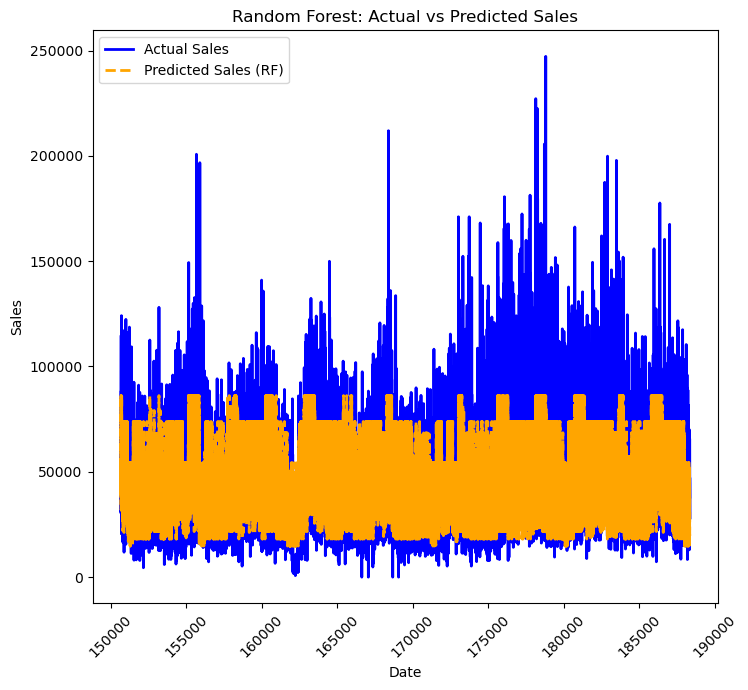

In [970]:
region_fset2 = ['Holiday', 'IsDiscount', 'IsWeekend','Store_Type_encoded','Region_Code_encoded','Location_Type_encoded']
y_pred_region_rf2, rfregionmodel2 =modelRandomForest(X2_train_scaled[region_fset2],y2_train, X2_test_scaled[region_fset2],y2_test)


In [971]:
X2_train_scaled[region_fset2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 150672 entries, 0 to 150671
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Holiday                150672 non-null  int64
 1   IsDiscount             150672 non-null  int64
 2   IsWeekend              150672 non-null  int64
 3   Store_Type_encoded     150672 non-null  int64
 4   Region_Code_encoded    150672 non-null  int64
 5   Location_Type_encoded  150672 non-null  int64
dtypes: int64(6)
memory usage: 8.0 MB


In [972]:
valdf[region_fset2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Holiday                22265 non-null  int64
 1   IsDiscount             22265 non-null  int64
 2   IsWeekend              22265 non-null  bool 
 3   Store_Type_encoded     22265 non-null  int64
 4   Region_Code_encoded    22265 non-null  int64
 5   Location_Type_encoded  22265 non-null  int64
dtypes: bool(1), int64(5)
memory usage: 891.6 KB


In [973]:
valdf.head(2)

index        ID  Store_id Store_Type Location_Type Region_Code       Date  \
0      0  T1188341       171         S4            L2          R3 2019-06-01   
1      1  T1188342       172         S1            L1          R1 2019-06-01   

   Holiday Discount  Year  Month  Day  IsWeekend  DayOfWeek  IsDiscount  \
0        0       No  2019      6    1       True          5           0   
1        0       No  2019      6    1       True          5           0   

   Store_Type_encoded  Region_Code_encoded  Location_Type_encoded  
0                   3                    2                      1  
1                   0                    0                      0

In [974]:
valdf =transform_data2(valdf.copy())
valdf.head(2)

index        ID  Store_id Store_Type Location_Type Region_Code       Date  \
0      0  T1188341       171         S4            L2          R3 2019-06-01   
1      1  T1188342       172         S1            L1          R1 2019-06-01   

   Holiday Discount  Year  ...  IsDiscount  Store_Type_encoded  \
0        0       No  2019  ...           0                   3   
1        0       No  2019  ...           0                   0   

   Region_Code_encoded  Location_Type_encoded   sin_Day  cos_Day  \
0                    2                      1  0.201299  0.97953   
1                    0                      0  0.201299  0.97953   

      sin_Month  cos_Month  sin_DayOfWeek  cos_DayOfWeek  
0  1.224647e-16       -1.0      -0.974928      -0.222521  
1  1.224647e-16       -1.0      -0.974928      -0.222521  

[2 rows x 24 columns]

In [975]:
# Make predictions on the test set
valdf['RF_Predicted_Sales'] = rfregionmodel2.predict(valdf[region_fset2])

In [976]:
valdf.head(2)

index        ID  Store_id Store_Type Location_Type Region_Code       Date  \
0      0  T1188341       171         S4            L2          R3 2019-06-01   
1      1  T1188342       172         S1            L1          R1 2019-06-01   

   Holiday Discount  Year  ...  Store_Type_encoded  Region_Code_encoded  \
0        0       No  2019  ...                   3                    2   
1        0       No  2019  ...                   0                    0   

   Location_Type_encoded   sin_Day  cos_Day     sin_Month  cos_Month  \
0                      1  0.201299  0.97953  1.224647e-16       -1.0   
1                      0  0.201299  0.97953  1.224647e-16       -1.0   

   sin_DayOfWeek  cos_DayOfWeek  RF_Predicted_Sales  
0      -0.974928      -0.222521        58430.397553  
1      -0.974928      -0.222521        37408.950050  

[2 rows x 25 columns]

In [977]:
average_order

627.28

In [978]:
valdf['Daily_Orders'] = (valdf['RF_Predicted_Sales'] / average_order).round().astype(int)

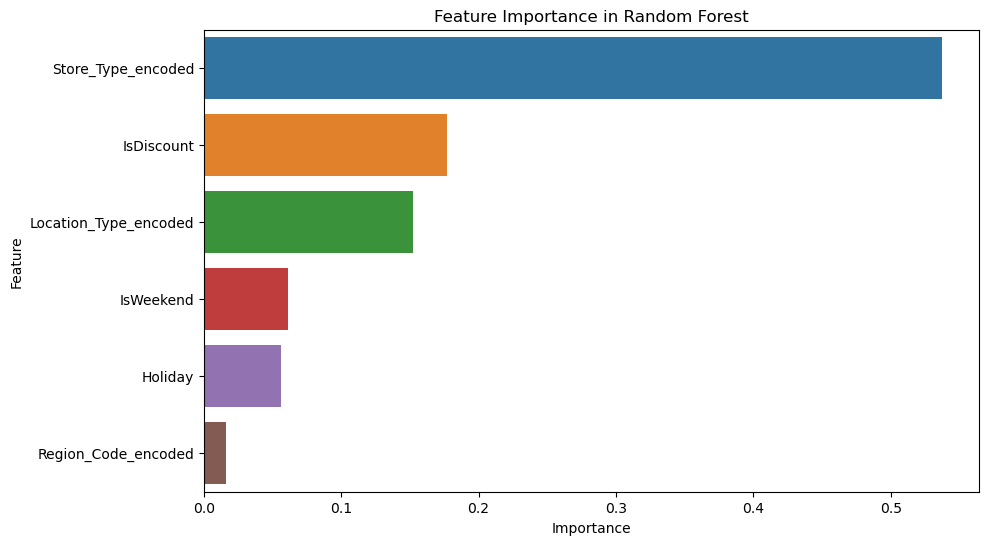

In [979]:
importances = rfregionmodel2.feature_importances_

# Create a DataFrame for easier visualization
feature_df = pd.DataFrame({'Feature': region_fset2, 'Importance': importances})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


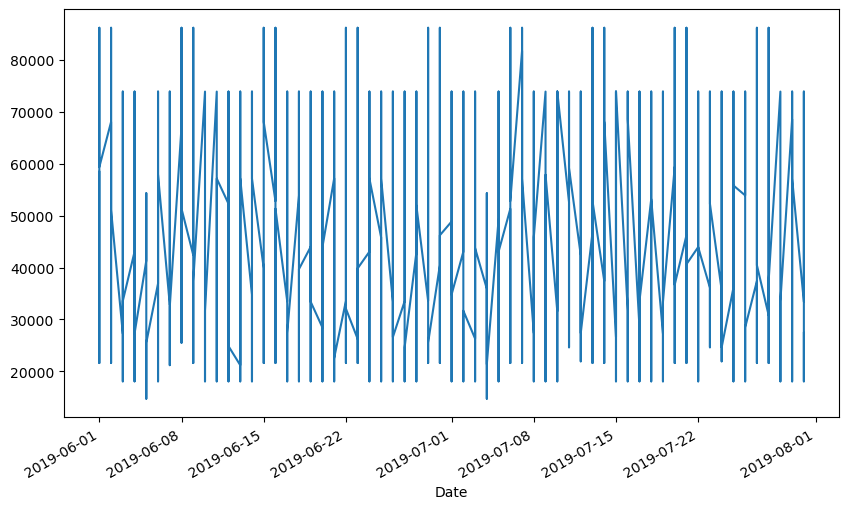

In [997]:
valdf.set_index('Date', inplace=True)
valdf.RF_Predicted_Sales.plot()
plt.show()

In [998]:
valdf.head(2)

index        ID  Store_id Store_Type Location_Type Region_Code  \
Date                                                                         
2019-06-01      0  T1188341       171         S4            L2          R3   
2019-06-01      1  T1188342       172         S1            L1          R1   

            Holiday Discount  Year  Month  ...  Region_Code_encoded  \
Date                                       ...                        
2019-06-01        0       No  2019      6  ...                    2   
2019-06-01        0       No  2019      6  ...                    0   

            Location_Type_encoded   sin_Day  cos_Day     sin_Month  cos_Month  \
Date                                                                            
2019-06-01                      1  0.201299  0.97953  1.224647e-16       -1.0   
2019-06-01                      0  0.201299  0.97953  1.224647e-16       -1.0   

            sin_DayOfWeek  cos_DayOfWeek  RF_Predicted_Sales  Daily_Orders  
Date                                                                        
2019-06-01      -0.974928      -0.222521        58430.397553            93  
2019-06-01      -0.974928      -0.222521        37408.950050            60  

[2 rows x 25 columns]

In [1063]:
def aggData(df):
    sdf = df.groupby('Date').agg(
    Day=('Day', 'first'),
    Month=('Month', 'first'),
    Year=('Year', 'first'),
    DayOfWeek=('DayOfWeek', 'first'),
    IsWeekend=('IsWeekend', 'first'),
    Holiday =('Holiday','max'),
    IsDiscount=('IsDiscount', 'max'),
    #Sales=('RF_Predicted_Sales', 'sum'),
    Daily_Orders=('Daily_Orders','sum'),
    ).reset_index().copy()
    
    sdf['Date'] = pd.to_datetime(sdf['Date'])
    sdf.set_index('Date', inplace=True)
    return sdf

In [1064]:
val_salesdf = aggData(valdf)
val_salesdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-06-01 to 2019-07-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Day           61 non-null     int32
 1   Month         61 non-null     int32
 2   Year          61 non-null     int32
 3   DayOfWeek     61 non-null     int32
 4   IsWeekend     61 non-null     bool 
 5   Holiday       61 non-null     int64
 6   IsDiscount    61 non-null     int64
 7   Daily_Orders  61 non-null     int64
dtypes: bool(1), int32(4), int64(3)
memory usage: 2.9 KB


In [1065]:
val_salesdf.head(2)

Day  Month  Year  DayOfWeek  IsWeekend  Holiday  IsDiscount  \
Date                                                                      
2019-06-01    1      6  2019          5       True        0           1   
2019-06-02    2      6  2019          6       True        0           1   

            Daily_Orders  
Date                      
2019-06-01         25416  
2019-06-02         25473

In [1029]:
val_salesdf.shape

(61, 9)

In [1030]:
val_salesdf.index.min()

Timestamp('2019-06-01 00:00:00')

In [1031]:
val_salesdf.index.max()

Timestamp('2019-07-31 00:00:00')

In [1032]:
salesdf.index.max()

Timestamp('2019-05-31 00:00:00')

In [1066]:
salesdf.head(2)

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-12  14737770.0        0           1         20097   12      1  2018   
2018-01-13  20857848.0        0           1         27656   13      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders      Sales_MA   z_score  \
Date                                                                         
2018-01-12          4          0             23495  1.723955e+07 -0.268874   
2018-01-13          5          1             33251  1.769891e+07  1.604220   

            z_score1  Sales_Lag1  
Date                              
2018-01-12 -0.275429  16565787.0  
2018-01-13  1.636410  14737770.0

train_size = int(len(salesdf) * 0.8)
train, test = salesdf.iloc[:train_size], salesdf.iloc[train_size:]

salesdf = salesdf.asfreq('D')
train= train.asfreq('D')

In [1034]:
salesdf.shape

(505, 14)

In [1052]:
datadf_val=salesdf.copy()

In [1068]:
datadf_val,val_salesdf , vscaler= transform_data1(datadf_val,val_salesdf,True)
val_salesdf.shape

'Sales' column does not exist in the dTest dataframe.


(61, 14)

In [1016]:
#datadf_val=salesdf.copy()
#datadf_val, val_salesdf , vScaler= transform_data1(datadf_val,val_salesdf,True)
#val_salesdf.shape

In [1069]:
datadf_val.shape

(505, 21)

In [1070]:
datadf_val= datadf_val.asfreq('D')
datadf_val.head(2)

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                          
2018-01-12  14737770.0        0           1     -1.107814   12      1  2018   
2018-01-13  20857848.0        0           1      0.624739   13      1  2018   

            DayOfWeek  IsWeekend  Estimated_Orders  ...   z_score  z_score1  \
Date                                                ...                       
2018-01-12          4          0             23495  ... -0.268874 -0.275429   
2018-01-13          5          1             33251  ...  1.604220  1.636410   

            Sales_Lag1  Log_Sales   sin_Day   cos_Day  sin_Month  cos_Month  \
Date                                                                          
2018-01-12  16565787.0  16.505924  0.651372 -0.758758        0.5   0.866025   
2018-01-13  14737770.0  16.853241  0.485302 -0.874347        0.5   0.866025   

            sin_DayOfWeek  cos_DayOfWeek  
Date                                      
2018-01-12      -0.433884      -0.900969  
2018-01-13      -0.974928      -0.222521  

[2 rows x 21 columns]

In [1071]:
val_salesdf= val_salesdf.asfreq('D')
val_salesdf.head(2)

Day  Month  Year  DayOfWeek  IsWeekend  Holiday  IsDiscount  \
Date                                                                      
2019-06-01    1      6  2019          5       True        0           1   
2019-06-02    2      6  2019          6       True        0           1   

            Daily_Orders   sin_Day   cos_Day     sin_Month  cos_Month  \
Date                                                                    
2019-06-01      0.111322  0.201299  0.979530  1.224647e-16       -1.0   
2019-06-02      0.124387  0.394356  0.918958  1.224647e-16       -1.0   

            sin_DayOfWeek  cos_DayOfWeek  
Date                                      
2019-06-01      -0.974928      -0.222521  
2019-06-02      -0.781831       0.623490

In [1075]:
datadf_val[['Holiday', 'IsDiscount', 'IsWeekend','sin_Month','cos_Month']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2018-01-12 to 2019-05-31
Freq: D
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Holiday     505 non-null    int64  
 1   IsDiscount  505 non-null    int64  
 2   IsWeekend   505 non-null    int64  
 3   sin_Month   505 non-null    float64
 4   cos_Month   505 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 23.7 KB


In [1076]:
val_salesdf[['Holiday', 'IsDiscount', 'IsWeekend','sin_Month','cos_Month']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-06-01 to 2019-07-31
Freq: D
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Holiday     61 non-null     int64  
 1   IsDiscount  61 non-null     int64  
 2   IsWeekend   61 non-null     bool   
 3   sin_Month   61 non-null     float64
 4   cos_Month   61 non-null     float64
dtypes: bool(1), float64(2), int64(2)
memory usage: 2.4 KB


In [1077]:
val_salesdf['IsWeekend'] = val_salesdf['IsWeekend'].astype(int)

In [1078]:
val_salesdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-06-01 to 2019-07-31
Freq: D
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            61 non-null     int32  
 1   Month          61 non-null     int32  
 2   Year           61 non-null     int32  
 3   DayOfWeek      61 non-null     int32  
 4   IsWeekend      61 non-null     int64  
 5   Holiday        61 non-null     int64  
 6   IsDiscount     61 non-null     int64  
 7   Daily_Orders   61 non-null     float64
 8   sin_Day        61 non-null     float64
 9   cos_Day        61 non-null     float64
 10  sin_Month      61 non-null     float64
 11  cos_Month      61 non-null     float64
 12  sin_DayOfWeek  61 non-null     float64
 13  cos_DayOfWeek  61 non-null     float64
dtypes: float64(7), int32(4), int64(3)
memory usage: 6.2 KB


order = (1, 0, 0)
seasonal_order = (2, 1, 1, 12)
forecast_steps=len(dataT)
exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']
model4df,model4, model4Results=modelSARIMAX(order, seasonal_order, dataTr, dataT, forecast_steps, exogfeature)

In [1097]:
val_salesdf.head(2)

Day  Month  Year  DayOfWeek  IsWeekend  Holiday  IsDiscount  \
Date                                                                      
2019-06-01    1      6  2019          5          1        0           1   
2019-06-02    2      6  2019          6          1        0           1   

            Daily_Orders   sin_Day   cos_Day     sin_Month  cos_Month  \
Date                                                                    
2019-06-01      0.111322  0.201299  0.979530  1.224647e-16       -1.0   
2019-06-02      0.124387  0.394356  0.918958  1.224647e-16       -1.0   

            sin_DayOfWeek  cos_DayOfWeek    Sales_Pred  
Date                                                    
2019-06-01      -0.974928      -0.222521  2.040705e+07  
2019-06-02      -0.781831       0.623490  2.036177e+07

In [1102]:
#exog_forecast = ['Holiday', 'IsDiscount', 'IsWeekend','Daily_Orders']
#forecast_steps=len(val_salesdf)
#forecastValmodel4Results = model4Results.get_forecast(steps=forecast_steps, exog=val_salesdf[exog_forecast])

In [1103]:
#forecast_ci = forecastValmodel4Results.conf_int()
#forecasted_values = forecastValmodel4Results.predicted_mean
#forecast_original_scale = np.exp(forecasted_values)
# Plot the forecasted log-transformed sales

#datadf_val.Log_Sales.plot()
#plt.plot(val_salesdf.index, val_salesdf['Log_Sales'], label='Observed (Log Sales)')
#plt.plot(forecastValmodel4Results.predicted_mean.index, forecastValmodel4Results.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
#plt.xlabel('Date')
#plt.ylabel('Log(Sales)')
#plt.title('Sales Forecast')
#plt.legend()
#plt.show()

AIC: -914.0995184147641, BIC: -888.896463370508


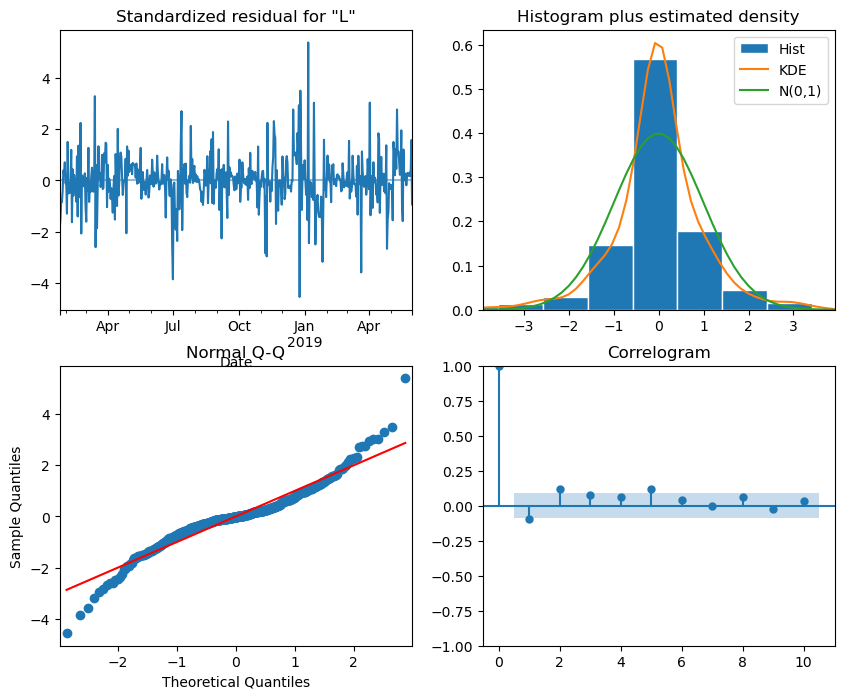

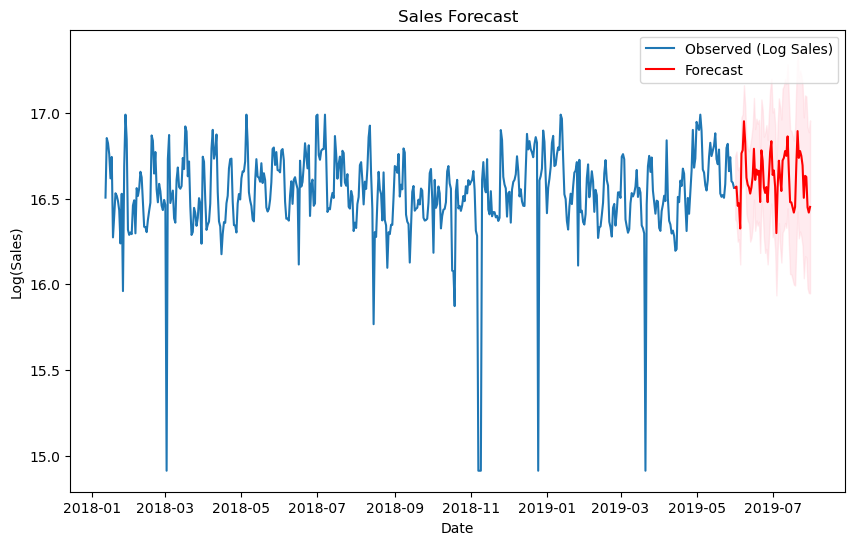

In [1081]:
order = (1, 0, 0)
seasonal_order = (0, 1, 0, 12)
forecast_steps=len(val_salesdf)
#exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend']

checkdf, checkmodel, checkresult = modelSARIMAX(order, seasonal_order, datadf_val, val_salesdf, forecast_steps, exogfeature, False)

AIC: -60.61818730365766, BIC: -22.81360473727345


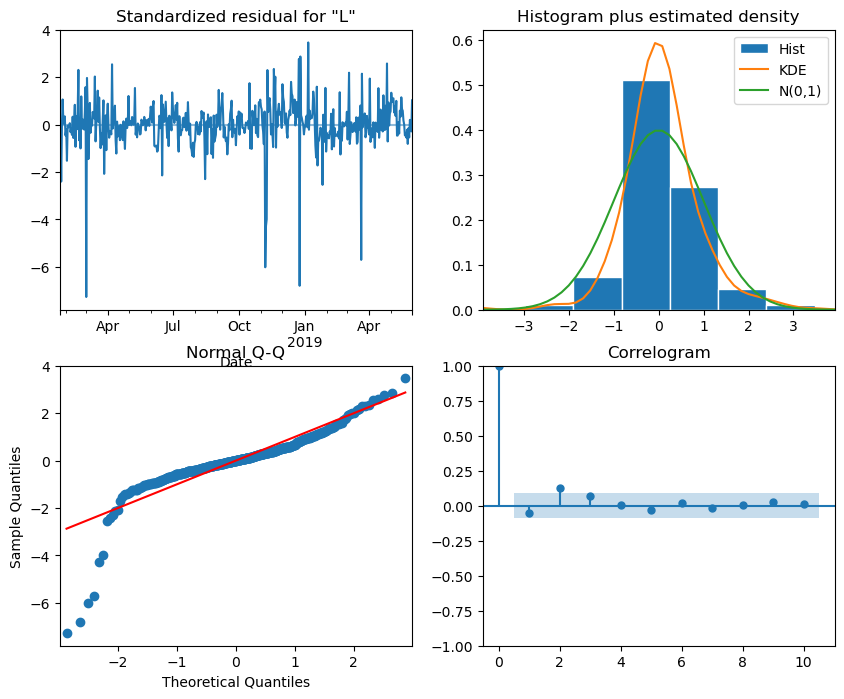

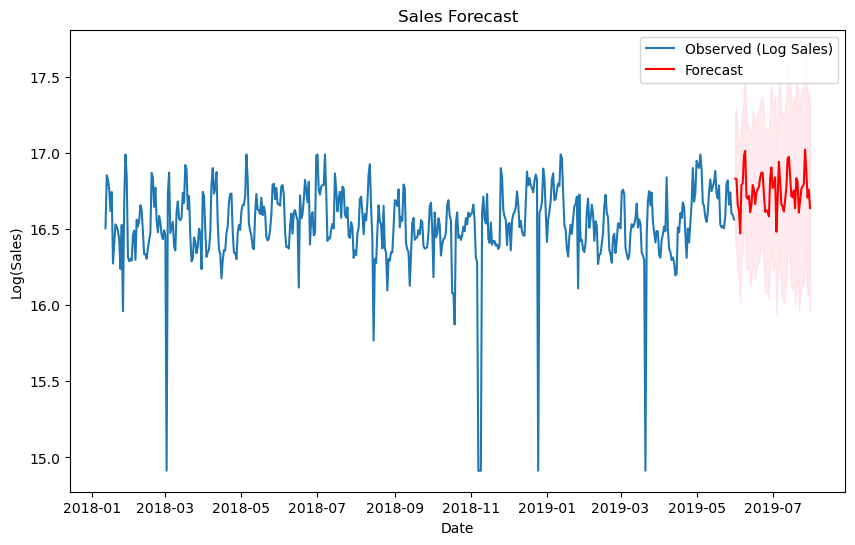

In [1082]:
order = (1, 0, 0)
seasonal_order = (2, 1, 0, 12)
forecast_steps=len(val_salesdf)
exogfeature = ['Holiday', 'IsDiscount', 'IsWeekend','sin_Month','cos_Month' ]
testSdf1,testSdfmodel1, testSdfResult = modelSARIMAX(order, seasonal_order, datadf_val, val_salesdf, forecast_steps, exogfeature, False)

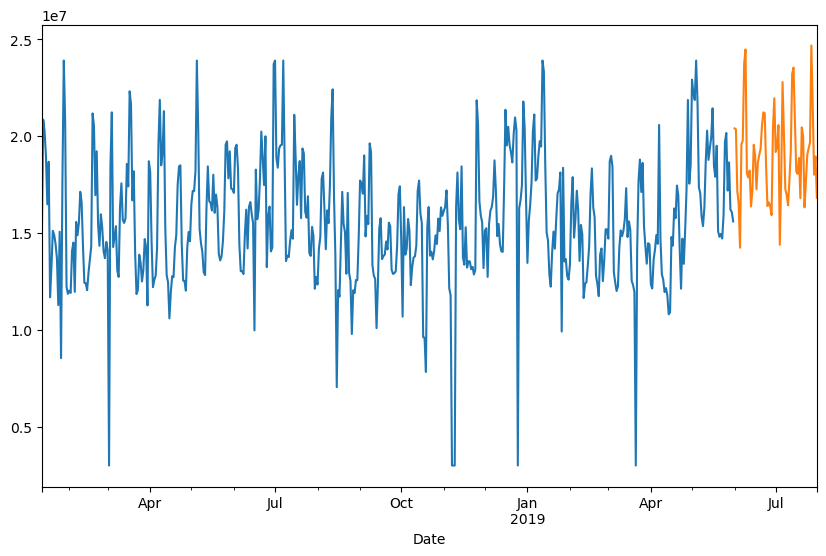

In [1083]:
datadf_val.Sales.plot()
val_salesdf.Sales_Pred.plot()
plt.show()

In [1084]:
val_salesdf.head(2)

Day  Month  Year  DayOfWeek  IsWeekend  Holiday  IsDiscount  \
Date                                                                      
2019-06-01    1      6  2019          5          1        0           1   
2019-06-02    2      6  2019          6          1        0           1   

            Daily_Orders   sin_Day   cos_Day     sin_Month  cos_Month  \
Date                                                                    
2019-06-01      0.111322  0.201299  0.979530  1.224647e-16       -1.0   
2019-06-02      0.124387  0.394356  0.918958  1.224647e-16       -1.0   

            sin_DayOfWeek  cos_DayOfWeek    Sales_Pred  
Date                                                    
2019-06-01      -0.974928      -0.222521  2.040705e+07  
2019-06-02      -0.781831       0.623490  2.036177e+07

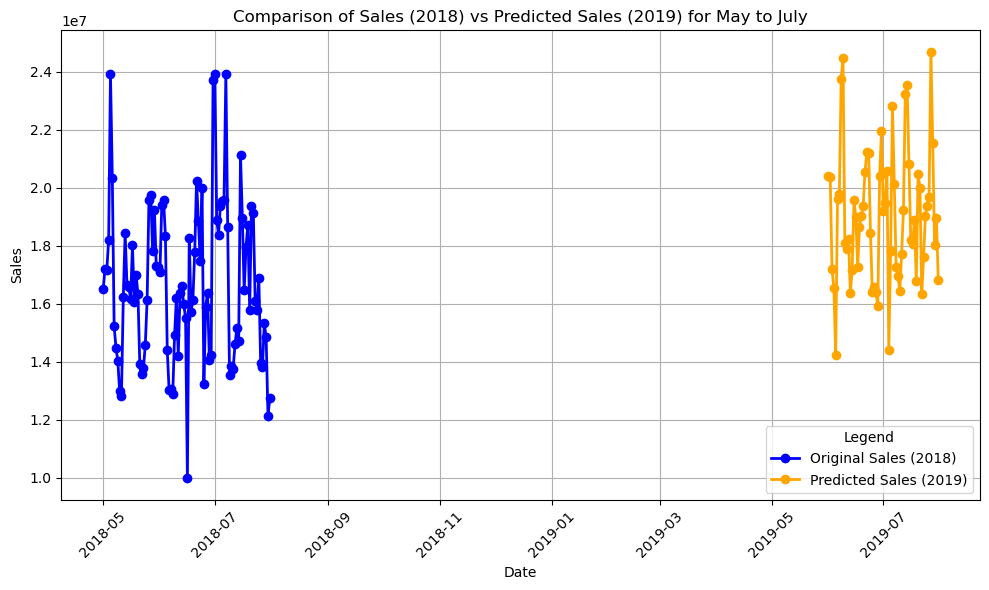

In [1085]:
# Filter for May to July in 2018 (for salesdf) and 2019 (for testdf)
salesdf_filtered=datadf_val.reset_index().copy()
testdf_filtered=val_salesdf.reset_index().copy()
salesdf_filtered = salesdf_filtered[(salesdf_filtered['Date'].dt.year == 2018) & (salesdf_filtered['Date'].dt.month.isin([5, 6, 7]))]
testdf_filtered = testdf_filtered[(testdf_filtered['Date'].dt.year == 2019) & (testdf_filtered['Date'].dt.month.isin([5, 6, 7]))]

# Group by day to calculate total sales for each day
salesdf_grouped = salesdf_filtered.groupby(salesdf_filtered['Date']).agg(Total_Sales=('Sales', 'sum')).reset_index()
testdf_grouped = testdf_filtered.groupby(testdf_filtered['Date']).agg(Total_Sales_Pred=('Sales_Pred', 'sum')).reset_index()

# Plot the 'Sales' from salesdf_filtered (2018)
plt.plot(salesdf_grouped['Date'], salesdf_grouped['Total_Sales'], label='Original Sales (2018)', color='blue', marker='o', linestyle='-', linewidth=2)

# Plot the 'Sales_Pred' from testdf_filtered (2019)
plt.plot(testdf_grouped['Date'], testdf_grouped['Total_Sales_Pred'], label='Predicted Sales (2019)', color='orange', marker='o', linestyle='-', linewidth=2)

# Title and labels
plt.title('Comparison of Sales (2018) vs Predicted Sales (2019) for May to July')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Legend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [1089]:
datadf_val.tail(2)

Sales  Holiday  IsDiscount  Daily_Orders  Day  Month  Year  \
Date                                                                           
2019-05-30  16082139.00        0           1     -0.140344   30      5  2019   
2019-05-31  15601824.99        1           1     -0.304454   31      5  2019   

            DayOfWeek  IsWeekend  Estimated_Orders  ...   z_score  z_score1  \
Date                                                ...                       
2019-05-30          3          0             25638  ...  0.142580  0.144536   
2019-05-31          4          0             24872  ... -0.004424 -0.005508   

            Sales_Lag1  Log_Sales       sin_Day  cos_Day  sin_Month  \
Date                                                                  
2019-05-30  16213497.0  16.593220 -2.012985e-01  0.97953        0.5   
2019-05-31  16082139.0  16.562899 -2.449294e-16  1.00000        0.5   

            cos_Month  sin_DayOfWeek  cos_DayOfWeek  
Date                                                 
2019-05-30  -0.866025       0.433884      -0.900969  
2019-05-31  -0.866025      -0.433884      -0.900969  

[2 rows x 21 columns]

In [1091]:
val_salesdf.head(2)

Day  Month  Year  DayOfWeek  IsWeekend  Holiday  IsDiscount  \
Date                                                                      
2019-06-01    1      6  2019          5          1        0           1   
2019-06-02    2      6  2019          6          1        0           1   

            Daily_Orders   sin_Day   cos_Day     sin_Month  cos_Month  \
Date                                                                    
2019-06-01      0.111322  0.201299  0.979530  1.224647e-16       -1.0   
2019-06-02      0.124387  0.394356  0.918958  1.224647e-16       -1.0   

            sin_DayOfWeek  cos_DayOfWeek    Sales_Pred  
Date                                                    
2019-06-01      -0.974928      -0.222521  2.040705e+07  
2019-06-02      -0.781831       0.623490  2.036177e+07

In [1092]:
testdf.columns

Index(['index', 'ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Date', 'Holiday', 'Discount'],
      dtype='object')

In [1093]:
testdf[['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount']].reset_index().head()

index        ID  Store_id Store_Type Location_Type Region_Code  Holiday  \
0      0  T1188341       171         S4            L2          R3        0   
1      1  T1188342       172         S1            L1          R1        0   
2      2  T1188343       173         S4            L2          R1        0   
3      3  T1188344       174         S1            L1          R4        0   
4      4  T1188345       170         S1            L1          R2        0   

  Discount  
0       No  
1       No  
2       No  
3       No  
4       No

In [192]:
import statsmodels
print(statsmodels.__version__)

0.14.0


In [291]:
data1={
    "2019-06-01": {
        "Day": 1,
        "Month": 6,
        "Year": 2019,
        "DayOfWeek": 5,
        "IsWeekend": True,
        "Holiday": 0,
        "IsDiscount": 10,
        "Number_of_Orders": 365
    },
    "2019-06-02": {
        "Day": 2,
        "Month": 6,
        "Year": 2019,
        "DayOfWeek": 6,
        "IsWeekend": True,
        "Holiday": 0,
        "IsDiscount": 12,
        "Number_of_Orders": 365
    },
    "2019-06-03": {
        "Day": 3,
        "Month": 6,
        "Year": 2019,
        "DayOfWeek": 0,
        "IsWeekend": False,
        "Holiday": 0,
        "IsDiscount": 43,
        "Number_of_Orders": 365
    },
    "2019-06-04": {
        "Day": 4,
        "Month": 6,
        "Year": 2019,
        "DayOfWeek": 1,
        "IsWeekend": False,
        "Holiday": 0,
        "IsDiscount": 43,
        "Number_of_Orders": 365
    },
    "2019-06-05": {
        "Day": 5,
        "Month": 6,
        "Year": 2019,
        "DayOfWeek": 2,
        "IsWeekend": False,
        "Holiday": 365,
        "IsDiscount": 251,
        "Number_of_Orders": 365
    }
}
data1={
    "2019-02-17": {
        "Day": 17,
        "Month": 2,
        "Year": 2019,
        "DayOfWeek": 6,
        "IsWeekend": 1,
        "Holiday": 0,
        "IsDiscount": 351,
        "Number_of_Orders": 29329,
        "Sales":18400888.50
    }
}


In [269]:
def prediction(data):
    #data = request.get_json(force=True)
    with open("forecast_sarimax_result.pkl", "rb") as pickle_in:
        loaded_modelResult = pickle.load(pickle_in)

    # Convert JSON data to pandas DataFrame
    df = pd.DataFrame(data1)
    df=df.T
    print(df[['Holiday', 'IsDiscount', 'IsWeekend', 'Month','Number_of_Orders']])
    
    # Convert the JSON data to pandas DataFrame
   # df = pd.DataFrame(data)
    
    # Data processing (you should implement this in lib.dataProcessing and lib.aggData)
   # df = dataProcessing(df)
   
   # aggdata = aggData(df)
   # print(aggdata)
    # Normalize exogenous features for prediction
    scaler = MinMaxScaler()
    exogfeature = df[['Holiday', 'IsDiscount', 'IsWeekend', 'Number_of_Orders', 'Month']]
    scaler.fit(exogfeature)
    exog_forecast = scaler.transform(exogfeature) 
    print(exog_forecast)
    # Set the number of forecast steps
    forecast_steps = len(exog_forecast)
    
    # Perform forecast using the loaded model
    forecast = loaded_modelResult.get_forecast(steps=forecast_steps, exog=exog_forecast)
    
    # Get confidence intervals
    forecast_ci = forecast.conf_int()
    
    # Forecasted values (in log scale)
    forecasted_values = forecast.predicted_mean
    
    # Convert forecasted values to the original scale
    forecast_original_scale = np.exp(forecasted_values)
    
    #print("Forecasted Sales (Original Scale):")
    #print(forecast_original_scale)

    # Optionally plot the forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(forecasted_values.index, forecasted_values, label='Forecast (Log Scale)', color='red')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Sales Forecast')
    plt.legend()
    plt.show()

    metrics=None
    if 'Sales' in df.columns:
        metrics=performanceMetrics(df['Sales'], forecast_original_scale)
        print(metrics)

    # Prepare the response with forecasted sales and confidence intervals
    response = {
        "forecasted_sales": forecast_original_scale.tolist(),
        "forecast_confidence_interval_lower": forecast_ci.iloc[:, 0].tolist(),
        "forecast_confidence_interval_upper": forecast_ci.iloc[:, 1].tolist(),
        "metrics": metrics
    }
    
    return response
    

In [1094]:
#prediction(data1)

In [213]:
import pandas as pd
import json

# Load CSV file into a pandas DataFrame

jdf= pd.read_csv("TEST_FINAL.csv")
# Convert DataFrame to JSON format
json_data = jdf.to_json(orient='records', date_format='iso')

# Optionally, write the JSON data to a file
json_file_path = 'output.json'  # Replace with your desired output path
with open(json_file_path, 'w') as json_file:
    json.dump(json.loads(json_data), json_file, indent=4)

# Print JSON data (optional)
print(json_data)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [214]:
jdf.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   
2  T1188343       173         S4            L2          R1  2019-06-01   
3  T1188344       174         S1            L1          R4  2019-06-01   
4  T1188345       170         S1            L1          R2  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

In [215]:
jdf = dataProcessing(jdf)
jdf.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1188341       171         S4            L2          R3 2019-06-01   
1  T1188342       172         S1            L1          R1 2019-06-01   
2  T1188343       173         S4            L2          R1 2019-06-01   
3  T1188344       174         S1            L1          R4 2019-06-01   
4  T1188345       170         S1            L1          R2 2019-06-01   

   Holiday Discount  Year  Month  Day  IsWeekend  DayOfWeek  IsDiscount  
0        0       No  2019      6    1       True          5           0  
1        0       No  2019      6    1       True          5           0  
2        0       No  2019      6    1       True          5           0  
3        0       No  2019      6    1       True          5           0  
4        0       No  2019      6    1       True          5           0

In [219]:
adata = aggData(jdf)
adata.head()

Day  Month  Year  DayOfWeek  IsWeekend  Holiday  IsDiscount  \
Date                                                                      
2019-06-01    1      6  2019          5       True        0          10   
2019-06-02    2      6  2019          6       True        0          12   
2019-06-03    3      6  2019          0      False        0          43   
2019-06-04    4      6  2019          1      False        0          43   
2019-06-05    5      6  2019          2      False      365         251   

            Number_of_Orders  
Date                          
2019-06-01               365  
2019-06-02               365  
2019-06-03               365  
2019-06-04               365  
2019-06-05               365

In [260]:
test.head()

Sales  Holiday  IsDiscount  Total_Orders  Day  Month  Year  \
Date                                                                           
2019-02-17  18400888.50        0         351       29824.0   17      2  2019   
2019-02-18  16319103.00        0         319       26546.0   18      2  2019   
2019-02-19  15816166.05      365         222       25739.0   19      2  2019   
2019-02-20  12800094.00        0          59       21944.0   20      2  2019   
2019-02-21  12383694.00        0          37       21671.0   21      2  2019   

            DayOfWeek  IsWeekend  Number_of_Orders      Sales_MA  \
Date                                                               
2019-02-17          6          1             29329  1.473985e+07   
2019-02-18          0          0             26011  1.466736e+07   
2019-02-19          1          0             25209  1.462979e+07   
2019-02-20          2          0             20402  1.456616e+07   
2019-02-21          3          0             19738  1.431294e+07   

                   bpred  Log_Sales_Pred    Sales_Pred  Sales_Pred_ARIMA  
Date                                                                      
2019-02-17  1.791047e+07       16.715849  1.818030e+07      1.641517e+07  
2019-02-18  1.551642e+07       16.619225  1.650585e+07      1.608157e+07  
2019-02-19  1.505090e+07       16.540065  1.524962e+07      1.588901e+07  
2019-02-20  1.494180e+07       16.388974  1.311115e+07      1.577786e+07  
2019-02-21  1.482408e+07       16.372812  1.290096e+07      1.571369e+07

In [363]:
from sklearn.preprocessing import StandardScaler

#with open("Regressor.pkl", "rb") as model_file:
#    regressor = pickle.load(model_file)
model_filename="Regressor.pkl"
scaler_filename="Regressor_scaler.pkl"
#with open('Regressor_scaler.pkl', 'rb') as scaler_file:
#    loaded_scaler = pickle.load(scaler_file)
    
# Load the trained model and scaler from the pickle files
def load_model_and_scaler(model_filename, scaler_filename):
    try:
        # Load the model from the pickle file
        with open(model_filename, 'rb') as model_file:
            model = pickle.load(model_file)
        
        # Load the scaler from the pickle file
        with open(scaler_filename, 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)

        return model, scaler
    except Exception as e:
        raise Exception(f"Error loading model or scaler: {str(e)}")

def rpredict(data, model_filename=model_filename, scaler_filename=scaler_filename):
    try:
        # Load the model and scaler
        model, scaler = load_model_and_scaler(model_filename, scaler_filename)

        # Ensure the data is in the correct format (dict with dates as keys)
        if not isinstance(data, dict):
            return {"error": "Data should be a dictionary with dates as keys."}

        # Define required keys
        required_keys = ['Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend', 'Holiday', 'IsDiscount', 'Number_of_Orders']

        # Check if all required fields are present in the input data
        for date, day_data in data.items():
            if not all(key in day_data for key in required_keys):
                return {"error": f"Missing required fields for date {date}"}

        # Convert the data into a DataFrame
        df = pd.DataFrame.from_dict(data, orient='index')


        # Check if the DataFrame is empty
        if df.empty:
            return {"error": "Dataframe is empty, check the input data."}

        # Use the loaded scaler to transform the data
        scaled_features = scaler.transform(df)

        # Use the model to predict sales
        predictions = model.predict(scaled_features)

        # Prepare the response with predictions
        response = {
            "predictions": predictions.tolist()  # Convert predictions to list for JSON response
        }

        return response

    except Exception as e:
        # Return an error response in case of failure
        return {"error": str(e)}



In [364]:
data1={
    "2019-02-17": {
        "Holiday": 0,
        "IsDiscount": 351,
        "Day": 17,
        "Month": 2,
        "Year": 2019,
        "DayOfWeek": 6,
        "IsWeekend": 1,
        "Number_of_Orders": 29329
    }
}

rpredict(data1)

{'predictions': [18373883.2074]}

In [ ]:
"Sales":18400888.50